# ...........................importing dataset and important library.................................

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_excel('telcom_data.xlsx')
pd.set_option('display.max_columns',None)

# .....................................shape of the dataset...........................

In [3]:
dataset.shape

(150001, 55)

# ............................................view of dataset.................................................

In [4]:
# view of the top of dataset
pd.set_option('display.max_columns', 55)
dataset.head(5)

Bearer Id               Start  Start ms                 End  \
0  13114483460844900352 2019-04-04 12:01:18     770.0 2019-04-25 14:35:31   
1  13114483482878900224 2019-04-09 13:04:04     235.0 2019-04-25 08:15:48   
2  13114483484080500736 2019-04-09 17:42:11       1.0 2019-04-25 11:58:13   
3  13114483485442799616 2019-04-10 00:31:25     486.0 2019-04-25 07:36:35   
4  13114483499480700928 2019-04-12 20:10:23     565.0 2019-04-25 10:40:32   

   End ms  Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0   662.0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1   606.0  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2   652.0  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3   171.0  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4   954.0  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

  Last Location Name  Avg RTT DL (ms)  Avg RTT UL (ms)  \
0   9164566995485190             42.0              5.0   
1            L77566A             65.0              5.0   
2            D42335A              NaN              NaN   
3            T21824A              NaN              NaN   
4            D88865A              NaN              NaN   

   Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  \
0                     23.0                     44.0   
1                     16.0                     26.0   
2                      6.0                      9.0   
3                     44.0                     44.0   
4                      6.0                      9.0   

   TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)  \
0                          NaN                          NaN   
1                          NaN                          NaN   
2                          NaN                          NaN   
3                          NaN                          NaN   
4                          NaN                          NaN   

   DL TP < 50 Kbps (%)  50 Kbps < DL TP < 250 Kbps (%)  \
0                100.0                             0.0   
1                100.0                             0.0   
2                100.0                             0.0   
3                100.0                             0.0   
4                100.0                             0.0   

   250 Kbps < DL TP < 1 Mbps (%)  DL TP > 1 Mbps (%)  UL TP < 10 Kbps (%)  \
0                            0.0                 0.0                100.0   
1                            0.0                 0.0                100.0   
2                            0.0                 0.0                100.0   
3                            0.0                 0.0                100.0   
4                            0.0                 0.0                100.0   

   10 Kbps < UL TP < 50 Kbps (%)  50 Kbps < UL TP < 300 Kbps (%)  \
0                            0.0                             0.0   
1                            0.0                             0.0   
2                            0.0                             0.0   
3                            0.0                             0.0   
4                            0.0                             0.0   

   UL TP > 300 Kbps (%)  HTTP DL (Bytes)  HTTP UL (Bytes)  \
0                   0.0              NaN              NaN   
1                   0.0              NaN              NaN   
2                   0.0              NaN              NaN   
3                   0.0              NaN              NaN   
4                   0.0              NaN              NaN   

   Activity Duration DL (ms)  Activity Duration UL (ms)   Dur. (ms).1  \
0                    37624.0                    38787.0  1.823653e+09   
1                      168.0                     3560.0  1.365104e+09   
2                        0.0                        0.0  1.361763e+09   
3                     3330.0                    37882.0  1.321510e+09   
4                        0.0                        0.0  1.089009e+09   

  Handset Manufacturer                 Handset Type  \
0      

In [5]:
# data set from the last
dataset.tail(5)

Bearer Id               Start  Start ms  \
149996   7277825670196679680 2019-04-29 07:28:42     451.0   
149997   7349883264234609664 2019-04-29 07:28:42     483.0   
149998  13114483573367300096 2019-04-29 07:28:43     283.0   
149999  13114483573367300096 2019-04-29 07:28:43     696.0   
150000                                       NaT       NaN   

                       End  End ms  Dur. (ms)          IMSI  MSISDN/Number  \
149996 2019-04-30 06:02:33   214.0    81230.0  2.082022e+14   3.365069e+10   
149997 2019-04-30 10:41:33   187.0    97970.0  2.082019e+14   3.366345e+10   
149998 2019-04-30 10:46:12   810.0    98249.0  2.082017e+14   3.362189e+10   
149999 2019-04-30 10:40:34   327.0    97910.0  2.082021e+14   3.361962e+10   
150000                 NaT     NaN        NaN           NaN            NaN   

                IMEI Last Location Name  Avg RTT DL (ms)  Avg RTT UL (ms)  \
149996  3.548311e+13            D20434A             32.0              0.0   
149997  3.566051e+13            D10223C             27.0              2.0   
149998  3.572121e+13            T51102A             43.0              6.0   
149999  8.618620e+13            L88342B             37.0              5.0   
150000           NaN                NaN              NaN              NaN   

        Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  \
149996                     52.0                     65.0   
149997                     23.0                     54.0   
149998                     43.0                     47.0   
149999                     34.0                     37.0   
150000                      NaN                      NaN   

        TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)  \
149996                          NaN                          NaN   
149997                          NaN                          NaN   
149998                          NaN                          NaN   
149999                          NaN                          NaN   
150000                          NaN                          NaN   

        DL TP < 50 Kbps (%)  50 Kbps < DL TP < 250 Kbps (%)  \
149996                100.0                             0.0   
149997                100.0                             0.0   
149998                100.0                             0.0   
149999                100.0                             0.0   
150000                  NaN                             NaN   

        250 Kbps < DL TP < 1 Mbps (%)  DL TP > 1 Mbps (%)  \
149996                            0.0                 0.0   
149997                            0.0                 0.0   
149998                            0.0                 0.0   
149999                            0.0                 0.0   
150000                            NaN                 NaN   

        UL TP < 10 Kbps (%)  10 Kbps < UL TP < 50 Kbps (%)  \
149996                100.0                            0.0   
149997                100.0                            0.0   
149998                100.0                            0.0   
149999                100.0                            0.0   
150000                  NaN                            NaN   

        50 Kbps < UL TP < 300 Kbps (%)  UL TP > 300 Kbps (%)  HTTP DL (Bytes)  \
149996                             0.0                   0.0              NaN   
149997                             0.0                   0.0              NaN   
149998                             0.0                   0.0              NaN   
149999                             0.0                   0.0              NaN   
150000                             NaN                   NaN              NaN   

        HTTP UL (Bytes)  Activity Duration DL (ms)  Activity Duration UL (ms)  \
149996              NaN                    42376.0                    41915.0   
149997              NaN                    17264.0                    16759.0   
149998              NaN                    25003.0                    28640.0   
149999        

# ...................................informartion of the dataset......................................

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

# .....................................column information.....................................................

In [7]:
print("certain columns are present in the given data set")
print("----"*20)
print(dataset.columns)

certain columns are present in the given data set
--------------------------------------------------------------------------------
Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       '

# ..........................Statistical info about dataset.........................

In [8]:
print("..............................only numerical data description....................................................")
dataset.describe().T

..............................only numerical data description....................................................


count          mean  \
Start ms                                  150000.0  4.991882e+02   
End ms                                    150000.0  4.988009e+02   
Dur. (ms)                                 150000.0  1.046086e+05   
IMSI                                      149431.0  2.082016e+14   
MSISDN/Number                             148935.0  4.188282e+10   
IMEI                                      149429.0  4.847455e+13   
Avg RTT DL (ms)                           122172.0  1.097957e+02   
Avg RTT UL (ms)                           122189.0  1.766288e+01   
Avg Bearer TP DL (kbps)                   150000.0  1.330005e+04   
Avg Bearer TP UL (kbps)                   150000.0  1.770429e+03   
TCP DL Retrans. Vol (Bytes)                61855.0  2.080991e+07   
TCP UL Retrans. Vol (Bytes)                53352.0  7.596587e+05   
DL TP < 50 Kbps (%)                       149247.0  9.284475e+01   
50 Kbps < DL TP < 250 Kbps (%)            149247.0  3.069355e+00   
250 Kbps < DL TP < 1 Mbps (%)             149247.0  1.717341e+00   
DL TP > 1 Mbps (%)                        149247.0  1.609654e+00   
UL TP < 10 Kbps (%)                       149209.0  9.853014e+01   
10 Kbps < UL TP < 50 Kbps (%)             149209.0  7.767494e-01   
50 Kbps < UL TP < 300 Kbps (%)            149209.0  1.479871e-01   
UL TP > 300 Kbps (%)                      149209.0  7.892285e-02   
HTTP DL (Bytes)                            68527.0  1.144710e+08   
HTTP UL (Bytes)                            68191.0  3.242301e+06   
Activity Duration DL (ms)                 150000.0  1.829177e+06   
Activity Duration UL (ms)                 150000.0  1.408880e+06   
Dur. (ms).1                               150000.0  1.046091e+08   
Nb of sec with 125000B < Vol DL            52463.0  9.897000e+02   
Nb of sec with 1250B < Vol UL < 6250B      57107.0  3.404344e+02   
Nb of sec with 31250B < Vol DL < 125000B   56415.0  8.108374e+02   
Nb of sec with 37500B < Vol UL             19747.0  1.492571e+02   
Nb of sec with 6250B < Vol DL < 31250B     61684.0  9.654648e+02   
Nb of sec with 6250B < Vol UL < 37500B     38158.0  1.413048e+02   
Nb of sec with Vol DL < 6250B             149246.0  3.719788e+03   
Nb of sec with Vol UL < 1250B             149208.0  4.022083e+03   
Social Media DL (Bytes)                   150001.0  1.795322e+06   
Social Media UL (Bytes)                   150001.0  3.292843e+04   
Google DL (Bytes)                         150001.0  5.750753e+06   
Google UL (Bytes)                         150001.0  2.056542e+06   
Email DL (Bytes)                          150001.0  1.791729e+06   
Email UL (Bytes)                          150001.0  4.673734e+05   
Youtube DL (Bytes)                        150001.0  1.163407e+07   
Youtube UL (Bytes)                        150001.0  1.100941e+07   
Netflix DL (Bytes)                        150001.0  1.162685e+07   
Netflix UL (Bytes)                        150001.0  1.100175e+07   
Gaming DL (Bytes)                         150001.0  4.220447e+08   
Gaming UL (Bytes)                         150001.0  8.288398e+06   
Other DL (Bytes)                          150001.0  4.211005e+08   
Other UL (Bytes)                          150001.0  8.264799e+06   
Total UL (Bytes)                          150000.0  4.112121e+07   
Total DL (Bytes)                          150000.0  4.546434e+08   

                                                   std           min  \
Start ms                                  2.886118e+02  0.000000e+00   
End ms                                    2.880977e+02  0.000000e+00   
Dur. (ms)                                 8.103762e+04  7.142000e+03   
IMSI                                      2.148809e+10  2.040471e+14   
MSISDN/Number                             2.447443e+12  3.360100e+10   
IMEI                                      2.241637e+13  4.400152e+11   
Avg RTT DL (ms)                           6.197827e+02  0.000000e+00   
Avg RTT UL (ms)                           8.479352e+01  0.000000e+00

In [9]:
print("........................................complete dataset description including the object columns.....................")
dataset.describe(include='all')

........................................complete dataset description including the object columns.....................


Bearer Id                Start       Start ms                  End  \
count     150001               150000  150000.000000               150000   
unique    134709               111881            NaN               100962   
top               2019-04-29 07:08:38            NaN  2019-04-25 00:01:32   
freq         991                   14            NaN                   65   
first        NaN  2019-04-04 12:01:18            NaN  2019-04-24 22:59:58   
last         NaN  2019-04-29 07:28:43            NaN  2019-04-30 23:59:27   
mean         NaN                  NaN     499.188200                  NaN   
std          NaN                  NaN     288.611834                  NaN   
min          NaN                  NaN       0.000000                  NaN   
25%          NaN                  NaN     250.000000                  NaN   
50%          NaN                  NaN     499.000000                  NaN   
75%          NaN                  NaN     749.000000                  NaN   
max          NaN                  NaN     999.000000                  NaN   

               End ms     Dur. (ms)          IMSI  MSISDN/Number  \
count   150000.000000  1.500000e+05  1.494310e+05   1.489350e+05   
unique            NaN           NaN           NaN            NaN   
top               NaN           NaN           NaN            NaN   
freq              NaN           NaN           NaN            NaN   
first             NaN           NaN           NaN            NaN   
last              NaN           NaN           NaN            NaN   
mean       498.800880  1.046086e+05  2.082016e+14   4.188282e+10   
std        288.097653  8.103762e+04  2.148809e+10   2.447443e+12   
min          0.000000  7.142000e+03  2.040471e+14   3.360100e+10   
25%        251.000000  5.744050e+04  2.082014e+14   3.365130e+10   
50%        500.000000  8.639900e+04  2.082015e+14   3.366371e+10   
75%        750.000000  1.324302e+05  2.082018e+14   3.368349e+10   
max        999.000000  1.859336e+06  2.140743e+14   8.823971e+14   

                IMEI Last Location Name  Avg RTT DL (ms)  Avg RTT UL (ms)  \
count   1.494290e+05             148848    122172.000000    122189.000000   
unique           NaN              45547              NaN              NaN   
top              NaN            D41377B              NaN              NaN   
freq             NaN                 80              NaN              NaN   
first            NaN                NaN              NaN              NaN   
last             NaN                NaN              NaN              NaN   
mean    4.847455e+13                NaN       109.795706        17.662883   
std     2.241637e+13                NaN       619.782739        84.793524   
min     4.400152e+11                NaN         0.000000         0.000000   
25%     3.546071e+13                NaN        32.000000         2.000000   
50%     3.572201e+13                NaN        45.000000         5.000000   
75%     8.611970e+13                NaN        70.000000        15.000000   
max     9.900120e+13                NaN     96923.000000      7120.000000   

        Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  \
count             150000.000000            150000.000000   
unique                      NaN                      NaN   
top                         NaN                      NaN   
freq                        NaN                      NaN   
first                       NaN                      NaN   
last                        NaN                      NaN   
mean               13300.045927              1770.428647   
std                23971.878541              4625.355500   
min                    0.000000                 0.000000   
25%                   43.000000                47.000000   
50%                   63.000000                63.000000   
75%                19710.750000              1120.000000   
max               378160.000000             58613.000000   

        TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vo

# TASK 1....................

## identifying the top 10 handsets used by the customers.

In [5]:
handset_counts = dataset['Handset Type'].value_counts()
# Sort the handsets by count in descending order
handset_counts = handset_counts.sort_values(ascending=False)
# Identify the top 10 handsets
top_10_handsets = handset_counts.head(10)
print( "..........the top 10 handsets..........")
print(top_10_handsets)

..........the top 10 handsets..........
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64


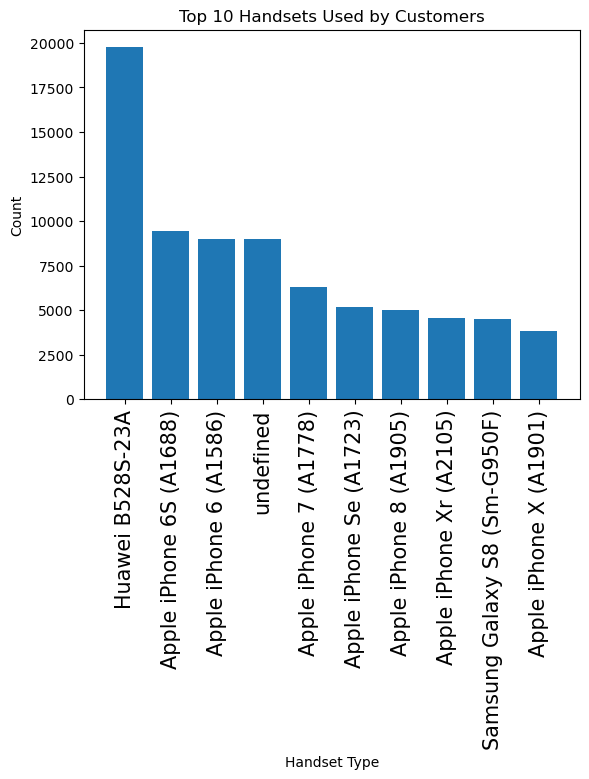

In [6]:
# Create a bar chart to visualize the top 10 handsets
plt.bar(top_10_handsets.index, top_10_handsets.values)
plt.xticks(rotation=90,fontsize=15,color='black')
plt.xlabel('Handset Type')
plt.ylabel('Count')
plt.title('Top 10 Handsets Used by Customers')
plt.show()

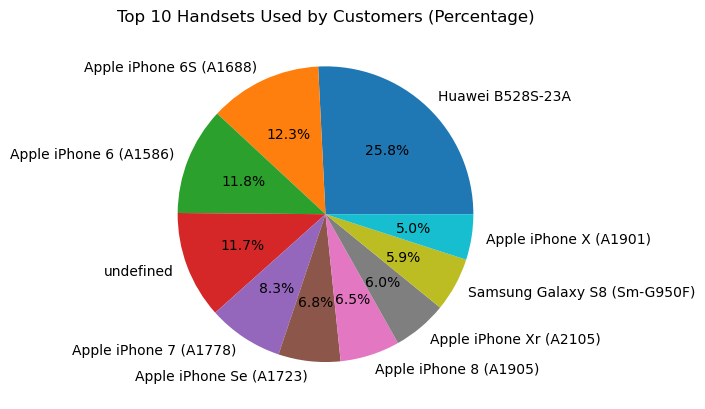

In [7]:
# Calculate the percentage of each handset
handset_percentages = (top_10_handsets / top_10_handsets.sum()) * 100

# Create a pie chart to visualize the top 10 handsets
plt.pie(handset_percentages, labels=top_10_handsets.index, autopct='%1.1f%%')
plt.title('Top 10 Handsets Used by Customers (Percentage)')
plt.show()

## identify the top 3 handset manufacturer

In [8]:
#Identify the manufacturer of each handset
handset_manufacturers = dataset['Handset Manufacturer'].str.split().str[0]

# Count the occurrences of each handset manufacturer
manufacturer_counts = handset_manufacturers.value_counts()

# Sort the manufacturers by count in descending order
manufacturer_counts = manufacturer_counts.sort_values(ascending=False)

# Identify the top 3 manufacturers
top_3_manufacturers = manufacturer_counts.head(3)
print("....................top 3 handset manufacturer ...................")
print(top_3_manufacturers)

....................top 3 handset manufacturer ...................
Apple      59565
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64


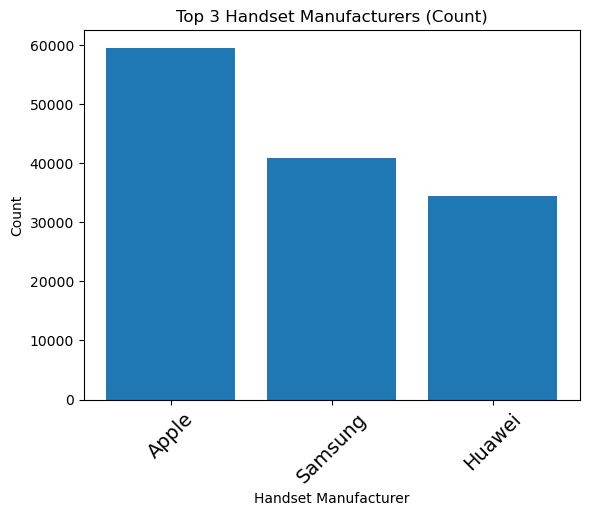

In [9]:
# Create a bar chart to visualize the top 10 manufacturers
plt.bar(top_3_manufacturers.index, top_3_manufacturers.values)
plt.xlabel('Handset Manufacturer')
plt.ylabel('Count')
plt.title('Top 3 Handset Manufacturers (Count)')
plt.xticks(rotation=45,fontsize=14)
plt.show()

(-1.1120227662898294,
 1.100572512680468,
 -1.1054055709353865,
 1.127296016634408)

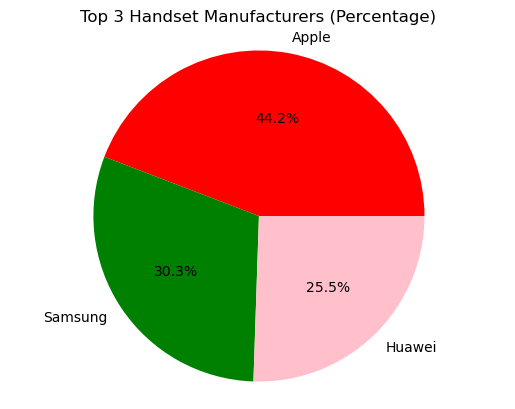

In [10]:
# Calculate the percentage of each manufacturer
manufacturer_percentages = (top_3_manufacturers / top_3_manufacturers.sum()) * 100

# Create a pie chart to visualize the top 10 manufacturers
plt.pie(manufacturer_percentages, labels=top_3_manufacturers.index, autopct='%1.1f%%', radius=1, colors=['r', 'g', 'pink'])
plt.title('Top 3 Handset Manufacturers (Percentage)')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

## identify the top 5 handsets per top 3 handset manufacturer

In [11]:
top_3_manufacturers = dataset['Handset Manufacturer'].value_counts().head(3).index.tolist()

top_5_per_manufacturer = {}

for manufacturer in top_3_manufacturers:
    subset = dataset[dataset['Handset Manufacturer'] == manufacturer]
    top_5_handsets = subset['Handset Type'].value_counts().head(5)
    top_5_per_manufacturer[manufacturer] = top_5_handsets

# Printing the top 5 handsets for each top 3 manufacturer
for manufacturer, top_5 in top_5_per_manufacturer.items():
    print(f"Top 5 handsets for {manufacturer}:")
    for handset, count in top_5.items():
        print(f"Handset: {handset}, Count: {count}")
    print()

Top 5 handsets for Apple:
Handset: Apple iPhone 6S (A1688), Count: 9419
Handset: Apple iPhone 6 (A1586), Count: 9023
Handset: Apple iPhone 7 (A1778), Count: 6326
Handset: Apple iPhone Se (A1723), Count: 5187
Handset: Apple iPhone 8 (A1905), Count: 4993

Top 5 handsets for Samsung:
Handset: Samsung Galaxy S8 (Sm-G950F), Count: 4520
Handset: Samsung Galaxy A5 Sm-A520F, Count: 3724
Handset: Samsung Galaxy J5 (Sm-J530), Count: 3696
Handset: Samsung Galaxy J3 (Sm-J330), Count: 3484
Handset: Samsung Galaxy S7 (Sm-G930X), Count: 3199

Top 5 handsets for Huawei:
Handset: Huawei B528S-23A, Count: 19752
Handset: Huawei E5180, Count: 2079
Handset: Huawei P20 Lite Huawei Nova 3E, Count: 2021
Handset: Huawei P20, Count: 1480
Handset: Huawei Y6 2018, Count: 997



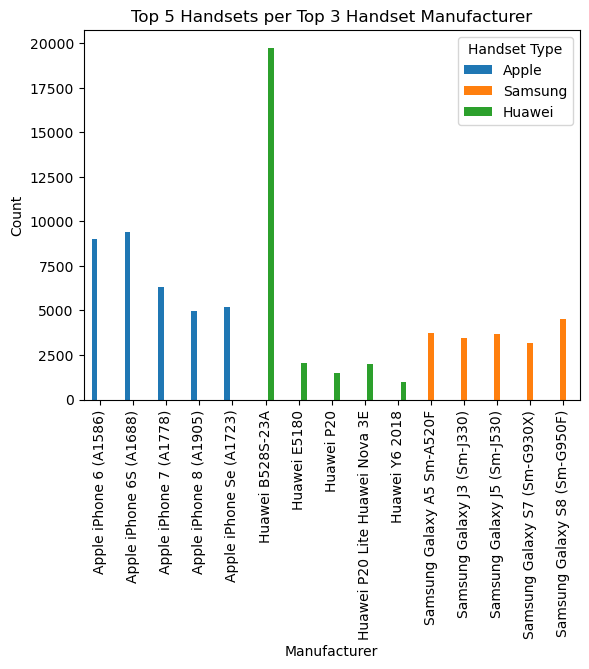

In [12]:
# Coverting dictionary in to dataframe for ploting bar graph

top_5_per_Manufacturer = pd.DataFrame(top_5_per_manufacturer)
top_5_per_Manufacturer.plot(kind='bar', stacked=False)
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.title('Top 5 Handsets per Top 3 Handset Manufacturer')
plt.xticks(rotation=90)
plt.legend(title='Handset Type')
plt.show()

## Interpretation and recommendation to marketing teams

In [13]:
# Interpretation and recommendation to marketing teams
print("**Interpretation:**")
print("The top 10 handsets used by the customers are:")
print(top_10_handsets)
print("**"*40)
print("\nThe top 3 handset manufacturers are:")
print(top_3_manufacturers)
print("**"*40)
print("\nThe top 5 handsets per top 3 handset manufacturer are:")
print(top_5_per_manufacturer)
print("**"*40)
print("\n**Recommendation:**")
print("Focus marketing efforts on the top 10 handsets and the top 3 handset manufacturers to increase sales and market share.")
print("Consider developing targeted marketing campaigns for each of the top 5 handsets per top 3 handset manufacturer.")
print("Analyze customer preferences and usage patterns to identify potential opportunities for new products and services.")

**Interpretation:**
The top 10 handsets used by the customers are:
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64
********************************************************************************

The top 3 handset manufacturers are:
['Apple', 'Samsung', 'Huawei']
********************************************************************************

The top 5 handsets per top 3 handset manufacturer are:
{'Apple': Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: Handset Type, dtype: int64, 'Samsung': Samsung Galaxy S8 

# TASK 1.1....................

In [14]:
# Grouping the data by 'MSISDN/Number' (assuming 'MSISDN/Number' is the user identifier)
user_info = dataset.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',  # Number of xDR sessions
    'Dur. (ms)': 'sum',    # Session duration
    'Total DL (Bytes)': 'sum',  # Total download data
    'Total UL (Bytes)': 'sum'   # Total upload data
})

In [15]:
user_info.head(10)

Bearer Id  Dur. (ms)  Total DL (Bytes)  Total UL (Bytes)
MSISDN/Number                                                          
3.360100e+10           1   116720.0      8.426375e+08        36053108.0
3.360100e+10           1   181230.0      1.207552e+08        36104459.0
3.360100e+10           1   134969.0      5.566597e+08        39306820.0
3.360101e+10           1    49878.0      4.019932e+08        20327526.0
3.360101e+10           2    37104.0      1.363130e+09        94280527.0
3.360101e+10           2   253983.0      5.552080e+08        60009249.0
3.360101e+10           2   128360.0      5.530412e+08       101681858.0
3.360101e+10           1    86399.0      2.940851e+08        38575279.0
3.360101e+10           2   495702.0      8.965602e+08        93572016.0
3.360102e+10           1   124854.0      6.853728e+08        47091008.0

In [16]:
# Adding total data volume for each application
app_columns = [col for col in dataset.columns if 'Total DL' in col or 'Total UL' in col]
app_data = dataset.groupby('MSISDN/Number')[app_columns].sum()

# Concatenating the aggregated data
user_info = pd.concat([user_info, app_data], axis=1)

# Renaming the columns for application data
user_info = user_info.rename(columns={
    'Total DL (Bytes)': 'Total_DL',
    'Total UL (Bytes)': 'Total_UL'
})

# Displaying the aggregated information
print("*-"*40)
print(user_info)

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
               Bearer Id  Dur. (ms)      Total_DL    Total_UL    Total_UL  \
MSISDN/Number                                                               
3.360100e+10           1   116720.0  8.426375e+08  36053108.0  36053108.0   
3.360100e+10           1   181230.0  1.207552e+08  36104459.0  36104459.0   
3.360100e+10           1   134969.0  5.566597e+08  39306820.0  39306820.0   
3.360101e+10           1    49878.0  4.019932e+08  20327526.0  20327526.0   
3.360101e+10           2    37104.0  1.363130e+09  94280527.0  94280527.0   
...                  ...        ...           ...         ...         ...   
3.379000e+10           1     8810.0  6.879252e+08  26716429.0  26716429.0   
3.379000e+10           1   140988.0  4.445751e+08  35732243.0  35732243.0   
3.197021e+12           1   877385.0  1.948281e+08  37295915.0  37295915.0   
3.370000e+14           1   253030.0  5.396350e+08  56652839.0  56652839.

## The total download (DL) and upload (UL) data

In [18]:
dataset.aggregate({'Total DL (Bytes)':['sum','max', 'min'],
              'Total UL (Bytes)':['sum','max', 'min']})

Total DL (Bytes)  Total UL (Bytes)
sum      6.819651e+13      6.168181e+12
max      9.029696e+08      7.833131e+07
min      7.114041e+06      2.866892e+06

## The total data volume (in Bytes) during this session for each application

In [17]:
dataset.aggregate({'Social Media DL (Bytes)':['sum','max', 'min'],
              'Social Media UL (Bytes)':['sum','max', 'min'],
              'Google DL (Bytes)':['sum','max', 'min'],
              'Google UL (Bytes)':['sum','max', 'min'],
             'Email DL (Bytes)':['sum','max', 'min'],
             'Email UL (Bytes)':['sum','max', 'min'],
             'Youtube DL (Bytes)':['sum','max', 'min'],
             'Youtube UL (Bytes)':['sum','max', 'min'],
             'Netflix DL (Bytes)':['sum','max', 'min'],
             'Netflix UL (Bytes)':['sum','max', 'min'],
             'Gaming DL (Bytes)':['sum','max', 'min'],
             'Gaming UL (Bytes)':['sum','max', 'min'],
             'Other DL (Bytes)':['sum','max', 'min'],
             'Other UL (Bytes)':['sum','max', 'min']}).T

sum          max     min
Social Media DL (Bytes)  2.693001e+11    3586064.0    12.0
Social Media UL (Bytes)  4.939298e+09      65870.0     0.0
Google DL (Bytes)        8.626186e+11   11462832.0   207.0
Google UL (Bytes)        3.084833e+11    4121357.0     3.0
Email DL (Bytes)         2.687611e+11    3586146.0    14.0
Email UL (Bytes)         7.010648e+10     936418.0     2.0
Youtube DL (Bytes)       1.745123e+12   23259098.0    53.0
Youtube UL (Bytes)       1.651423e+12   22011962.0   105.0
Netflix DL (Bytes)       1.744039e+12   23259189.0    42.0
Netflix UL (Bytes)       1.650274e+12   22011955.0    35.0
Gaming DL (Bytes)        6.330713e+13  843441889.0  2516.0
Gaming UL (Bytes)        1.243268e+12   16558794.0    59.0
Other DL (Bytes)         6.316550e+13  843442489.0  3290.0
Other UL (Bytes)         1.239728e+12   16558816.0   148.0

## Save into New DataFrame

In [20]:
d={"Unique":dataset["Bearer Id"],
   "Dur_msec":dataset['Dur. (ms)'],
   "Activity Duration DL (ms)":dataset["Activity Duration DL (ms)"],
   "Activity Duration UL (ms)":dataset['Activity Duration UL (ms)'],
   "Social Media DL (Bytes)":dataset["Social Media DL (Bytes)"],
   "Social Media UL (Bytes)":dataset["Social Media UL (Bytes)"],
   "YouTube DL (Bytes)":dataset["Youtube DL (Bytes)"],
   "YouTube UL (Bytes)":dataset["Youtube UL (Bytes)"],
   "Netflix DL (Bytes)":dataset["Netflix DL (Bytes)"],
   "Netflix UL (Bytes)":dataset["Netflix UL (Bytes)"],
   "Google DL (Bytes)":dataset["Google DL (Bytes)"],
   "Google UL (Bytes)":dataset["Google UL (Bytes)"],
   "Google UL (Bytes)":dataset["Google UL (Bytes)"],
   "Email DL (Bytes)":dataset["Email DL (Bytes)"],
   "Email UL (Bytes)":dataset["Email UL (Bytes)"],
   "Gaming DL (Bytes)":dataset["Gaming DL (Bytes)"],
   "Gaming UL (Bytes)":dataset["Gaming UL (Bytes)"],
   "Other DL":dataset["Other DL (Bytes)"],
   "Other UL":dataset["Other UL (Bytes)"],
  "total_DL_vol(bytes)":dataset['Total DL (Bytes)'],
   "total_Ul_vol(bytes)":dataset["Total UL (Bytes)"]}

In [21]:
df=pd.DataFrame(d)
df.head(10)

Unique   Dur_msec  Activity Duration DL (ms)  \
0  13114483460844900352  1823652.0                    37624.0   
1  13114483482878900224  1365104.0                      168.0   
2  13114483484080500736  1361762.0                        0.0   
3  13114483485442799616  1321509.0                     3330.0   
4  13114483499480700928  1089009.0                        0.0   
5  13114483499779198976  1074638.0                    22639.0   
6  13114483501243799552  1035261.0                     9785.0   
7  13042425910865399808   951292.0                    70832.0   
8  13114483506432499712   941634.0                   162472.0   
9  13042425914669299712   864482.0                  1537874.0   

   Activity Duration UL (ms)  Social Media DL (Bytes)  \
0                    38787.0                1545765.0   
1                     3560.0                1926113.0   
2                        0.0                1684053.0   
3                    37882.0                 644121.0   
4                        0.0                 862600.0   
5                    22700.0                3148833.0   
6                   316210.0                1623509.0   
7                    74477.0                3103940.0   
8                   176488.0                 342043.0   
9                  1542046.0                1541259.0   

   Social Media UL (Bytes)  YouTube DL (Bytes)  YouTube UL (Bytes)  \
0                  24420.0          15854611.0           2501332.0   
1                   7165.0          20247395.0          19111729.0   
2                  42224.0          19725661.0          14699576.0   
3                  13372.0          21388122.0          15146643.0   
4                  50188.0          15259380.0          18962873.0   
5                  51181.0          21332918.0           2611113.0   
6                   1482.0           7234465.0           1886295.0   
7                  57463.0          12189786.0          19735183.0   
8                  30582.0          18436641.0          10860867.0   
9                  44154.0          16338345.0           6573194.0   

   Netflix DL (Bytes)  Netflix UL (Bytes)  Google DL (Bytes)  \
0           8198936.0           9656251.0          1634479.0   
1          18338413.0          17227132.0          3493924.0   
2          17587794.0           6163408.0          8535055.0   
3          13994646.0           1097942.0          9023734.0   
4          17124581.0            415218.0          6248284.0   
5           7345361.0           6536448.0         10351530.0   
6          13231006.0          17981760.0          1837897.0   
7           6858496.0          12075206.0          1304524.0   
8          10587264.0           8467177.0          7560820.0   
9          12211149.0            974201.0          8601949.0   

   Google UL (Bytes)  Email DL (Bytes)  Email UL (Bytes)  Gaming DL (Bytes)  \
0          1271433.0         3563542.0          137762.0        278082303.0   
1           920172.0          629046.0          308339.0        608750074.0   
2          1694064.0         2690151.0          672973.0        229584621.0   
3          2788027.0         1439754.0          631229.0        799538153.0   
4          1500559.0         1936496.0          173853.0        527707248.0   
5          2582603.0         1980032.0          922378.0        710293538.0   
6          3068975.0         1838947.0          252032.0         44796223.0   
7          2568189.0         2987408.0          512696.0        748906189.0   
8          1341279.0         3014208.0          365861.0        821671285.0   
9           176392.0          522457.0          243589.0        811355188.0   

   Gaming UL (Bytes)     Other DL    Other UL  total_DL_vol(bytes)  \
0         14344150.0  171744450.0   8814393.0          308879636.0   
1          1170709.0  526904238.0  15055145.0          653384965.0   
2           395630.0  410692588.0   4215763.0          279807335.0   
3         10849722.0  749039933.0  12797283.0  

checking the null values in the new dataframe , and this dataframe is further used as per convinence for the EDA part.

In [24]:
df.isna().sum()

Unique                       0
Dur_msec                     1
Activity Duration DL (ms)    1
Activity Duration UL (ms)    1
Social Media DL (Bytes)      0
Social Media UL (Bytes)      0
YouTube DL (Bytes)           0
YouTube UL (Bytes)           0
Netflix DL (Bytes)           0
Netflix UL (Bytes)           0
Google DL (Bytes)            0
Google UL (Bytes)            0
Email DL (Bytes)             0
Email UL (Bytes)             0
Gaming DL (Bytes)            0
Gaming UL (Bytes)            0
Other DL                     0
Other UL                     0
total_DL_vol(bytes)          1
total_Ul_vol(bytes)          1
dtype: int64

In [25]:
df.dtypes

Unique                        object
Dur_msec                     float64
Activity Duration DL (ms)    float64
Activity Duration UL (ms)    float64
Social Media DL (Bytes)      float64
Social Media UL (Bytes)      float64
YouTube DL (Bytes)           float64
YouTube UL (Bytes)           float64
Netflix DL (Bytes)           float64
Netflix UL (Bytes)           float64
Google DL (Bytes)            float64
Google UL (Bytes)            float64
Email DL (Bytes)             float64
Email UL (Bytes)             float64
Gaming DL (Bytes)            float64
Gaming UL (Bytes)            float64
Other DL                     float64
Other UL                     float64
total_DL_vol(bytes)          float64
total_Ul_vol(bytes)          float64
dtype: object

# TASK1.2................................

## Conduct exploratory data analysis on those data & communicate useful insights. Ensure that you identify and treat all missing values and outliers in the dataset by replacing them with the mean of the corresponding column.

In [26]:
# shape of the dataset
dataset.shape

(150001, 55)

Checking the datatypes of the given tel_co data set

In [27]:
# datatypes of the dataset
dataset.dtypes

Bearer Id                                           object
Start                                       datetime64[ns]
Start ms                                           float64
End                                         datetime64[ns]
End ms                                             float64
Dur. (ms)                                          float64
IMSI                                               float64
MSISDN/Number                                      float64
IMEI                                               float64
Last Location Name                                  object
Avg RTT DL (ms)                                    float64
Avg RTT UL (ms)                                    float64
Avg Bearer TP DL (kbps)                            float64
Avg Bearer TP UL (kbps)                            float64
TCP DL Retrans. Vol (Bytes)                        float64
TCP UL Retrans. Vol (Bytes)                        float64
DL TP < 50 Kbps (%)                                float

# .......................checking the missing values....................................

In [28]:
print("Missing Values by Column")
print("-"*40)
print(dataset.isna().sum())
print("-"*20)
print("TOTAL MISSING VALUES:",dataset.isna().sum().sum())

Missing Values by Column
----------------------------------------
Bearer Id                                        0
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP

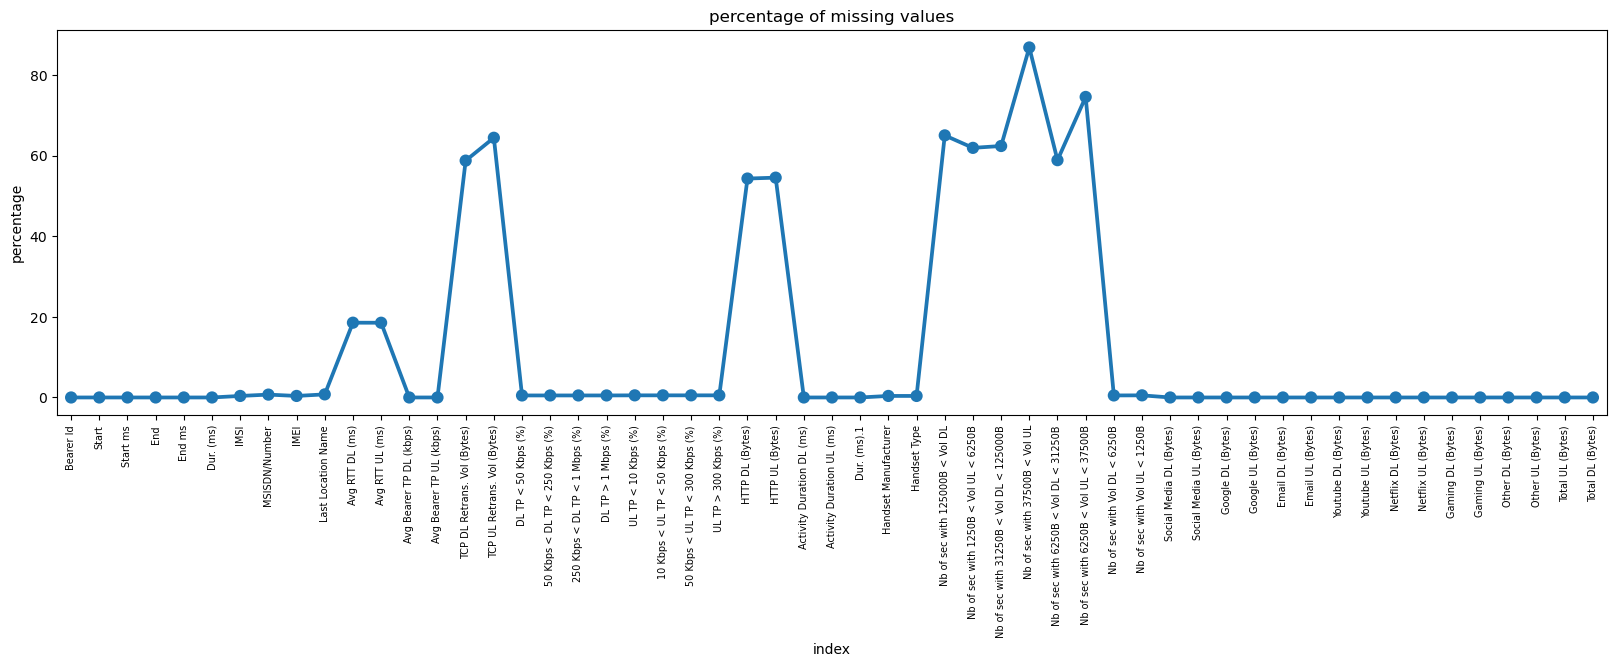

In [29]:
# percentage of missing values
missing=pd.DataFrame((dataset.isnull().sum()*100)/dataset.shape[0]).reset_index()
plt.figure(figsize=(20,5))
ax=sns.pointplot('index',0,data=missing)
plt.xticks(rotation=90,fontsize=7)
plt.title("percentage of missing values")
plt.ylabel("percentage")
plt.show()

from the above figure ,it can be concluded that very few columns have more than 50% missing values , now split the data set into two sub data set one is numerical datatype and  other is of object columns, first check the percentage of missing values


In [30]:
NAN = [(c, dataset[c].isna().mean()*100) for c in dataset]
NAN = pd.DataFrame(NAN, columns=["column_name", "percentage"])
print(NAN.head(10))

          column_name  percentage
0           Bearer Id    0.000000
1               Start    0.000667
2            Start ms    0.000667
3                 End    0.000667
4              End ms    0.000667
5           Dur. (ms)    0.000667
6                IMSI    0.379997
7       MSISDN/Number    0.710662
8                IMEI    0.381331
9  Last Location Name    0.768662


In [31]:
print(".........................columns which have more than 40% of missing values........................")
NAN1 = NAN[NAN.percentage > 40]
NAN1.sort_values("percentage", ascending=True)

.........................columns which have more than 40% of missing values........................


column_name  percentage
24                           HTTP DL (Bytes)   54.315638
25                           HTTP UL (Bytes)   54.539636
14               TCP DL Retrans. Vol (Bytes)   58.763608
35    Nb of sec with 6250B < Vol DL < 31250B   58.877607
32     Nb of sec with 1250B < Vol UL < 6250B   61.928920
33  Nb of sec with 31250B < Vol DL < 125000B   62.390251
15               TCP UL Retrans. Vol (Bytes)   64.432237
31           Nb of sec with 125000B < Vol DL   65.024900
36    Nb of sec with 6250B < Vol UL < 37500B   74.561503
34            Nb of sec with 37500B < Vol UL   86.835421

In [32]:
# Before filling 'NA' values will created copy of dataset to keep our maine dataset safe

db1=dataset.copy()

## Partitioning the dataset into separate entities based on numerical and categorical values for targeted analysis and distinct treatment.

In [33]:
# Select numerical columns
numerical_db = db1.select_dtypes(include='float')

# Select categorical/object columns
categorical_db = db1.select_dtypes(exclude='float')

## .....................................handling numerical columns......................

In [34]:
numerical_db.isnull().sum()

Start ms                                         1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)                             754
UL TP < 10 Kbps (%)                            792
10 Kbps < UL TP < 50 Kbps (%)                  792
50 Kbps < UL TP < 300 Kbps (%)                 792
UL TP > 300 Kbps (%)           

In [35]:
# Filling numerical missing values with Mean
missing_v=numerical_db.isnull().sum()
for col in missing_v.index:
    numerical_db[col].fillna(numerical_db[col].mean(), inplace=True)

Visualisation of the numerical columns after handling missing values with mean

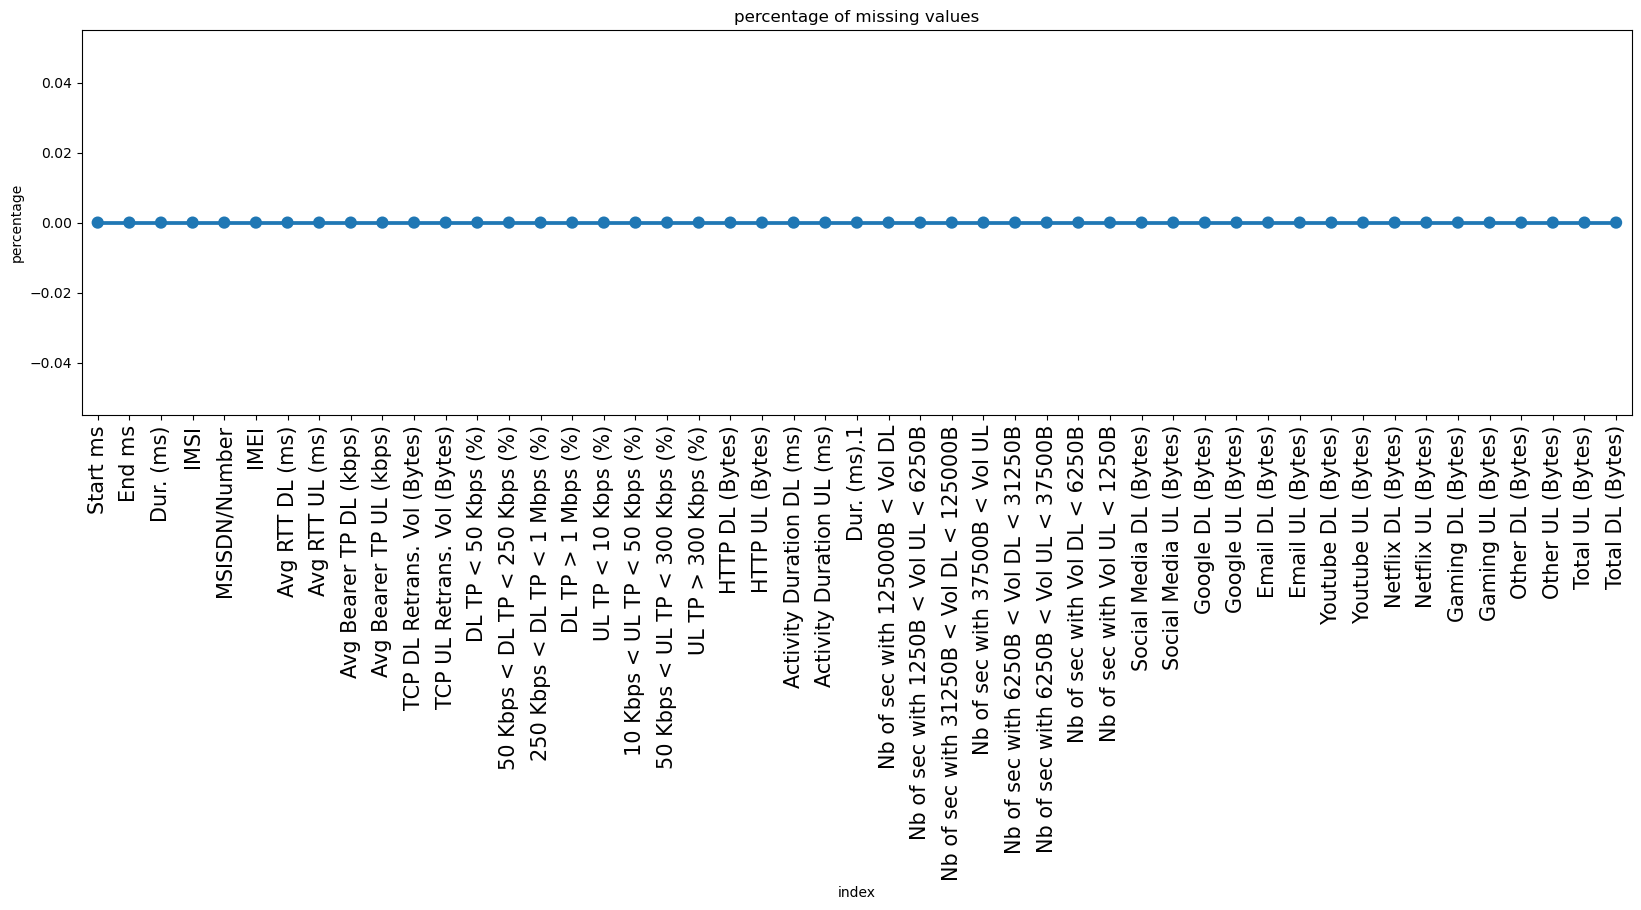

In [36]:
missing=pd.DataFrame((numerical_db.isnull().sum()*100)/numerical_db.shape[0]).reset_index()
plt.figure(figsize=(20,5))
ax=sns.pointplot('index',0,data=missing)
plt.xticks(rotation=90,fontsize=15)
plt.title("percentage of missing values")a
plt.ylabel("percentage")
plt.show()

## ...............................handling object columns.......................................

In [37]:
missing_values_per_column_object = (categorical_db.isnull().sum() / categorical_db.shape[0]) * 100

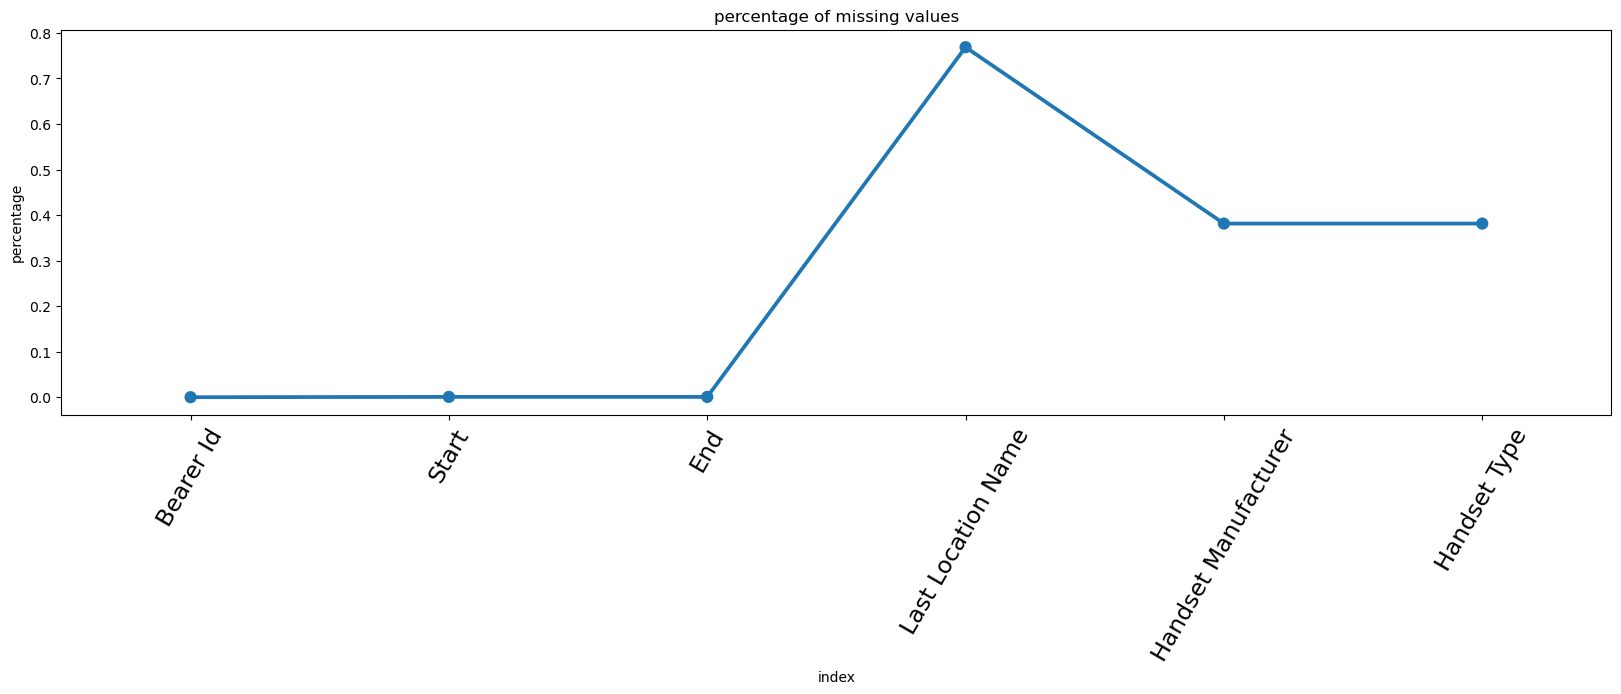

In [38]:
missing=pd.DataFrame((categorical_db.isnull().sum()*100)/categorical_db.shape[0]).reset_index()
plt.figure(figsize=(20,5))
ax=sns.pointplot('index',0,data=missing)
plt.xticks(rotation=60,fontsize=17)
plt.title("percentage of missing values")
plt.ylabel("percentage")
plt.show()

In [39]:
missing_val=categorical_db.isna().sum()
for col in missing_val.index:
    categorical_db[col].fillna(categorical_db[col].mode()[0], inplace=True)

Visualisation of the of the object columns after handling missing values with mode

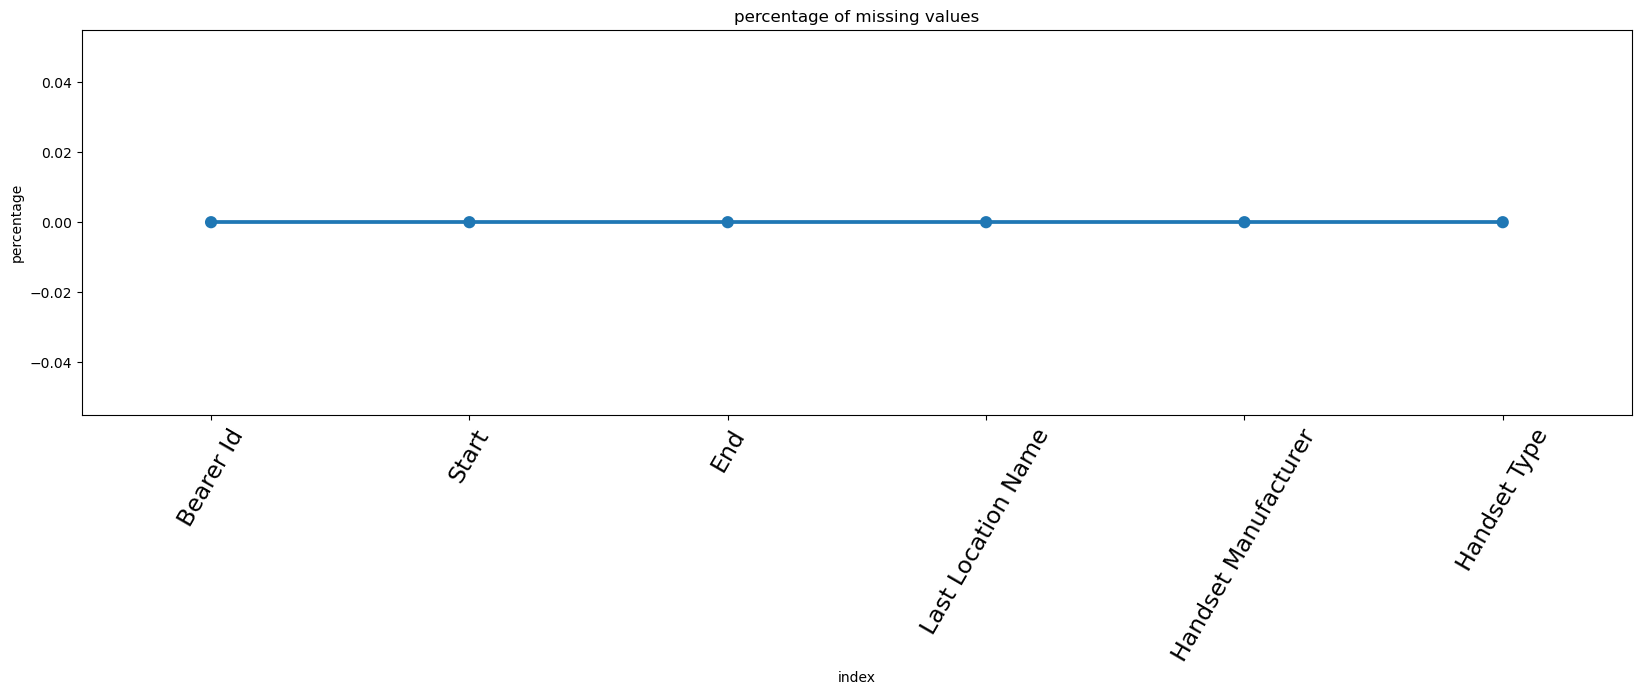

In [40]:
missing=pd.DataFrame((categorical_db.isnull().sum()*100)/categorical_db.shape[0]).reset_index()
plt.figure(figsize=(20,5))
ax=sns.pointplot('index',0,data=missing)
plt.xticks(rotation=60,fontsize=17)
plt.title("percentage of missing values")
plt.ylabel("percentage")
plt.show()

## Updating missing values in db1 with the values from numerical_db and numerical_db

In [41]:
db1.update(numerical_db)
db1.update(categorical_db)

In [42]:
db1.isnull().sum()

Bearer Id                                   0
Start                                       0
Start ms                                    0
End                                         0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)     

Comparison of missing vales before and after handling

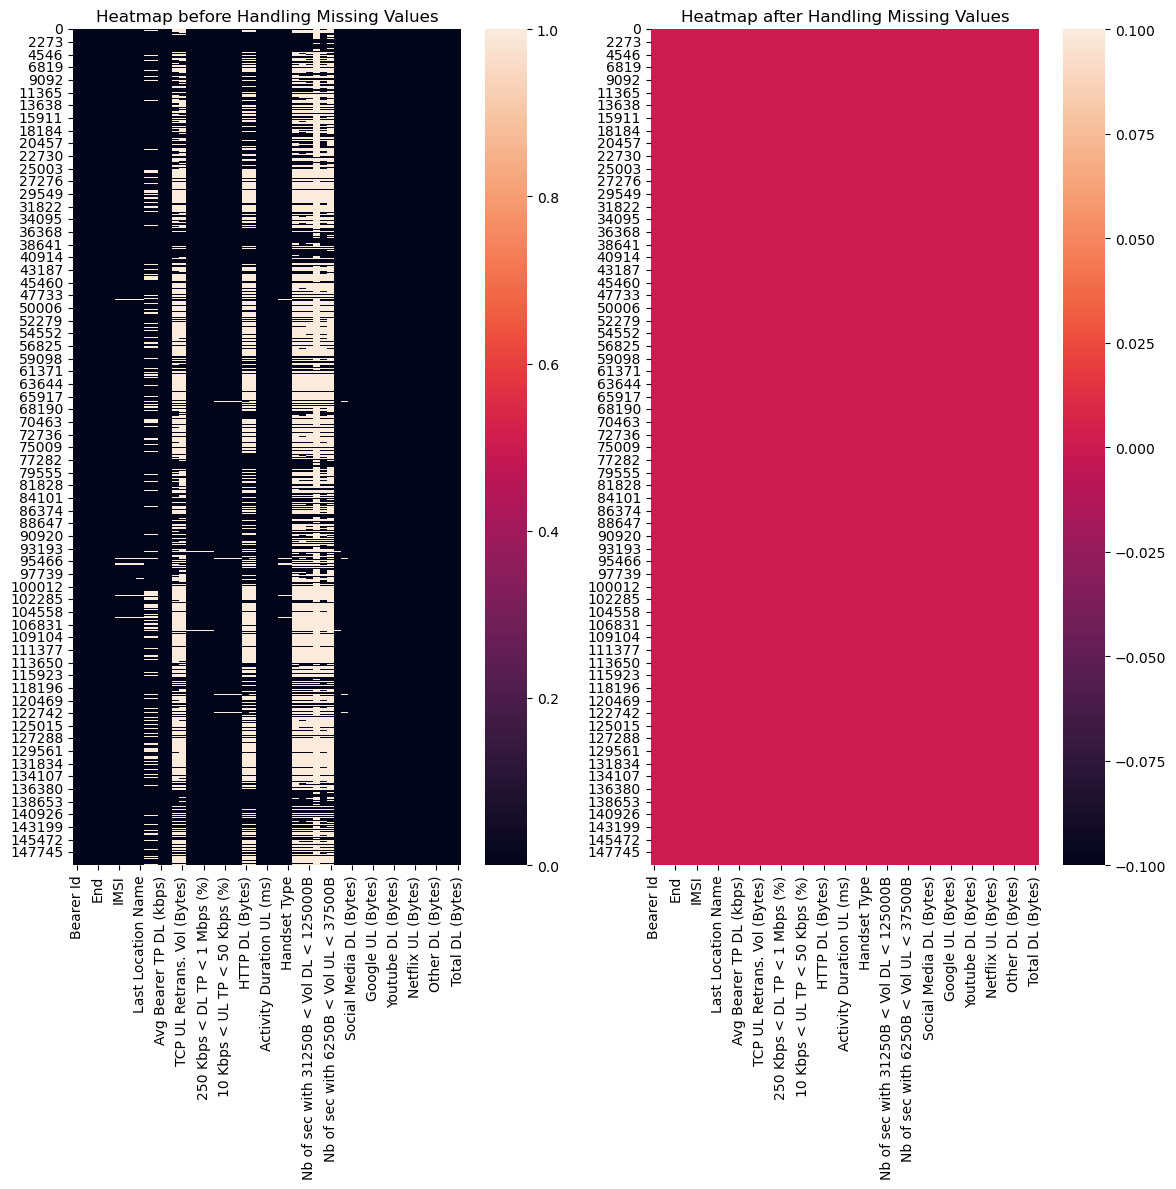

In [43]:
# heat map
plt.figure(figsize=(12, 12))
plt.subplot(1,2,1) #subplot 1
sns.heatmap(dataset.isnull())
plt.title('Heatmap before Handling Missing Values')

plt.subplot(1,2,2) #subplot 2
sns.heatmap(db1.isnull())
plt.title('Heatmap after Handling Missing Values')

plt.tight_layout()
plt.show()

## Analyze the basic metrics (mean, median, etc) in the Dataset (explain) & their importance for the global objective.

### basic metrics (mean, min,max,STD,count,Q1,Q2,Q3)

In [44]:
# statistical data of the dataset
db1.describe().T

count          mean  \
Start ms                                  150001.0  4.991882e+02   
End ms                                    150001.0  4.988009e+02   
Dur. (ms)                                 150001.0  1.046086e+05   
IMSI                                      150001.0  2.082016e+14   
MSISDN/Number                             150001.0  4.188282e+10   
IMEI                                      150001.0  4.847455e+13   
Avg RTT DL (ms)                           150001.0  1.097957e+02   
Avg RTT UL (ms)                           150001.0  1.766288e+01   
Avg Bearer TP DL (kbps)                   150001.0  1.330005e+04   
Avg Bearer TP UL (kbps)                   150001.0  1.770429e+03   
TCP DL Retrans. Vol (Bytes)               150001.0  2.080991e+07   
TCP UL Retrans. Vol (Bytes)               150001.0  7.596587e+05   
DL TP < 50 Kbps (%)                       150001.0  9.284475e+01   
50 Kbps < DL TP < 250 Kbps (%)            150001.0  3.069355e+00   
250 Kbps < DL TP < 1 Mbps (%)             150001.0  1.717341e+00   
DL TP > 1 Mbps (%)                        150001.0  1.609654e+00   
UL TP < 10 Kbps (%)                       150001.0  9.853014e+01   
10 Kbps < UL TP < 50 Kbps (%)             150001.0  7.767494e-01   
50 Kbps < UL TP < 300 Kbps (%)            150001.0  1.479871e-01   
UL TP > 300 Kbps (%)                      150001.0  7.892285e-02   
HTTP DL (Bytes)                           150001.0  1.144710e+08   
HTTP UL (Bytes)                           150001.0  3.242301e+06   
Activity Duration DL (ms)                 150001.0  1.829177e+06   
Activity Duration UL (ms)                 150001.0  1.408880e+06   
Dur. (ms).1                               150001.0  1.046091e+08   
Nb of sec with 125000B < Vol DL           150001.0  9.897000e+02   
Nb of sec with 1250B < Vol UL < 6250B     150001.0  3.404344e+02   
Nb of sec with 31250B < Vol DL < 125000B  150001.0  8.108374e+02   
Nb of sec with 37500B < Vol UL            150001.0  1.492571e+02   
Nb of sec with 6250B < Vol DL < 31250B    150001.0  9.654648e+02   
Nb of sec with 6250B < Vol UL < 37500B    150001.0  1.413048e+02   
Nb of sec with Vol DL < 6250B             150001.0  3.719788e+03   
Nb of sec with Vol UL < 1250B             150001.0  4.022083e+03   
Social Media DL (Bytes)                   150001.0  1.795322e+06   
Social Media UL (Bytes)                   150001.0  3.292843e+04   
Google DL (Bytes)                         150001.0  5.750753e+06   
Google UL (Bytes)                         150001.0  2.056542e+06   
Email DL (Bytes)                          150001.0  1.791729e+06   
Email UL (Bytes)                          150001.0  4.673734e+05   
Youtube DL (Bytes)                        150001.0  1.163407e+07   
Youtube UL (Bytes)                        150001.0  1.100941e+07   
Netflix DL (Bytes)                        150001.0  1.162685e+07   
Netflix UL (Bytes)                        150001.0  1.100175e+07   
Gaming DL (Bytes)                         150001.0  4.220447e+08   
Gaming UL (Bytes)                         150001.0  8.288398e+06   
Other DL (Bytes)                          150001.0  4.211005e+08   
Other UL (Bytes)                          150001.0  8.264799e+06   
Total UL (Bytes)                          150001.0  4.112121e+07   
Total DL (Bytes)                          150001.0  4.546434e+08   

                                                   std           min  \
Start ms                                  2.886109e+02  0.000000e+00   
End ms                                    2.880967e+02  0.000000e+00   
Dur. (ms)                                 8.103735e+04  7.142000e+03   
IMSI                                      2.144722e+10  2.040471e+14   
MSISDN/Number                             2.438731e+12  3.360100e+10   
IMEI                                      2.237359e+13  4.400152e+11   
Avg RTT DL (ms)                           5.593426e+02  0.000000e+00   
Avg RTT UL (ms)                           7.652993e+01  0.000000e+00

In [62]:
# mean of the dataset

In [47]:
db1.mean()

Start ms                                    4.991882e+02
End ms                                      4.988009e+02
Dur. (ms)                                   1.046086e+05
IMSI                                        2.082016e+14
MSISDN/Number                               4.188282e+10
IMEI                                        4.847455e+13
Avg RTT DL (ms)                             1.097957e+02
Avg RTT UL (ms)                             1.766288e+01
Avg Bearer TP DL (kbps)                     1.330005e+04
Avg Bearer TP UL (kbps)                     1.770429e+03
TCP DL Retrans. Vol (Bytes)                 2.080991e+07
TCP UL Retrans. Vol (Bytes)                 7.596587e+05
DL TP < 50 Kbps (%)                         9.284475e+01
50 Kbps < DL TP < 250 Kbps (%)              3.069355e+00
250 Kbps < DL TP < 1 Mbps (%)               1.717341e+00
DL TP > 1 Mbps (%)                          1.609654e+00
UL TP < 10 Kbps (%)                         9.853014e+01
10 Kbps < UL TP < 50 Kbps (%)  

In [48]:
# variance
db1.var()

Start ms                                    8.329624e+04
End ms                                      8.299970e+04
Dur. (ms)                                   6.567052e+09
IMSI                                        4.599834e+20
MSISDN/Number                               5.947410e+24
IMEI                                        5.005776e+26
Avg RTT DL (ms)                             3.128642e+05
Avg RTT UL (ms)                             5.856831e+03
Avg Bearer TP DL (kbps)                     5.746471e+08
Avg Bearer TP UL (kbps)                     2.139377e+07
TCP DL Retrans. Vol (Bytes)                 1.374418e+16
TCP UL Retrans. Vol (Bytes)                 2.488873e+14
DL TP < 50 Kbps (%)                         1.691358e+02
50 Kbps < DL TP < 250 Kbps (%)              3.843494e+01
250 Kbps < DL TP < 1 Mbps (%)               1.721478e+01
DL TP > 1 Mbps (%)                          2.320097e+01
UL TP < 10 Kbps (%)                         2.136320e+01
10 Kbps < UL TP < 50 Kbps (%)  

In [49]:
# Kurtosis¶
##The normally distributed data has a kurtosis near zero
db1.kurt()

Start ms                                        -1.197441
End ms                                          -1.199123
Dur. (ms)                                       37.022454
IMSI                                         55948.725267
MSISDN/Number                               116673.654352
IMEI                                            -0.703064
Avg RTT DL (ms)                               8805.687875
Avg RTT UL (ms)                               1632.646032
Avg Bearer TP DL (kbps)                          9.573691
Avg Bearer TP UL (kbps)                         25.086860
TCP DL Retrans. Vol (Bytes)                    697.574773
TCP UL Retrans. Vol (Bytes)                  21913.803296
DL TP < 50 Kbps (%)                              5.659109
50 Kbps < DL TP < 250 Kbps (%)                  16.009382
250 Kbps < DL TP < 1 Mbps (%)                   34.546792
DL TP > 1 Mbps (%)                              41.020303
UL TP < 10 Kbps (%)                            113.043239
10 Kbps < UL T

In [50]:
# central tendency value
db1.median().T

Start ms                                    4.990000e+02
End ms                                      5.000000e+02
Dur. (ms)                                   8.639900e+04
IMSI                                        2.082015e+14
MSISDN/Number                               3.366380e+10
IMEI                                        3.572241e+13
Avg RTT DL (ms)                             5.400000e+01
Avg RTT UL (ms)                             7.000000e+00
Avg Bearer TP DL (kbps)                     6.300000e+01
Avg Bearer TP UL (kbps)                     6.300000e+01
TCP DL Retrans. Vol (Bytes)                 2.080991e+07
TCP UL Retrans. Vol (Bytes)                 7.596587e+05
DL TP < 50 Kbps (%)                         1.000000e+02
50 Kbps < DL TP < 250 Kbps (%)              0.000000e+00
250 Kbps < DL TP < 1 Mbps (%)               0.000000e+00
DL TP > 1 Mbps (%)                          0.000000e+00
UL TP < 10 Kbps (%)                         1.000000e+02
10 Kbps < UL TP < 50 Kbps (%)  

In [51]:
db1.mode()

Bearer Id               Start  Start ms                 End  End ms  \
0             2019-04-29 07:08:38     341.0 2019-04-25 00:01:32   872.0   
1         NaN                 NaT       NaN                 NaT     NaN   
2         NaN                 NaT       NaN                 NaT     NaN   
3         NaN                 NaT       NaN                 NaT     NaN   
4         NaN                 NaT       NaN                 NaT     NaN   
..        ...                 ...       ...                 ...     ...   
267       NaN                 NaT       NaN                 NaT     NaN   
268       NaN                 NaT       NaN                 NaT     NaN   
269       NaN                 NaT       NaN                 NaT     NaN   
270       NaN                 NaT       NaN                 NaT     NaN   
271       NaN                 NaT       NaN                 NaT     NaN   

     Dur. (ms)          IMSI  MSISDN/Number          IMEI Last Location Name  \
0      86399.0  2.082016e+14   4.188282e+10  4.847455e+13            D41377B   
1          NaN           NaN            NaN           NaN                NaN   
2          NaN           NaN            NaN           NaN                NaN   
3          NaN           NaN            NaN           NaN                NaN   
4          NaN           NaN            NaN           NaN                NaN   
..         ...           ...            ...           ...                ...   
267        NaN           NaN            NaN           NaN                NaN   
268        NaN           NaN            NaN           NaN                NaN   
269        NaN           NaN            NaN           NaN                NaN   
270        NaN           NaN            NaN           NaN                NaN   
271        NaN           NaN            NaN           NaN                NaN   

     Avg RTT DL (ms)  Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  \
0         109.795706        17.662883                     23.0   
1                NaN              NaN                      NaN   
2                NaN              NaN                      NaN   
3                NaN              NaN                      NaN   
4                NaN              NaN                      NaN   
..               ...              ...                      ...   
267              NaN              NaN                      NaN   
268              NaN              NaN                      NaN   
269              NaN              NaN                      NaN   
270              NaN              NaN                      NaN   
271              NaN              NaN                      NaN   

     Avg Bearer TP UL (kbps)  TCP DL Retrans. Vol (Bytes)  \
0                       40.0                 2.080991e+07   
1                        NaN                          NaN   
2                        NaN                          NaN   
3                        NaN                          NaN   
4                        NaN                          NaN   
..                       ...                          ...   
267                      NaN                          NaN   
268                      NaN                          NaN   
269                      NaN                          NaN   
270                      NaN                          NaN   
271                      NaN                          NaN   

     TCP UL Retrans. Vol (Bytes)  DL TP < 50 Kbps (%)  \
0                  759658.664811                100.0   
1                            NaN                  NaN   
2                            NaN                  NaN   
3                            NaN                  NaN   
4                            NaN                  NaN   
..                           ...                  ...   
267                          NaN                  NaN   
268                          NaN                  NaN   
269                          NaN                  NaN   
270                          NaN              

###### Mean: Represents the average value of a data set. Useful for understanding overall usage patterns.
###### Median: Represents the middle value when data is ordered. Less sensitive to outliers than mean, making it valuable for skewed data.
###### Mode: Represents the most frequent value. Useful for identifying common customer behavior.
###### Variance: Measures how spread out the data is from the mean. Helps in understanding data variability
###### Kurtosis: Measures how "peaked" or "flat" the data distribution is compared to a normal distribution. Useful for identifying outliers and understanding data shape (e.g., data heavily concentrated around mean or spread out with long tails).

### Conduct a Graphical Univariate Analysis by identifying the most suitable plotting options for each variable and interpreting your findings.

In [45]:
non_categorical_columns= []
for col in db1.columns:
    if db1[col].dtypes != "object":
        non_categorical_columns.append(col)

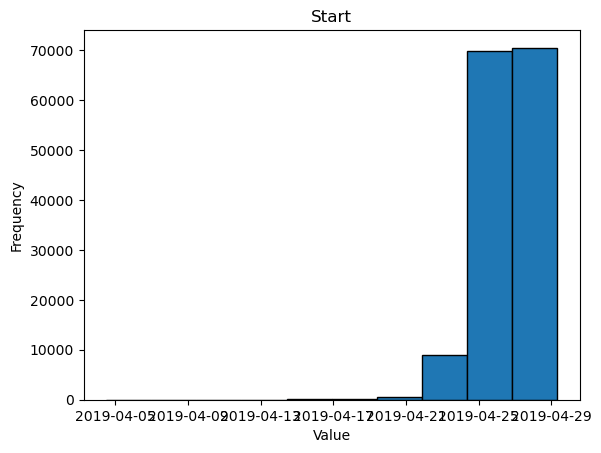

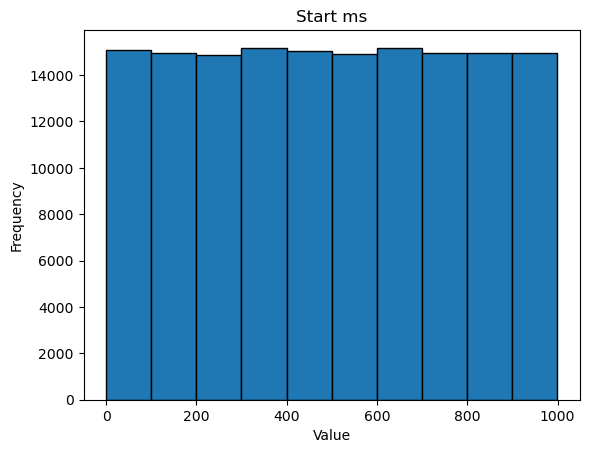

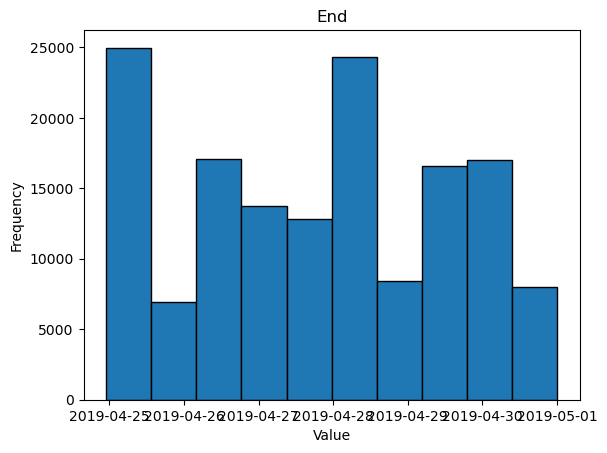

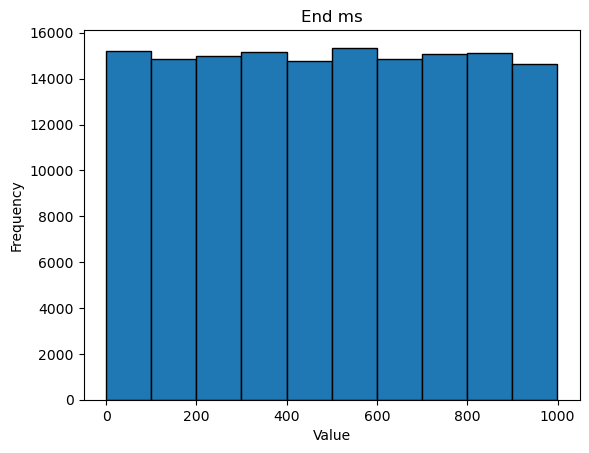

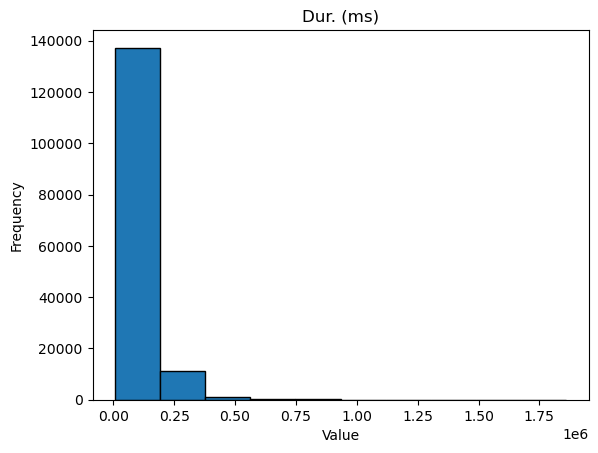

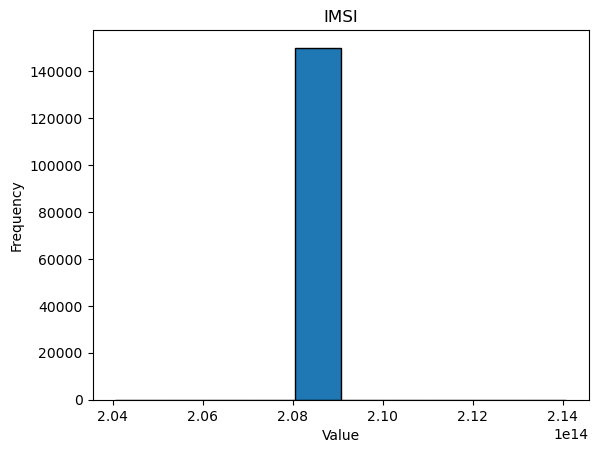

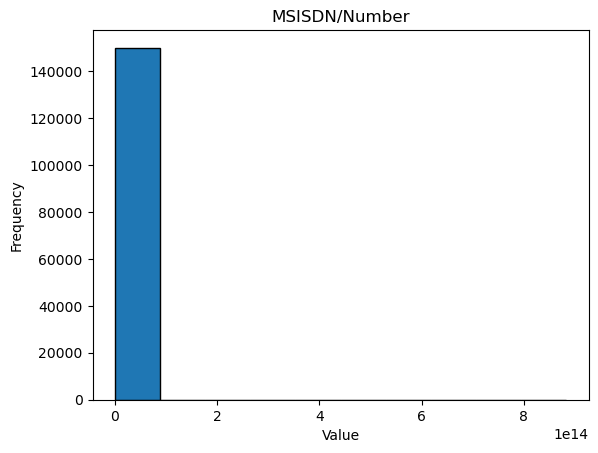

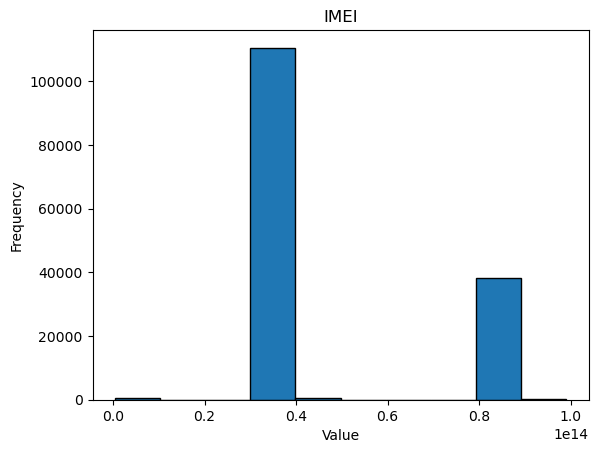

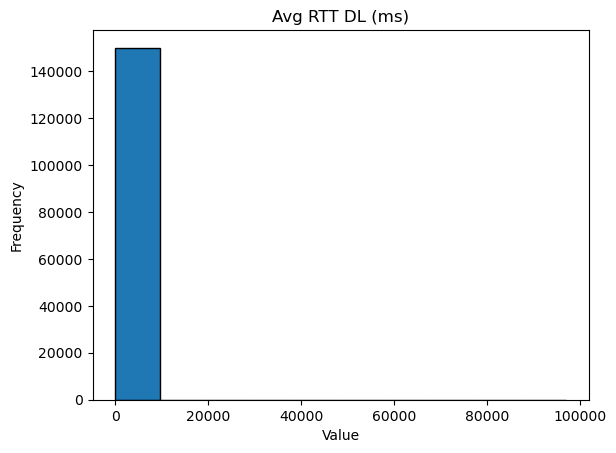

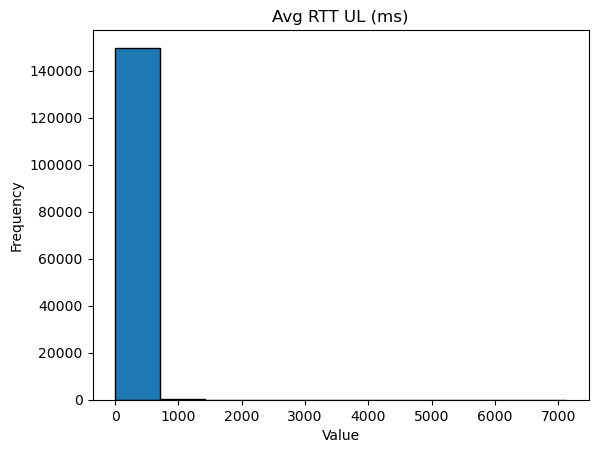

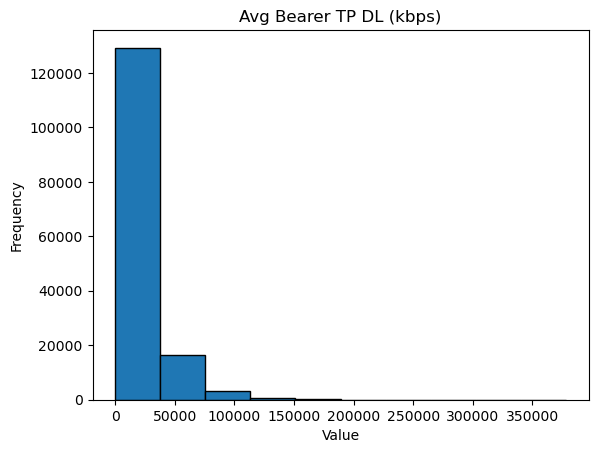

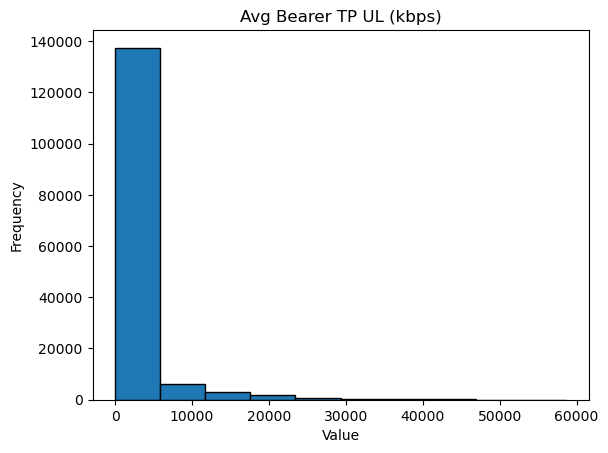

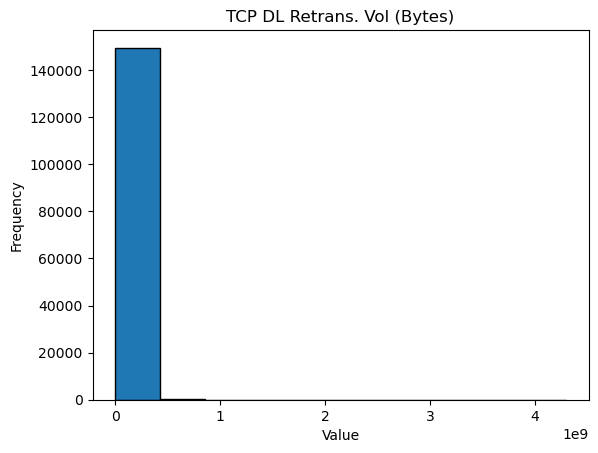

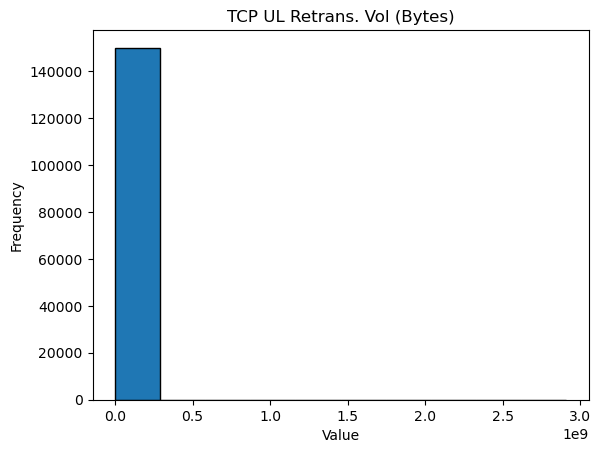

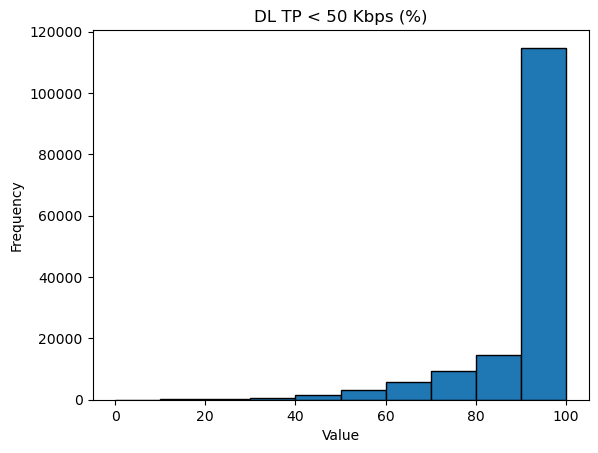

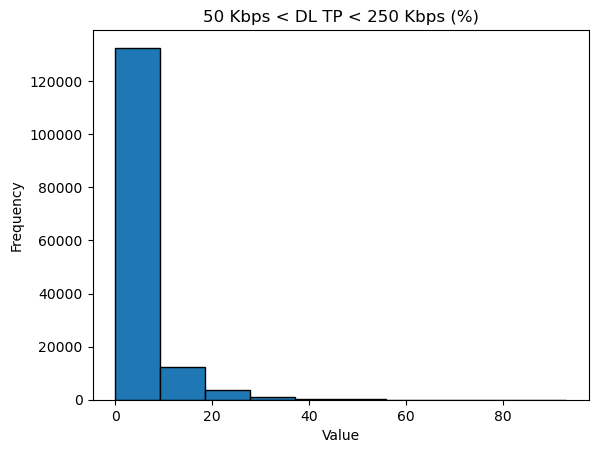

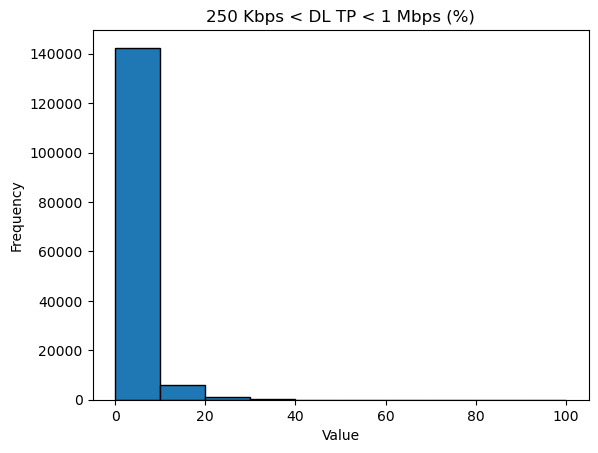

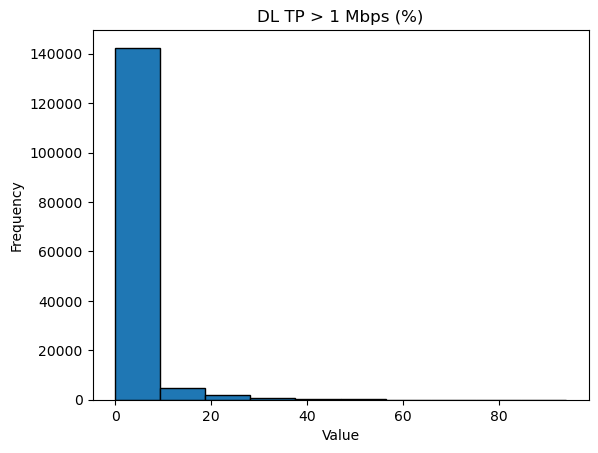

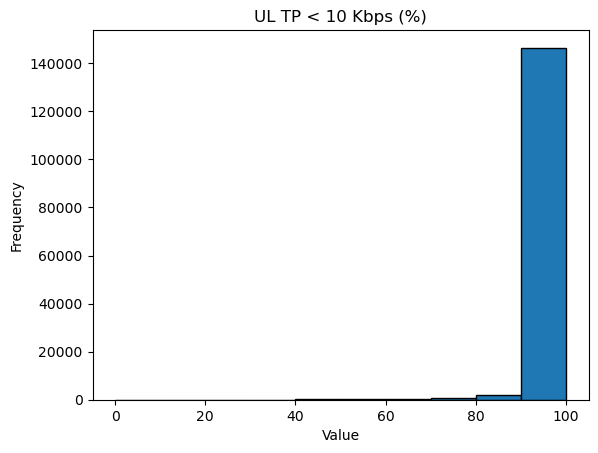

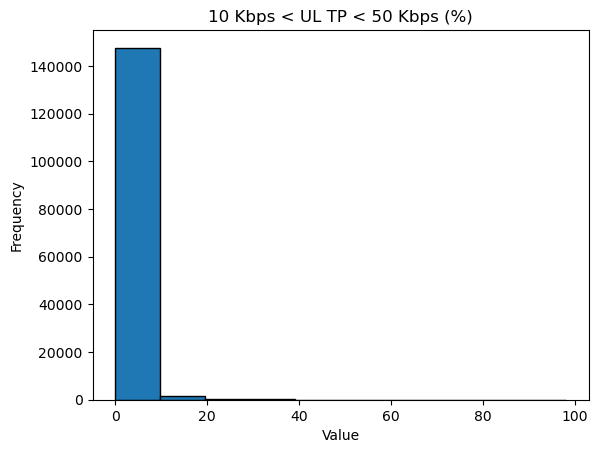

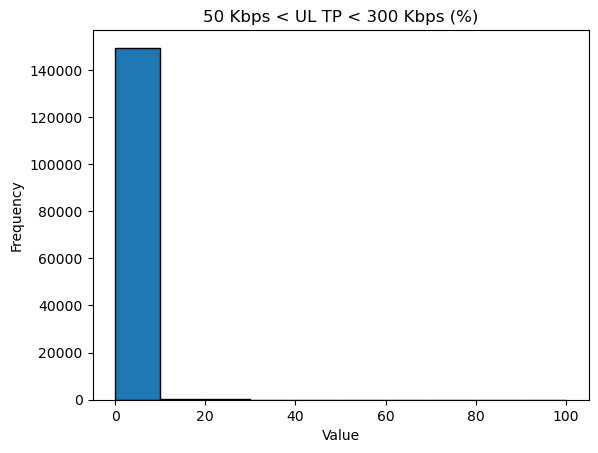

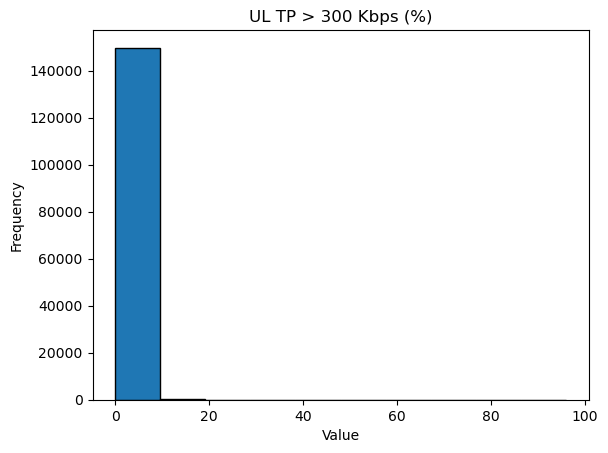

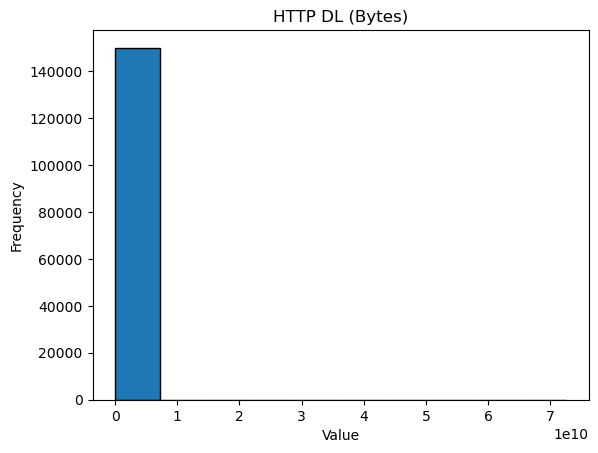

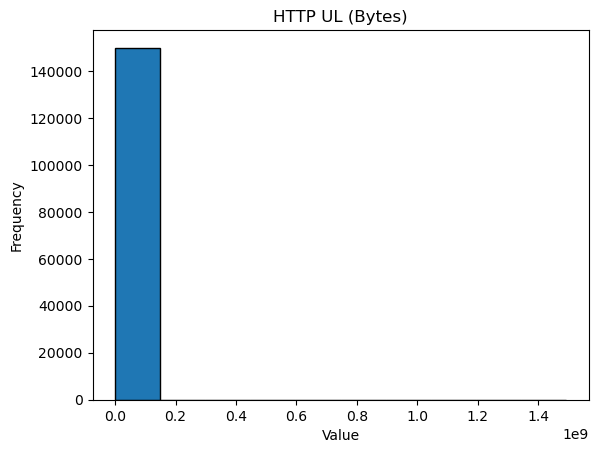

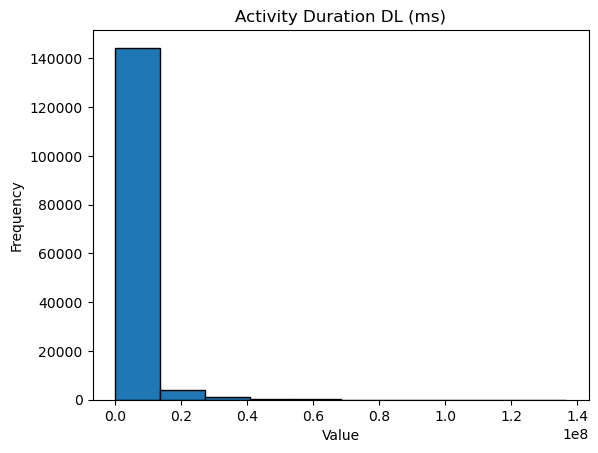

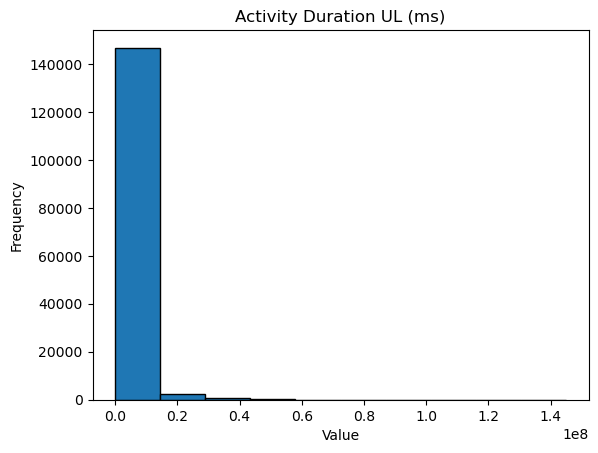

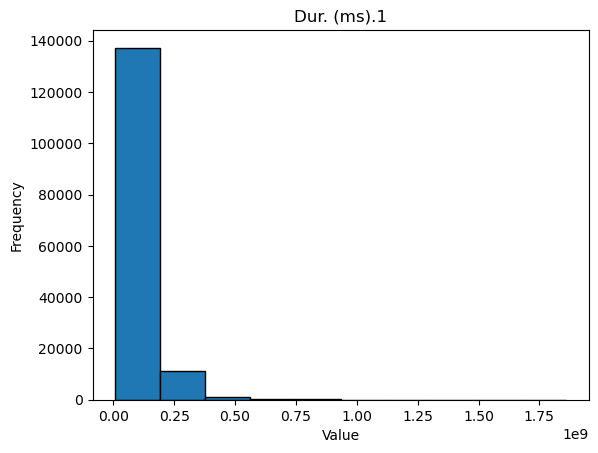

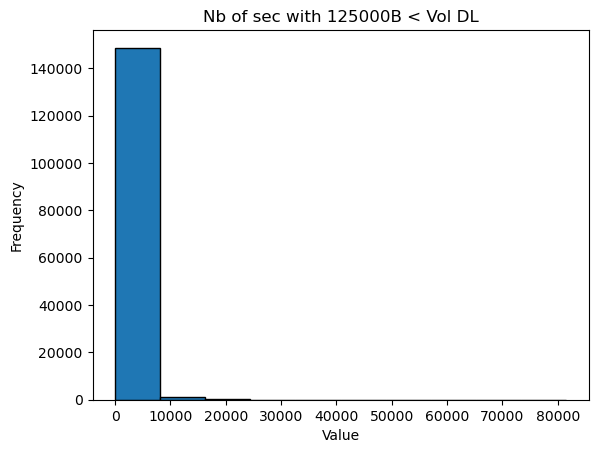

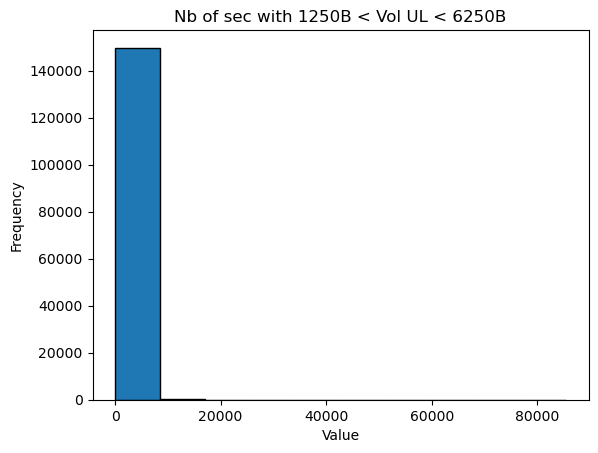

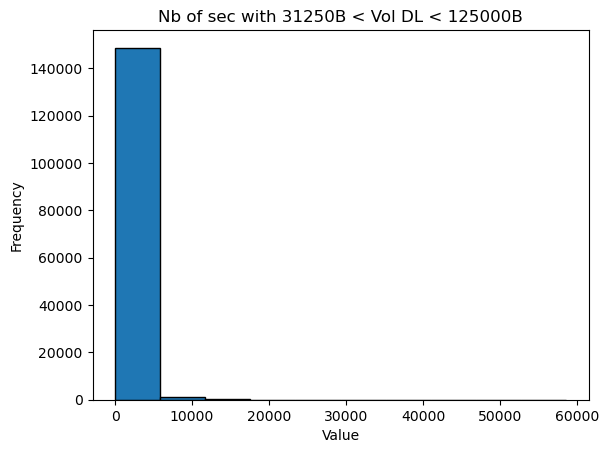

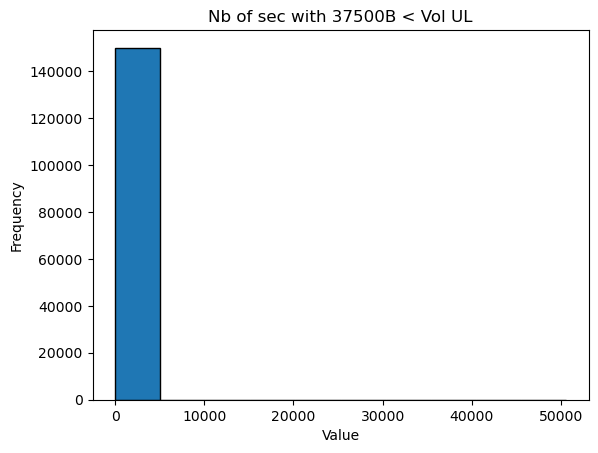

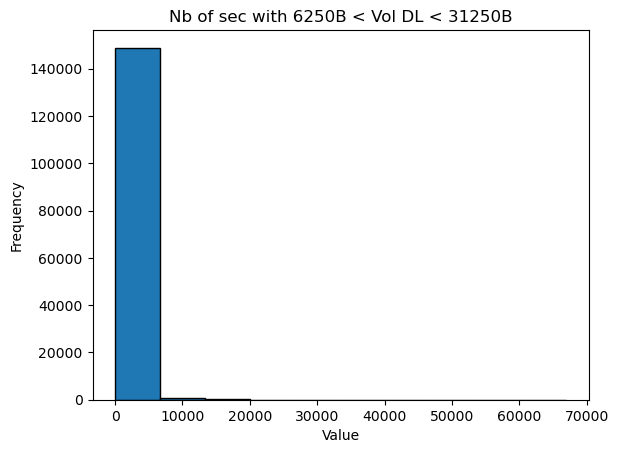

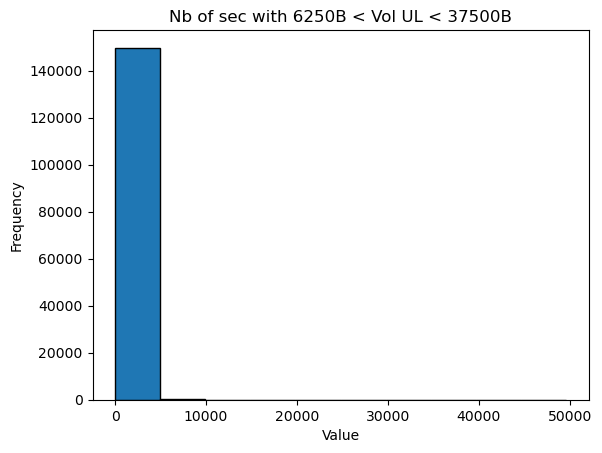

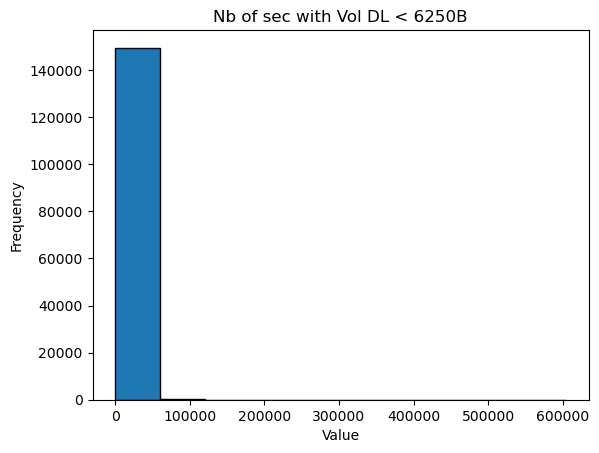

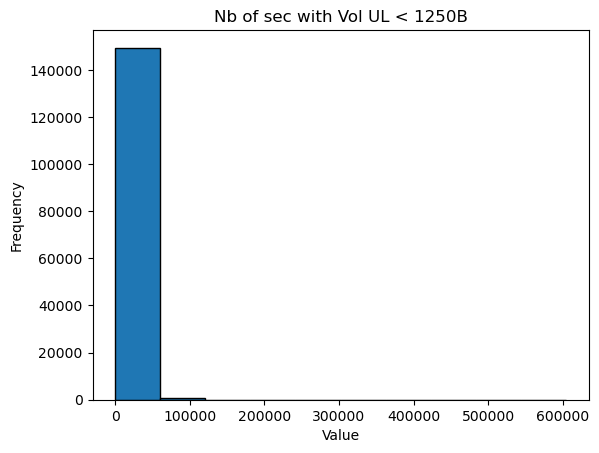

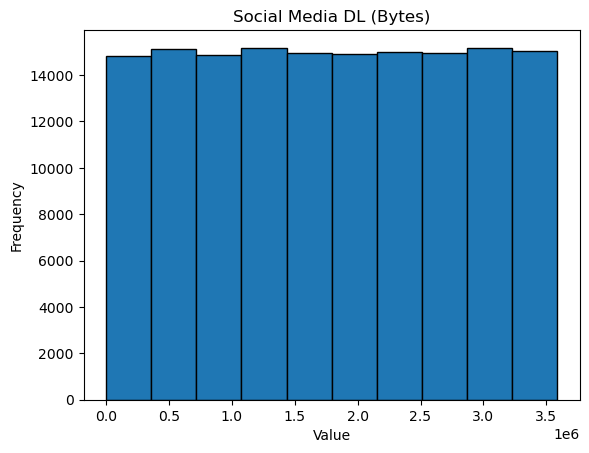

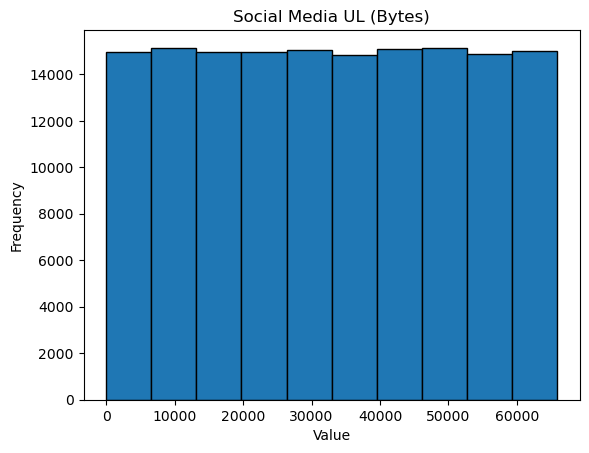

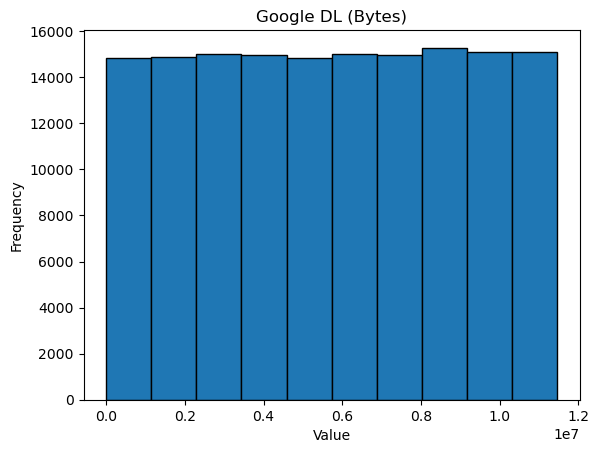

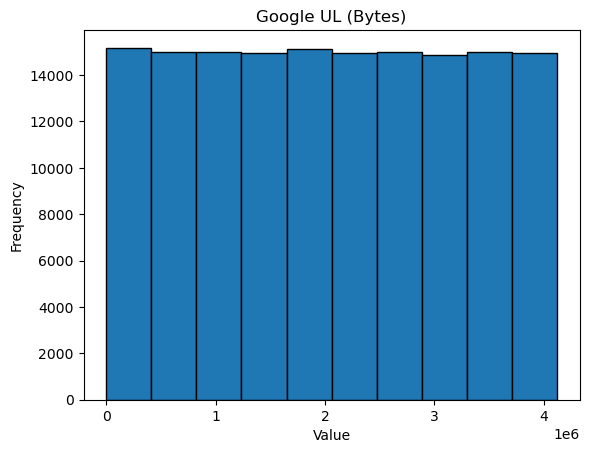

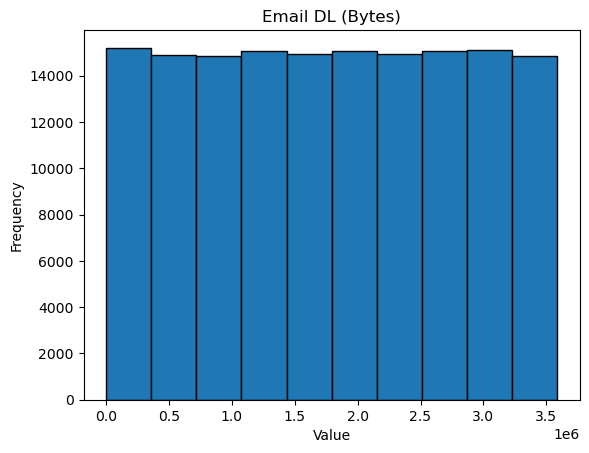

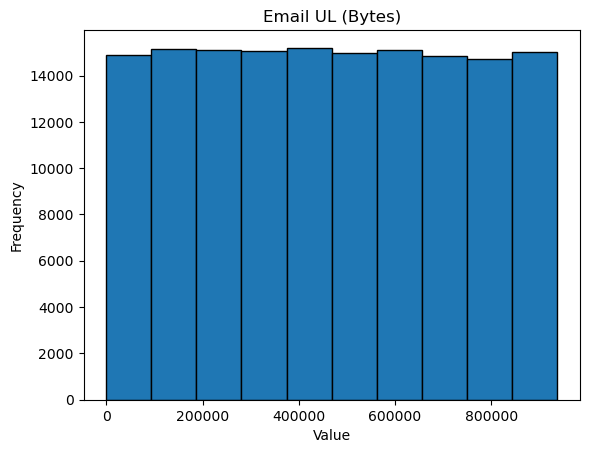

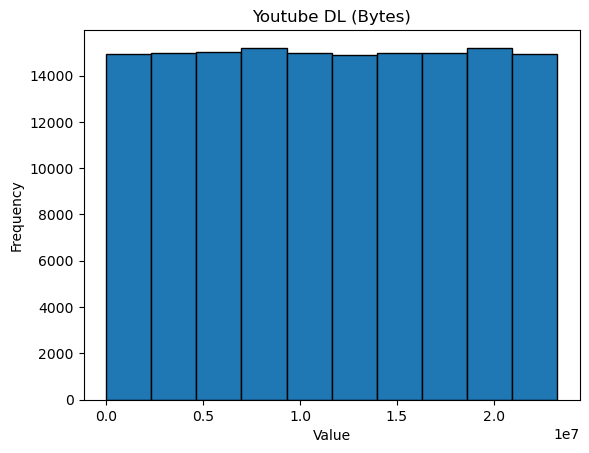

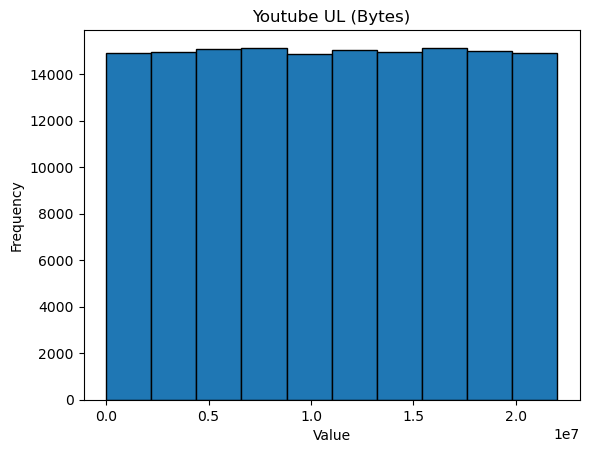

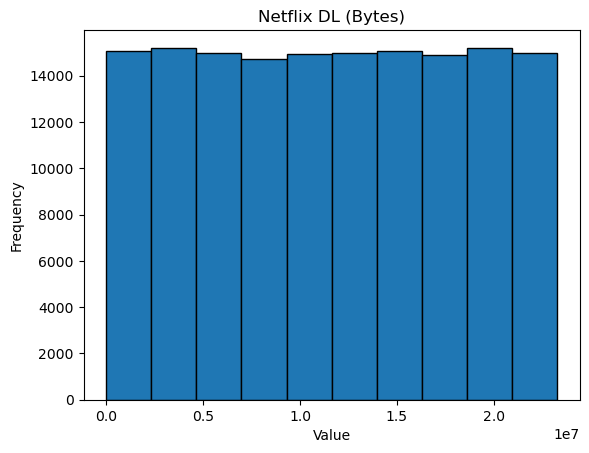

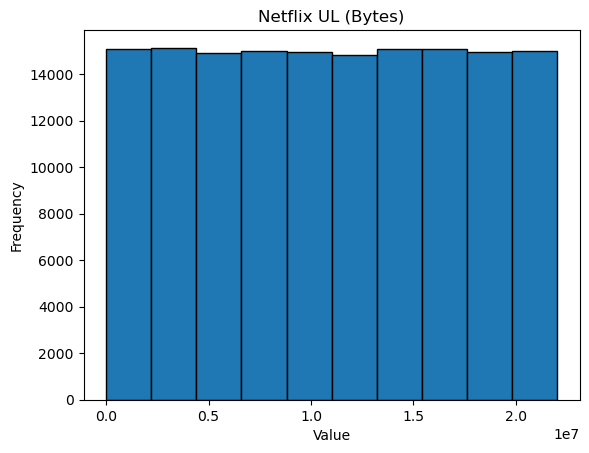

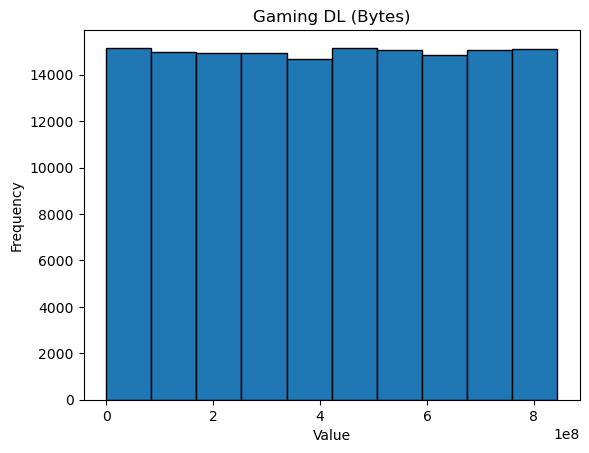

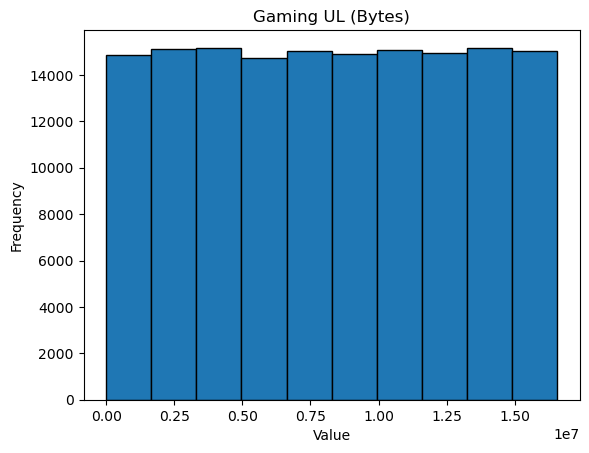

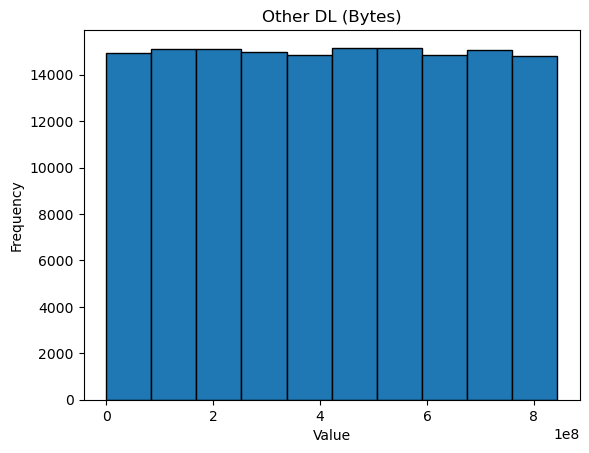

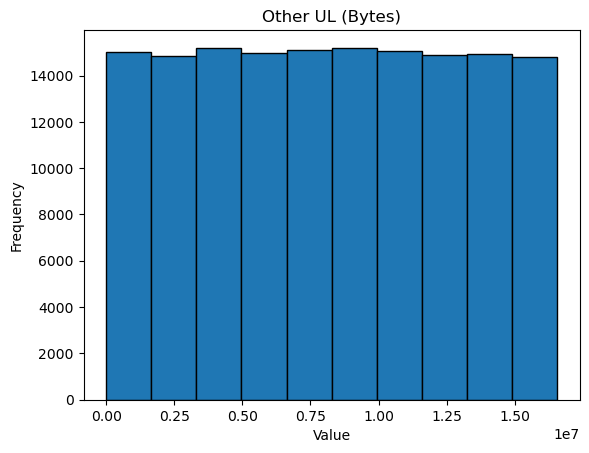

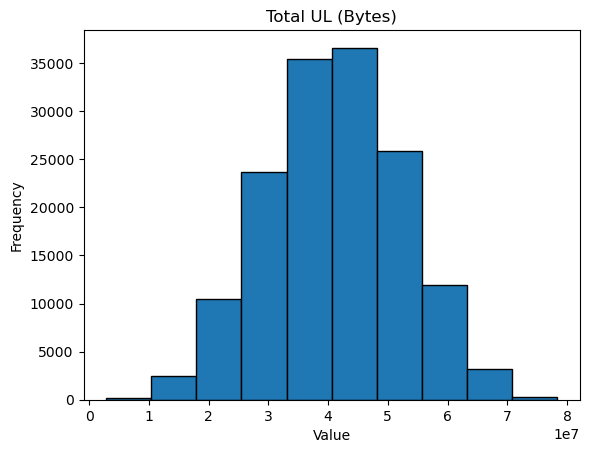

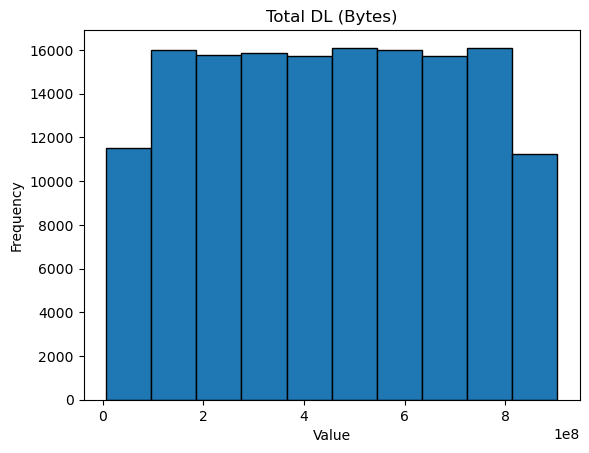

In [46]:
for col in non_categorical_columns:
    
    plt.hist(db1[col], bins=10,edgecolor='black')  # Adjust the number of bins as needed
    plt.title(col)
    plt.xlabel("Value")
    plt.ylabel("Frequency")
   # plt.savefig(f"{col}_histogram.png") 
    plt.show()

In [47]:
categorical_data = []
for col in db1.columns:
    if db1[col].dtypes == "object":
        categorical_data.append(col)

In [48]:
for col in categorical_data:
    print("*"*50)
    print("Top 10 categories for {}".format(col))
    print(db1[col].value_counts().sort_values(ascending = False).head(10))
    print("*"*50)

**************************************************
Top 10 categories for Bearer Id
                        991
13042425979269199872     16
13042425965944199168     10
13042425974582800384      9
13042425978774599680      9
13042425981873399808      9
13042425972278300672      9
13042425975039100928      8
13042425960483100672      8
13114483561758900224      8
Name: Bearer Id, dtype: int64
**************************************************
**************************************************
Top 10 categories for Last Location Name
D41377B             1233
D17085A               59
D72396C               57
9164566985995010      55
D73604C               55
D11119B               54
9164567013049100      51
L41377B               51
D11002B               50
L70357B               46
Name: Last Location Name, dtype: int64
**************************************************
**************************************************
Top 10 categories for Handset Manufacturer
Apple                         

**************************************************
Top 10 categories for Bearer Id
                        991
13042425979269199872     16
13042425965944199168     10
13042425974582800384      9
13042425978774599680      9
13042425981873399808      9
13042425972278300672      9
13042425975039100928      8
13042425960483100672      8
13114483561758900224      8
Name: Bearer Id, dtype: int64


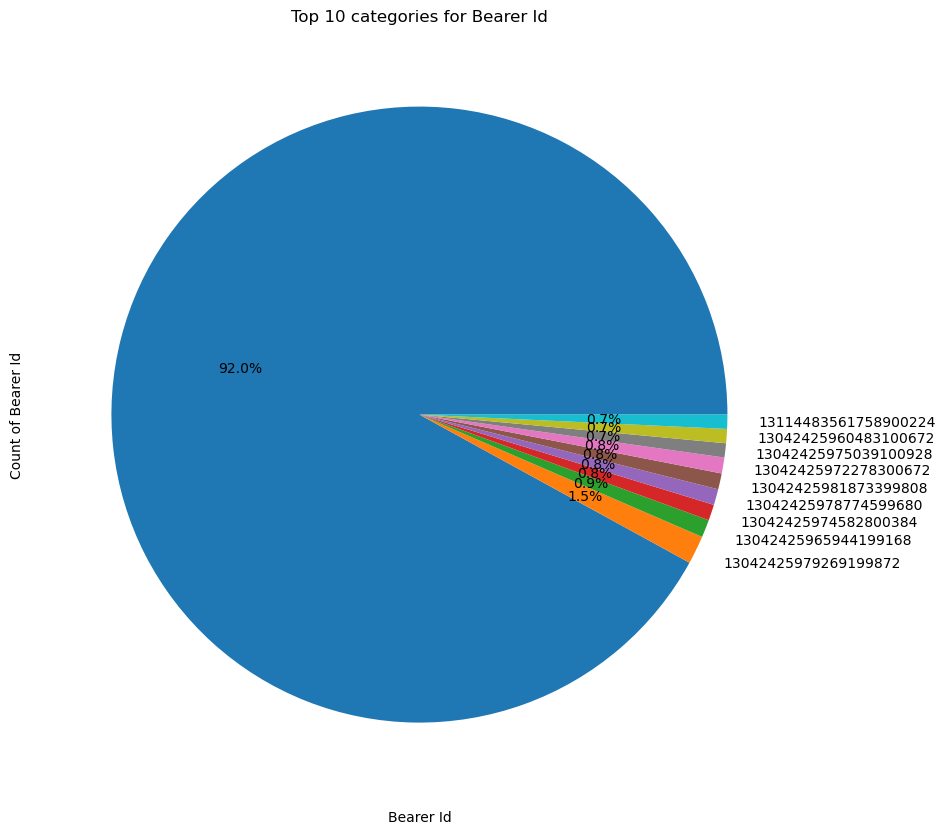

**************************************************
Top 10 categories for Last Location Name
D41377B             1233
D17085A               59
D72396C               57
9164566985995010      55
D73604C               55
D11119B               54
9164567013049100      51
L41377B               51
D11002B               50
L70357B               46
Name: Last Location Name, dtype: int64


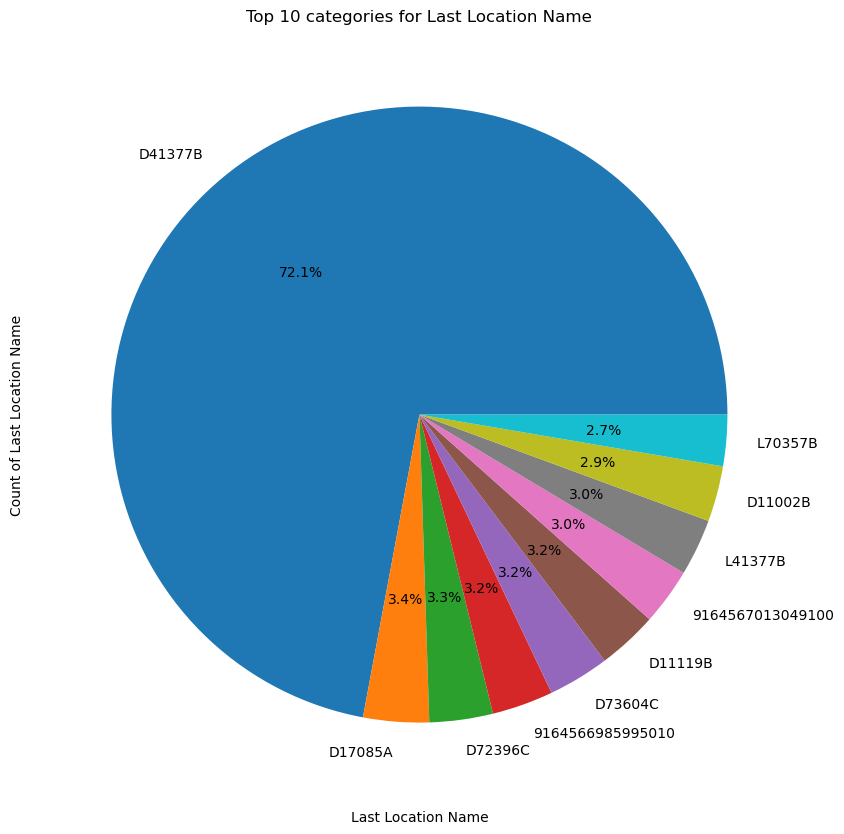

**************************************************
Top 10 categories for Handset Manufacturer
Apple                                   60137
Samsung                                 40839
Huawei                                  34423
undefined                                8987
Sony Mobile Communications Ab             980
Wiko Global Sasu                          747
Xiaomi Communications Co Ltd              397
Oneplus Technology (Shenzhen) Co Ltd      342
Asustek                                   285
Lenovo                                    254
Name: Handset Manufacturer, dtype: int64


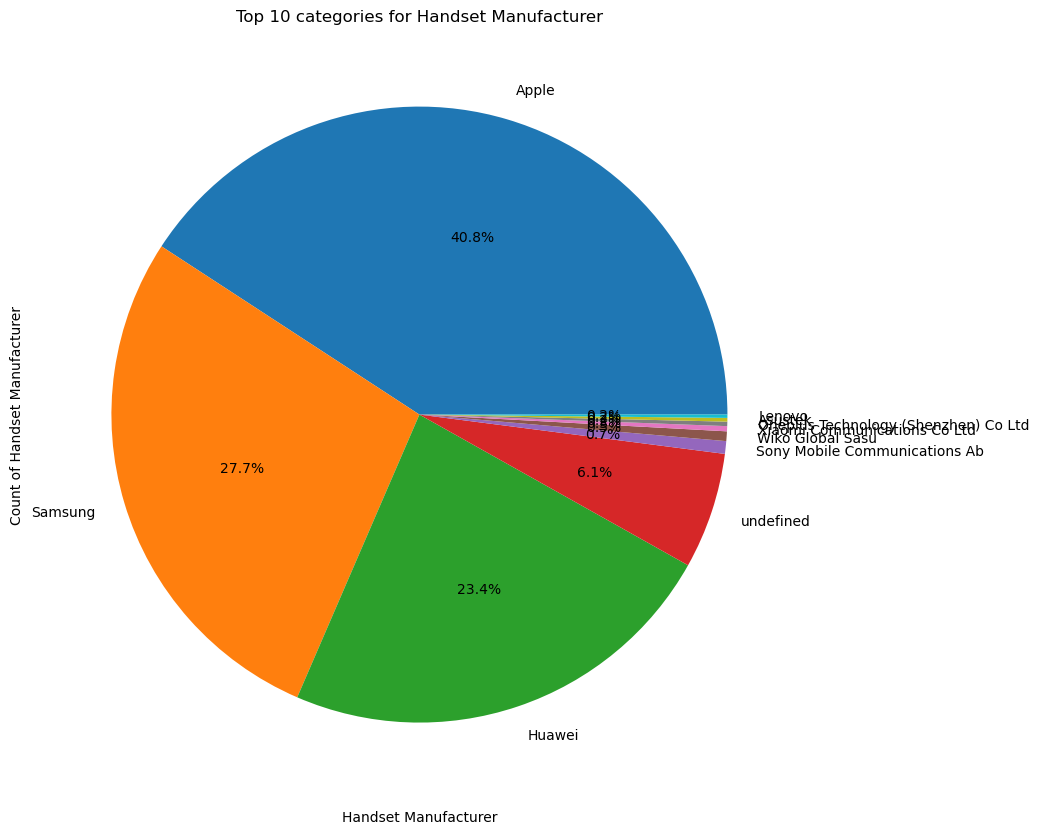

**************************************************
Top 10 categories for Handset Type
Huawei B528S-23A                20324
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64


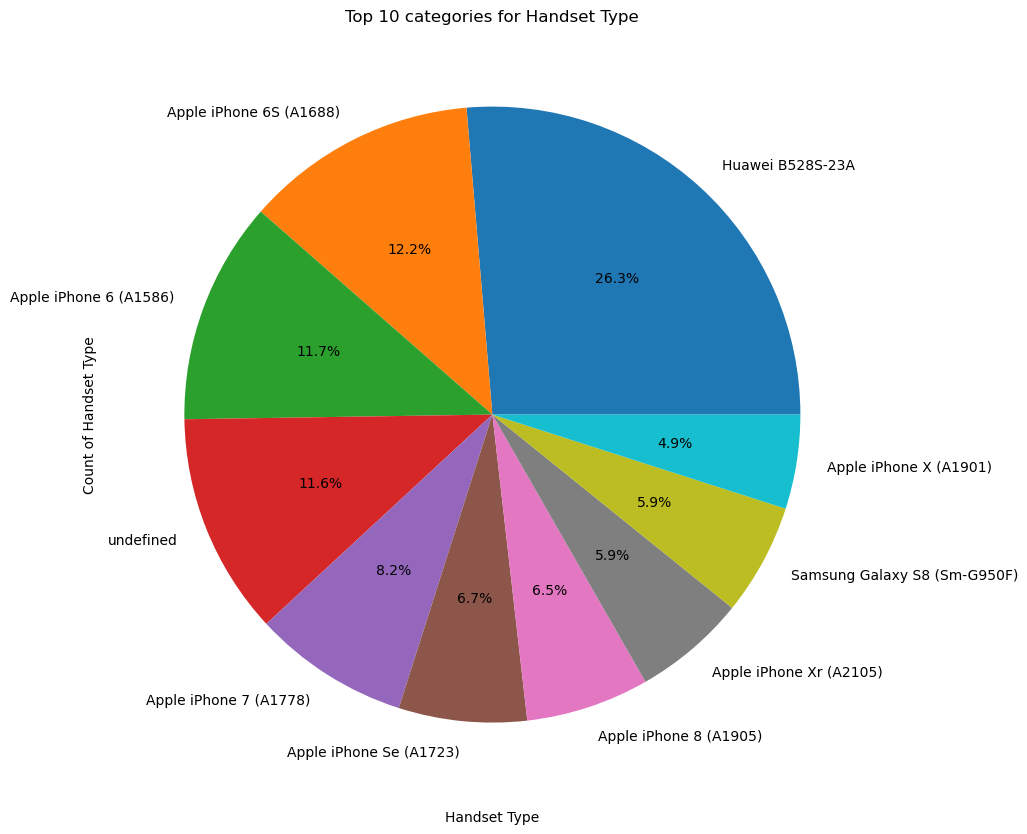

In [56]:
for col in categorical_data:
    print("*"*50)
    print("Top 10 categories for {}".format(col))
    print(db1[col].value_counts().sort_values(ascending = False).head(10))
    index = db1[col].value_counts().sort_values(ascending = False).head(10).index
    values = db1[col].value_counts().sort_values(ascending = False).head(10).values
    plt.figure(figsize = [10,10])
    
    plt.pie(values, labels = index,autopct = '%.1f%%')
    plt.xlabel(col)
    plt.ylabel("Count of {}".format(col))
    plt.title("Top 10 categories for {}".format(col))
    plt.grid()
    plt.show();

In [49]:
non_categorical_columns

['Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Social Media DL (Bytes)',
 'Social Media UL (Bytes)',
 'Google DL (Bytes)',
 'Google

In [50]:
 categorical_data

['Bearer Id', 'Last Location Name', 'Handset Manufacturer', 'Handset Type']

In [51]:
# skewness(normal distribution)
db1.skew()

Start ms                                      0.000968
End ms                                       -0.001163
Dur. (ms)                                     3.952622
IMSI                                         41.124164
MSISDN/Number                               333.342413
IMEI                                          1.073519
Avg RTT DL (ms)                              69.705161
Avg RTT UL (ms)                              31.530109
Avg Bearer TP DL (kbps)                       2.589445
Avg Bearer TP UL (kbps)                       4.503428
TCP DL Retrans. Vol (Bytes)                  24.840677
TCP UL Retrans. Vol (Bytes)                 141.035684
DL TP < 50 Kbps (%)                          -2.303600
50 Kbps < DL TP < 250 Kbps (%)                3.279706
250 Kbps < DL TP < 1 Mbps (%)                 4.577678
DL TP > 1 Mbps (%)                            5.383899
UL TP < 10 Kbps (%)                          -9.008830
10 Kbps < UL TP < 50 Kbps (%)                10.972894
50 Kbps < 

In [52]:
object_columns_df = db1.select_dtypes(include=['object'])
numerical_columns_df =db1.select_dtypes(exclude=['object'])

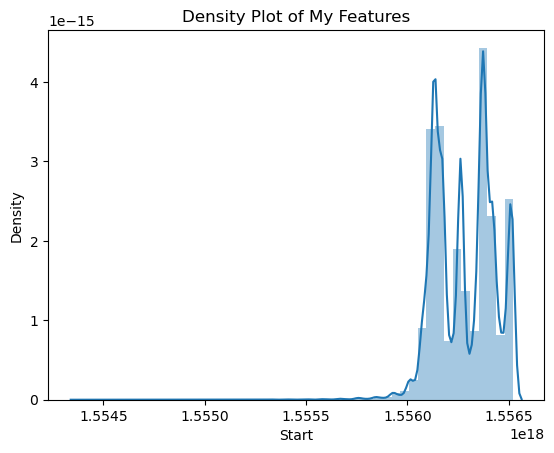

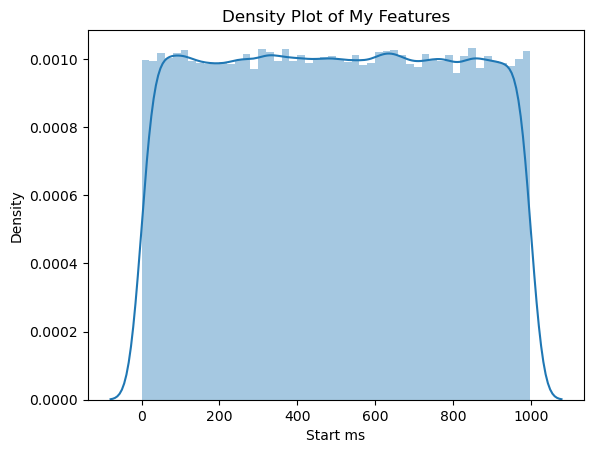

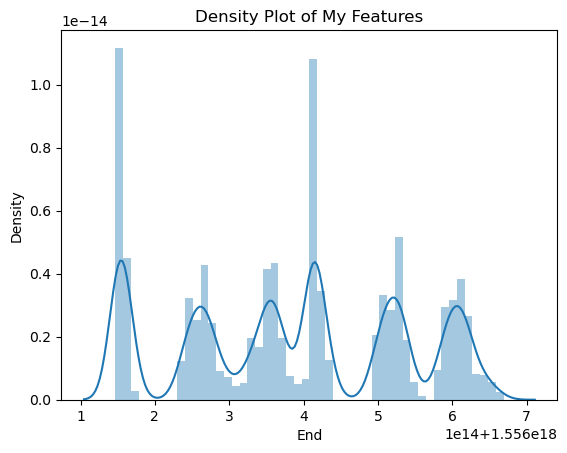

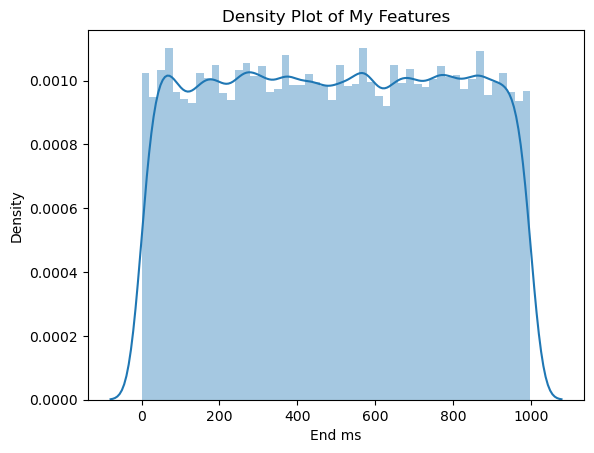

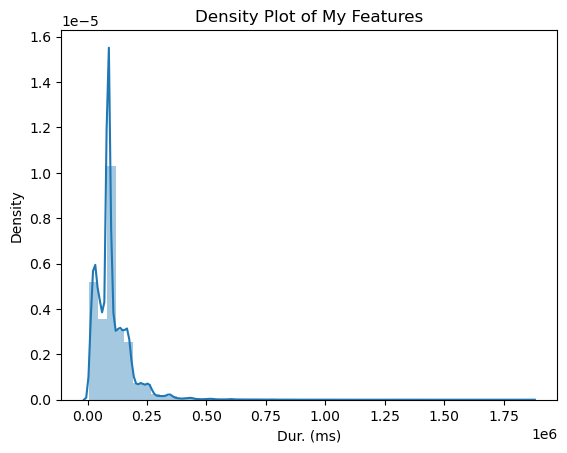

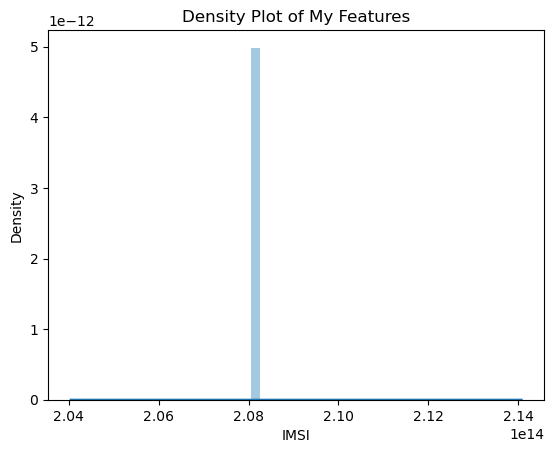

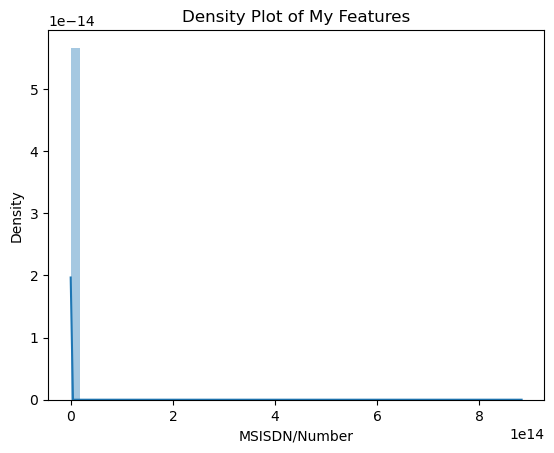

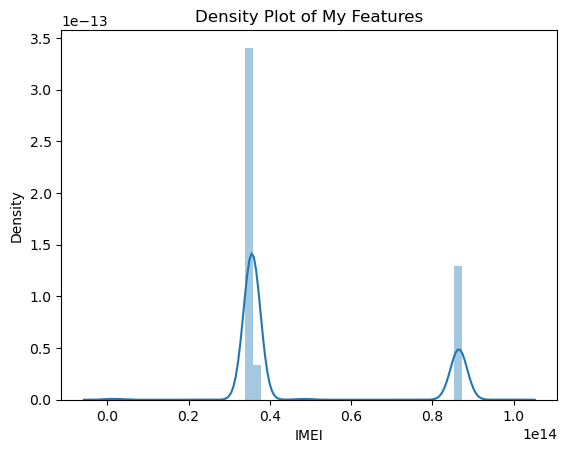

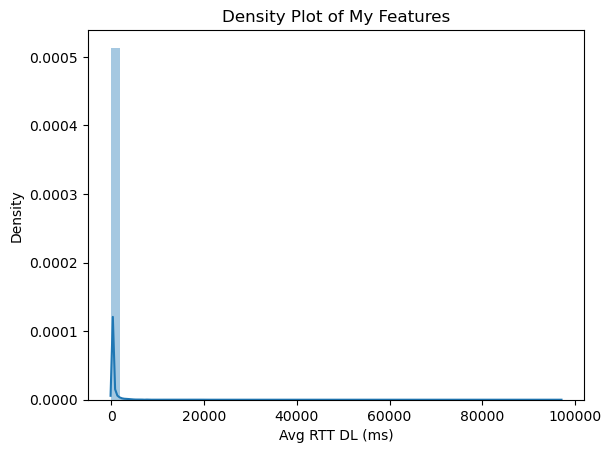

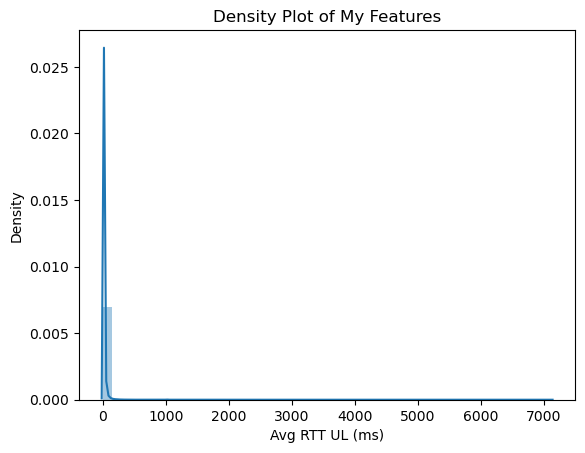

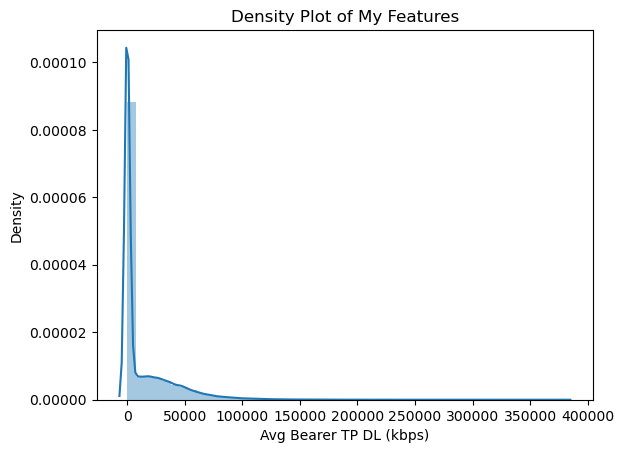

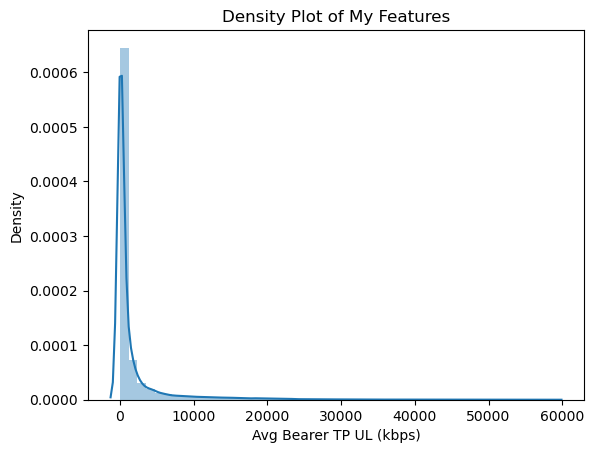

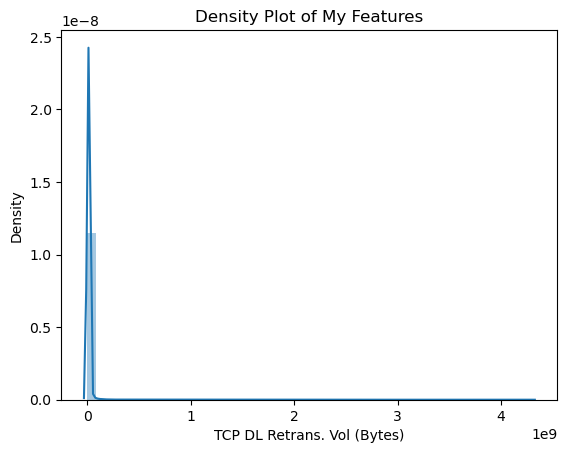

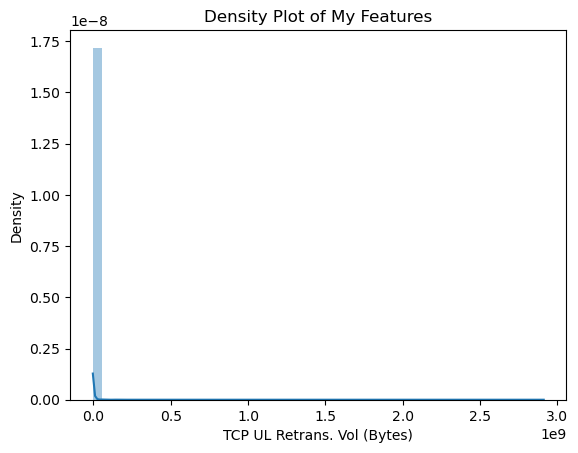

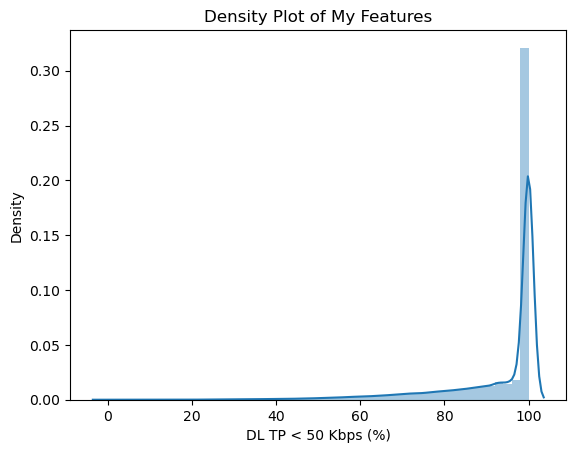

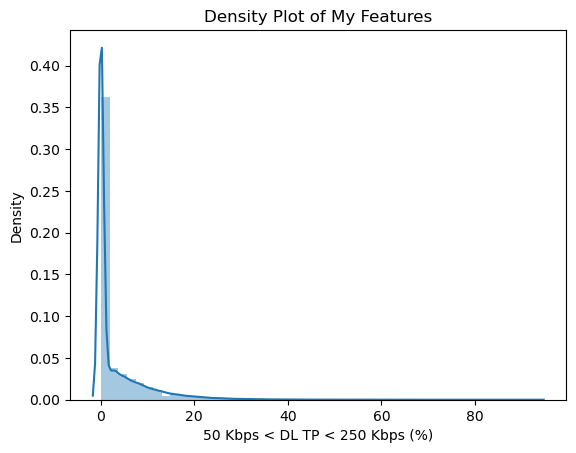

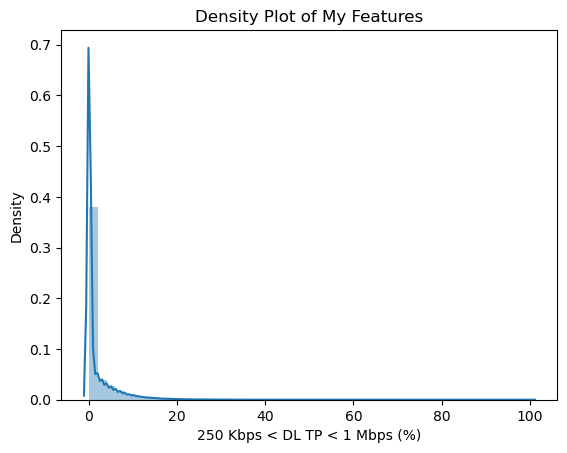

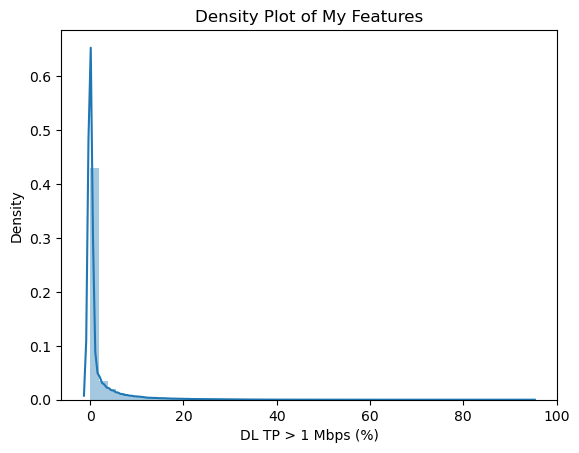

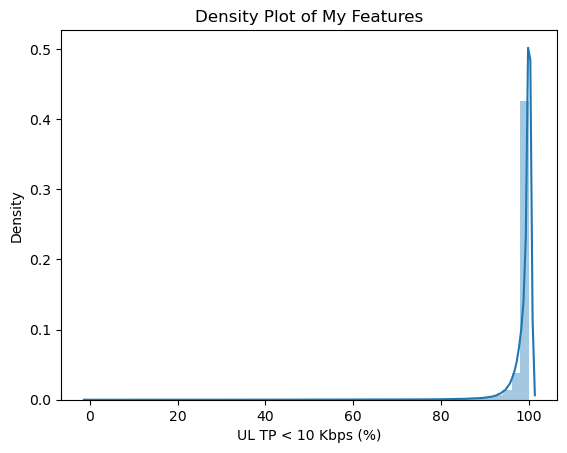

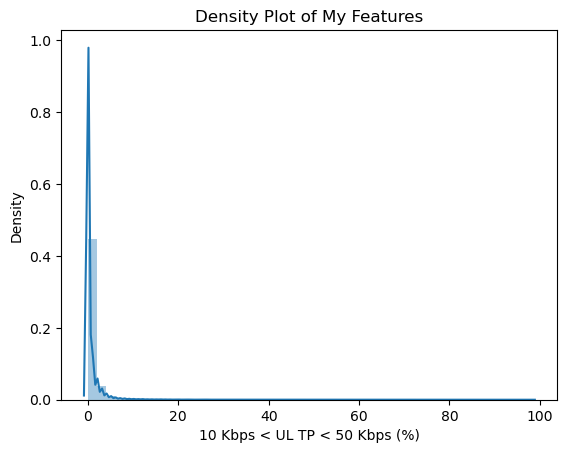

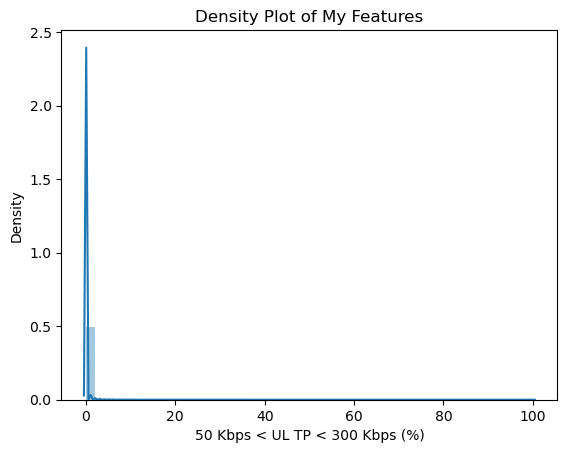

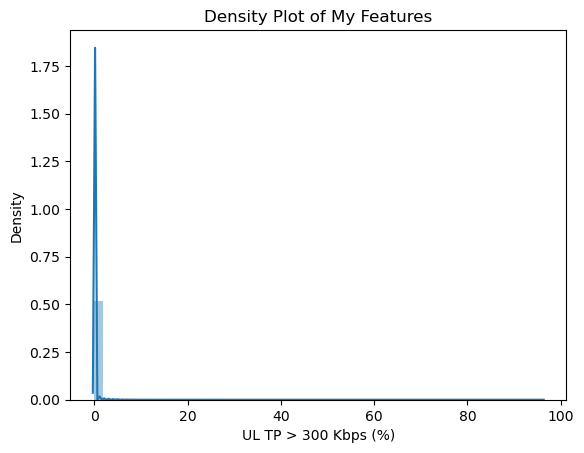

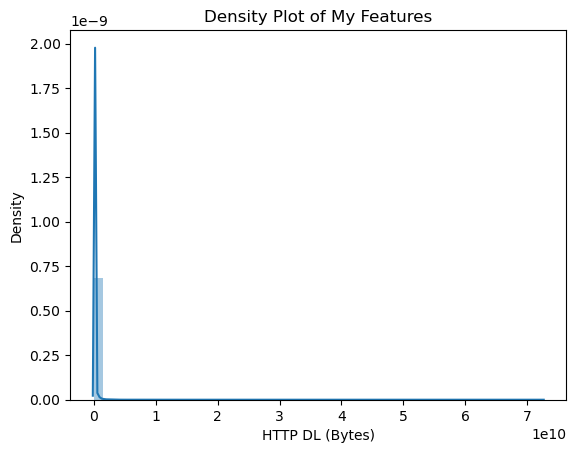

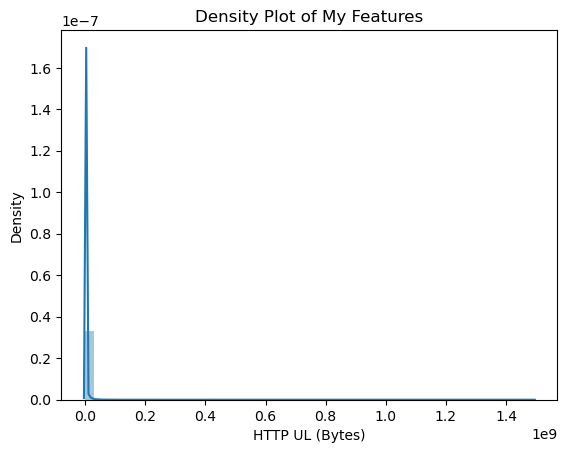

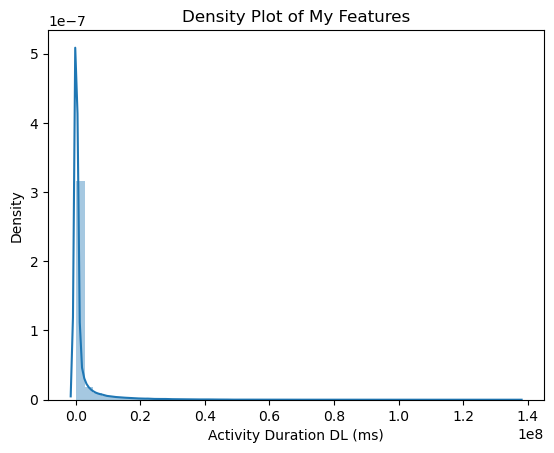

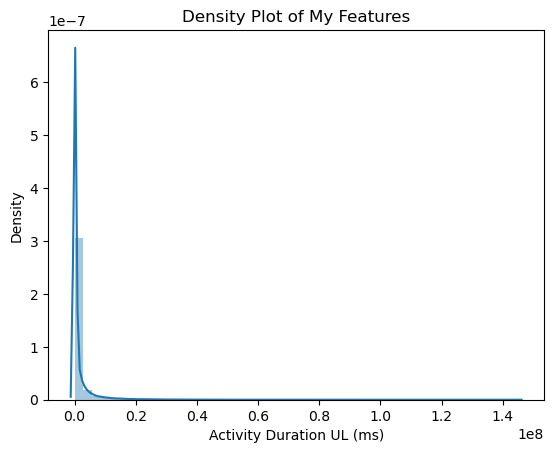

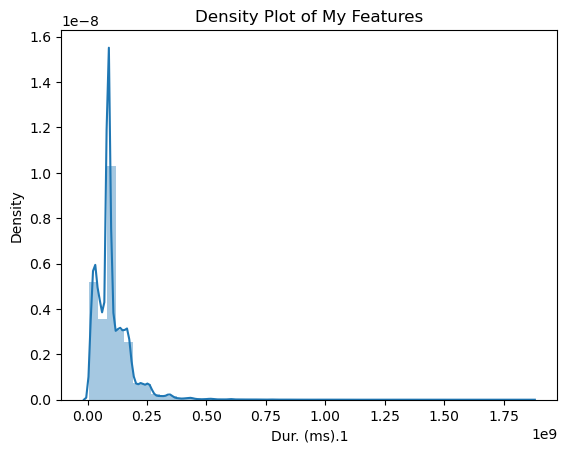

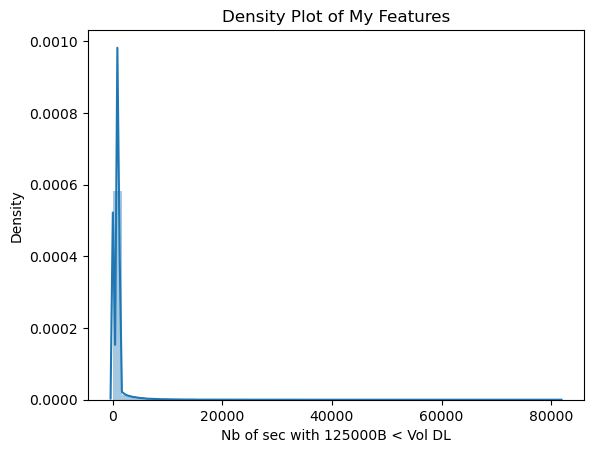

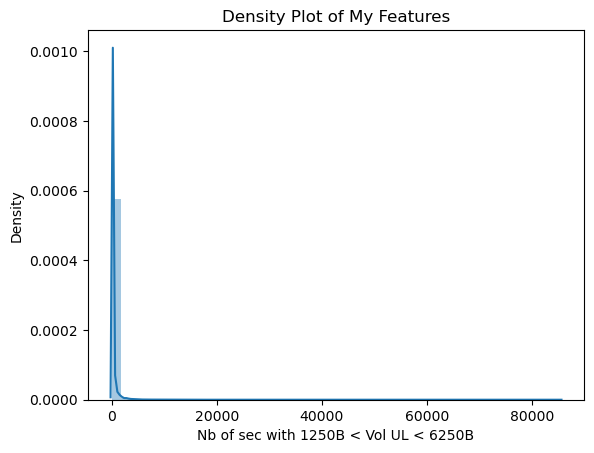

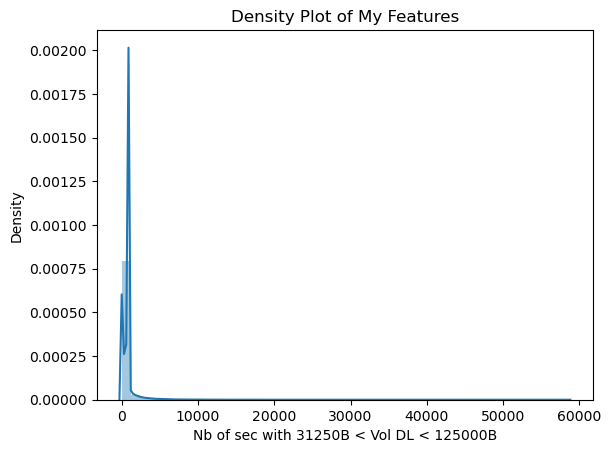

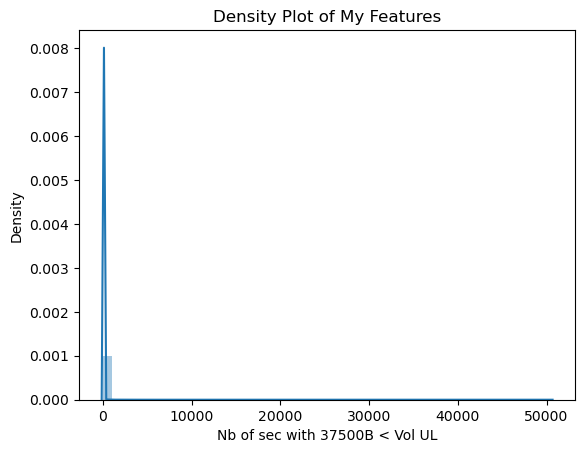

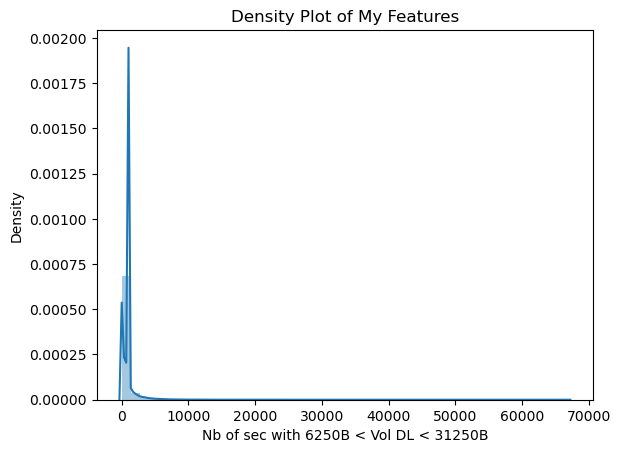

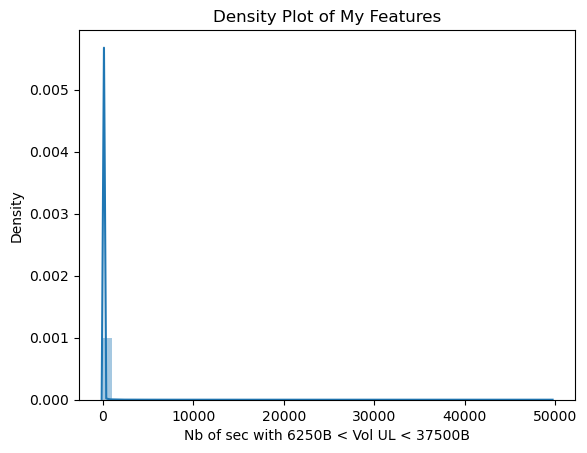

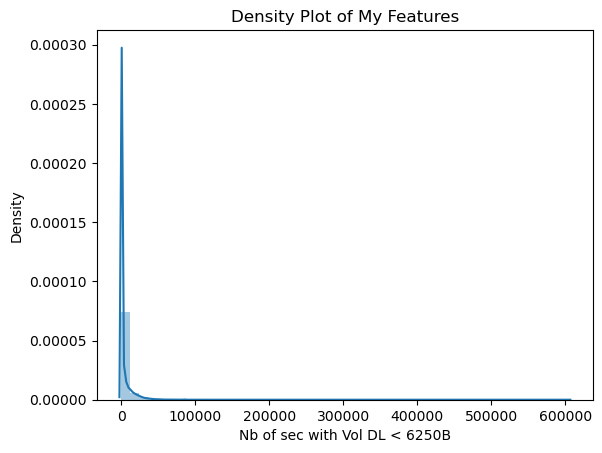

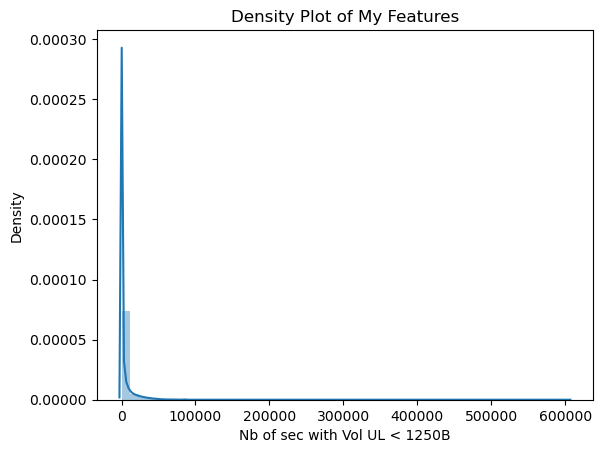

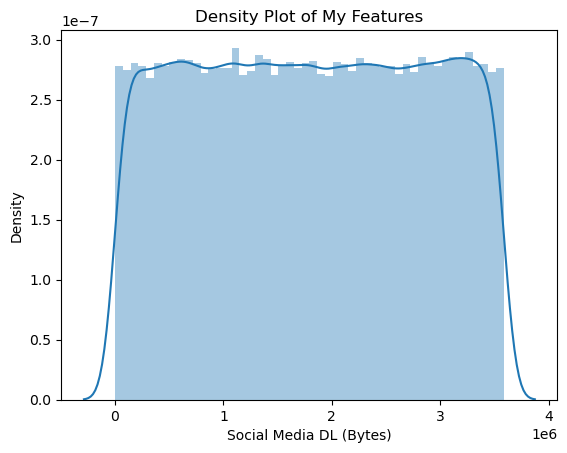

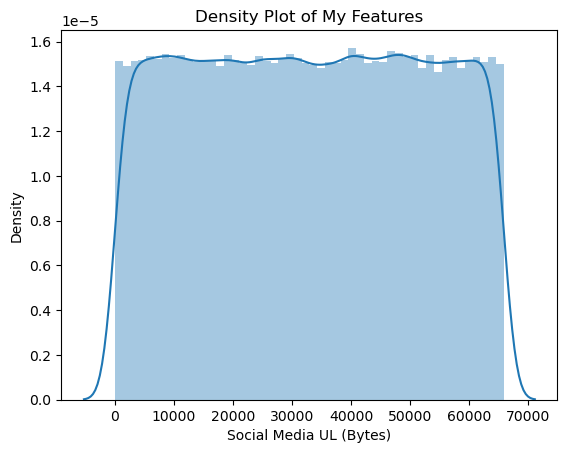

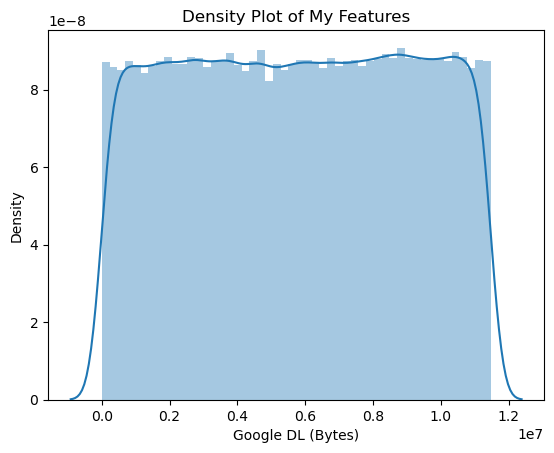

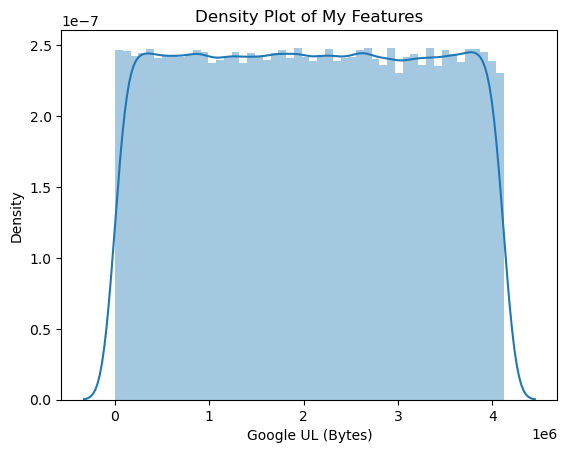

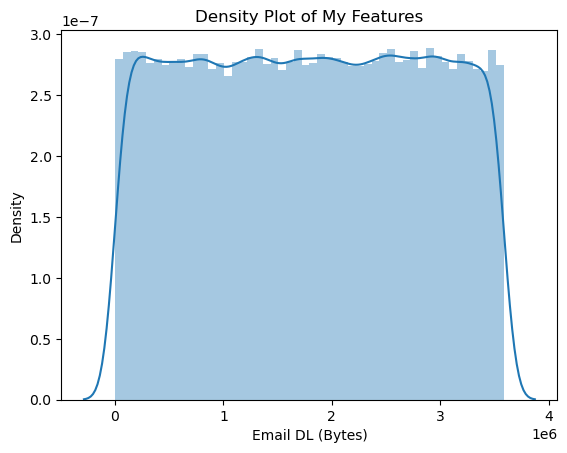

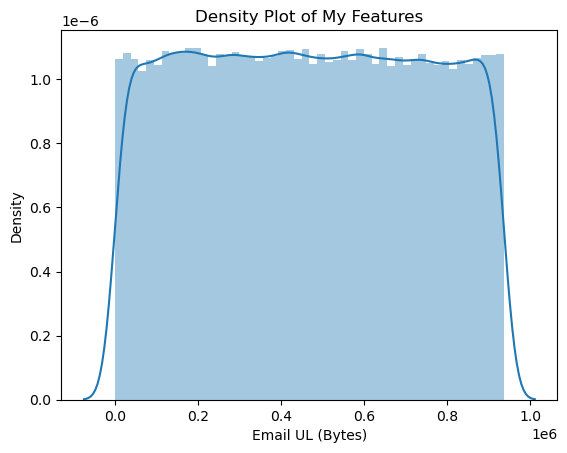

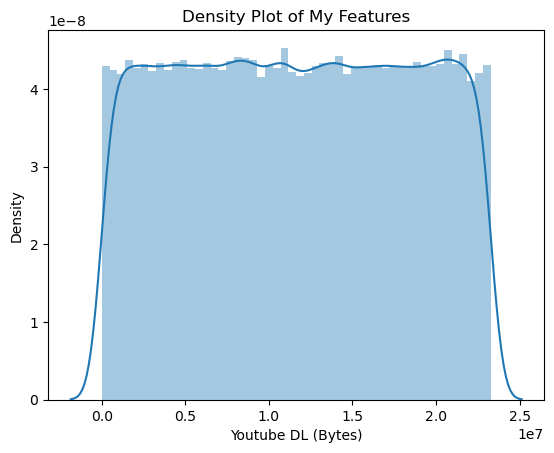

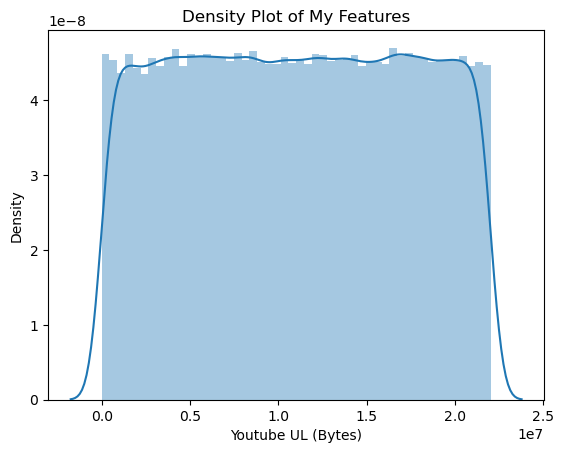

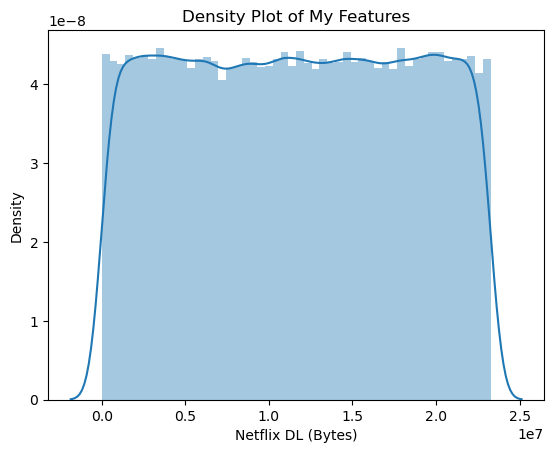

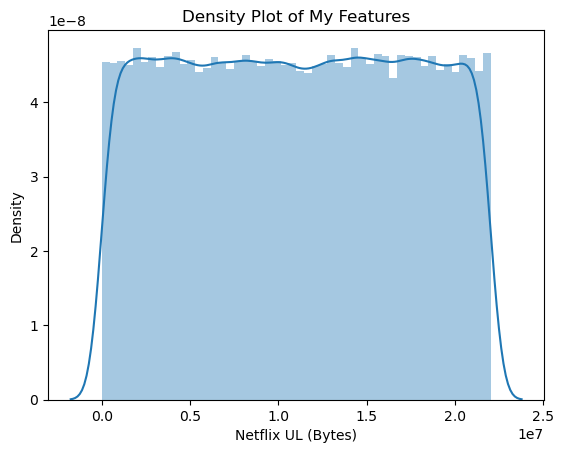

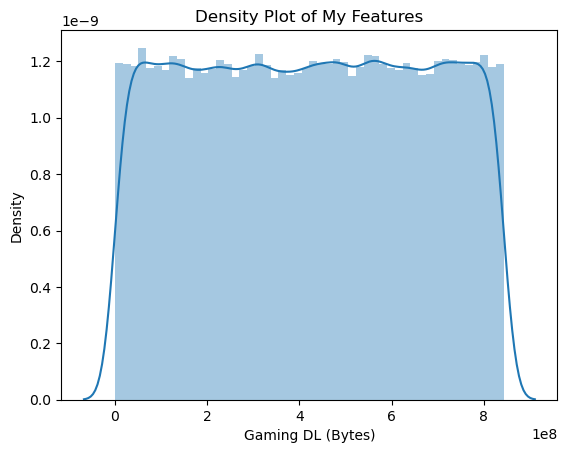

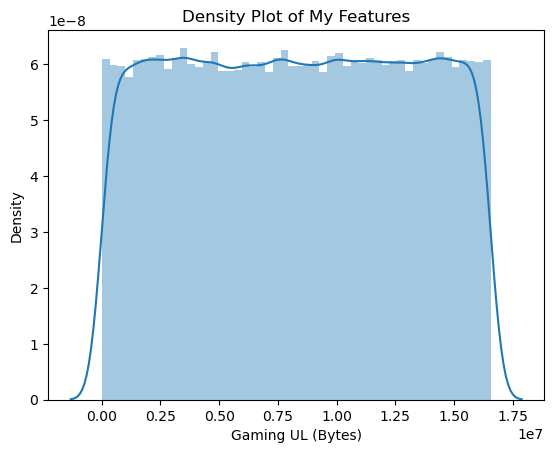

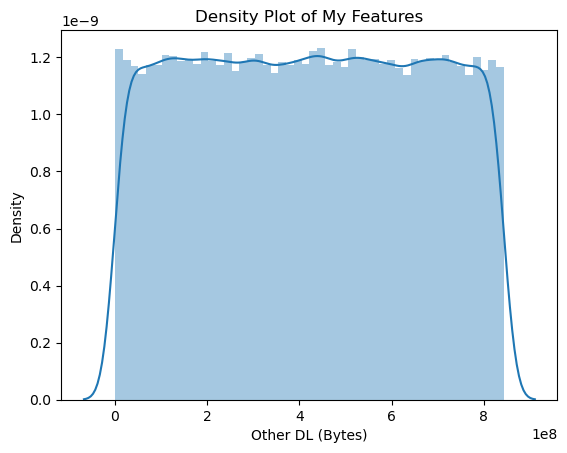

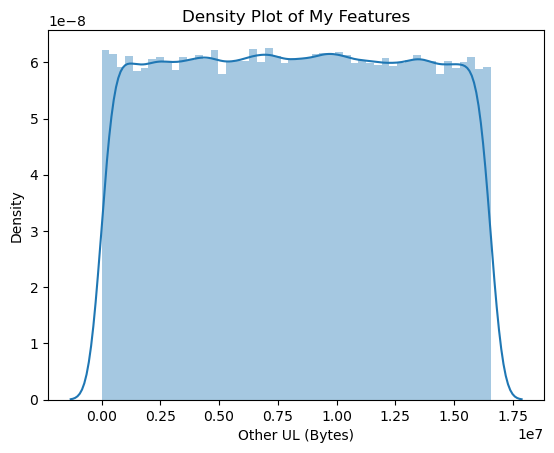

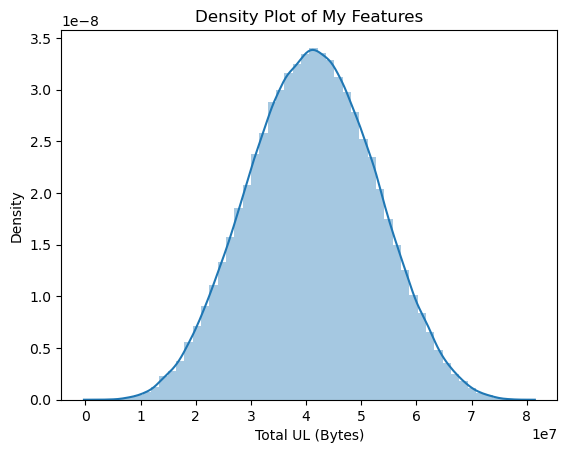

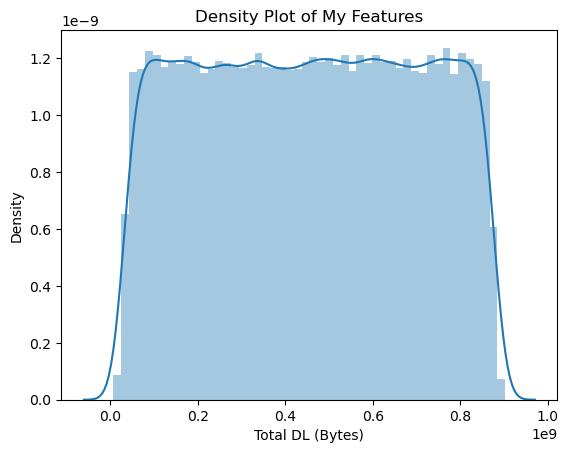

In [53]:
for i in numerical_columns_df.columns:
    sns.distplot(numerical_columns_df[i],kde=True)
    # Add labels and title to the plot
    plt.xlabel(i)
    plt.ylabel('Density')
    plt.title('Density Plot of My Features')
    # Display the plot
    plt.show()

## Need to be in Same Scale all Df 

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
object_columns_df = df.select_dtypes(include=['object'])
numerical_columns_df =df.select_dtypes(exclude=['object'])

In [58]:
df_scaled=scaler.fit_transform(numerical_columns_df)

In [59]:
df_scaled.shape

(150001, 19)

(array([[1.01377e+05, 4.70350e+04, 1.28000e+03, 2.11000e+02, 6.50000e+01,
         2.30000e+01, 6.00000e+00, 3.00000e+00, 0.00000e+00, 0.00000e+00],
        [1.25743e+05, 2.13620e+04, 2.33300e+03, 4.32000e+02, 8.70000e+01,
         4.20000e+01, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00],
        [1.25026e+05, 2.25460e+04, 1.77200e+03, 4.69000e+02, 1.00000e+02,
         5.30000e+01, 3.30000e+01, 0.00000e+00, 0.00000e+00, 1.00000e+00],
        [7.66600e+04, 7.33410e+04, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
        [7.66190e+04, 7.33820e+04, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
        [7.66750e+04, 7.33260e+04, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
        [7.65910e+04, 7.34100e+04, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+0

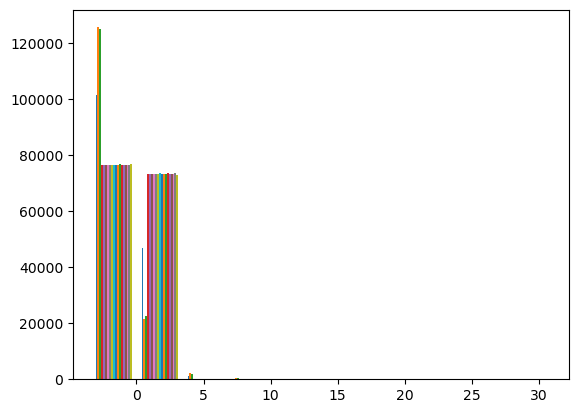

In [60]:
plt.hist(df_scaled)

In [61]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

In [62]:
data_scaled_minmax = minmax.fit_transform(numerical_columns_df)
data_scaled_minmax

array([[9.80734200e-01, 2.75560094e-04, 2.67660299e-04, ...,
        5.32303987e-01, 3.36846254e-01, 4.48991054e-01],
       [7.33164021e-01, 1.23044056e-06, 2.45667534e-05, ...,
        9.09191307e-01, 7.21400795e-01, 6.74933958e-01],
       [7.31359674e-01, 0.00000000e+00, 0.00000000e+00, ...,
        2.54586601e-01, 3.04394259e-01, 3.31503857e-01],
       ...,
       [4.91886919e-02, 1.83123246e-04, 1.97638151e-04, ...,
        6.83302606e-01, 6.53757570e-01, 4.24641605e-01],
       [4.90056657e-02, 9.81789033e-05, 2.35233565e-04, ...,
        8.49574374e-02, 4.07188267e-01, 3.54593653e-01],
       [           nan,            nan,            nan, ...,
        4.99113300e-01,            nan,            nan]])

(array([[1.37277e+05, 1.10520e+04, 1.14600e+03, 3.19000e+02, 1.09000e+02,
         5.00000e+01, 2.10000e+01, 1.70000e+01, 3.00000e+00, 6.00000e+00],
        [1.44329e+05, 3.85000e+03, 1.24500e+03, 3.89000e+02, 9.60000e+01,
         5.40000e+01, 3.60000e+01, 0.00000e+00, 0.00000e+00, 1.00000e+00],
        [1.46753e+05, 2.31700e+03, 6.54000e+02, 1.58000e+02, 6.30000e+01,
         5.40000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00],
        [1.48430e+04, 1.51430e+04, 1.48590e+04, 1.51580e+04, 1.49430e+04,
         1.48950e+04, 1.50050e+04, 1.49330e+04, 1.51810e+04, 1.50410e+04],
        [1.49680e+04, 1.51150e+04, 1.49580e+04, 1.49560e+04, 1.50360e+04,
         1.48390e+04, 1.51030e+04, 1.51440e+04, 1.48880e+04, 1.49940e+04],
        [1.49140e+04, 1.49910e+04, 1.50120e+04, 1.52010e+04, 1.49780e+04,
         1.48800e+04, 1.49670e+04, 1.49580e+04, 1.51760e+04, 1.49240e+04],
        [1.49150e+04, 1.49500e+04, 1.50790e+04, 1.51240e+04, 1.48830e+04,
         1.50370e+04, 1.49660e+0

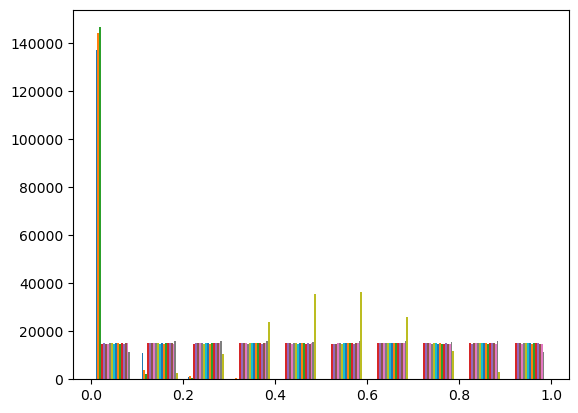

In [63]:
plt.hist(data_scaled_minmax)

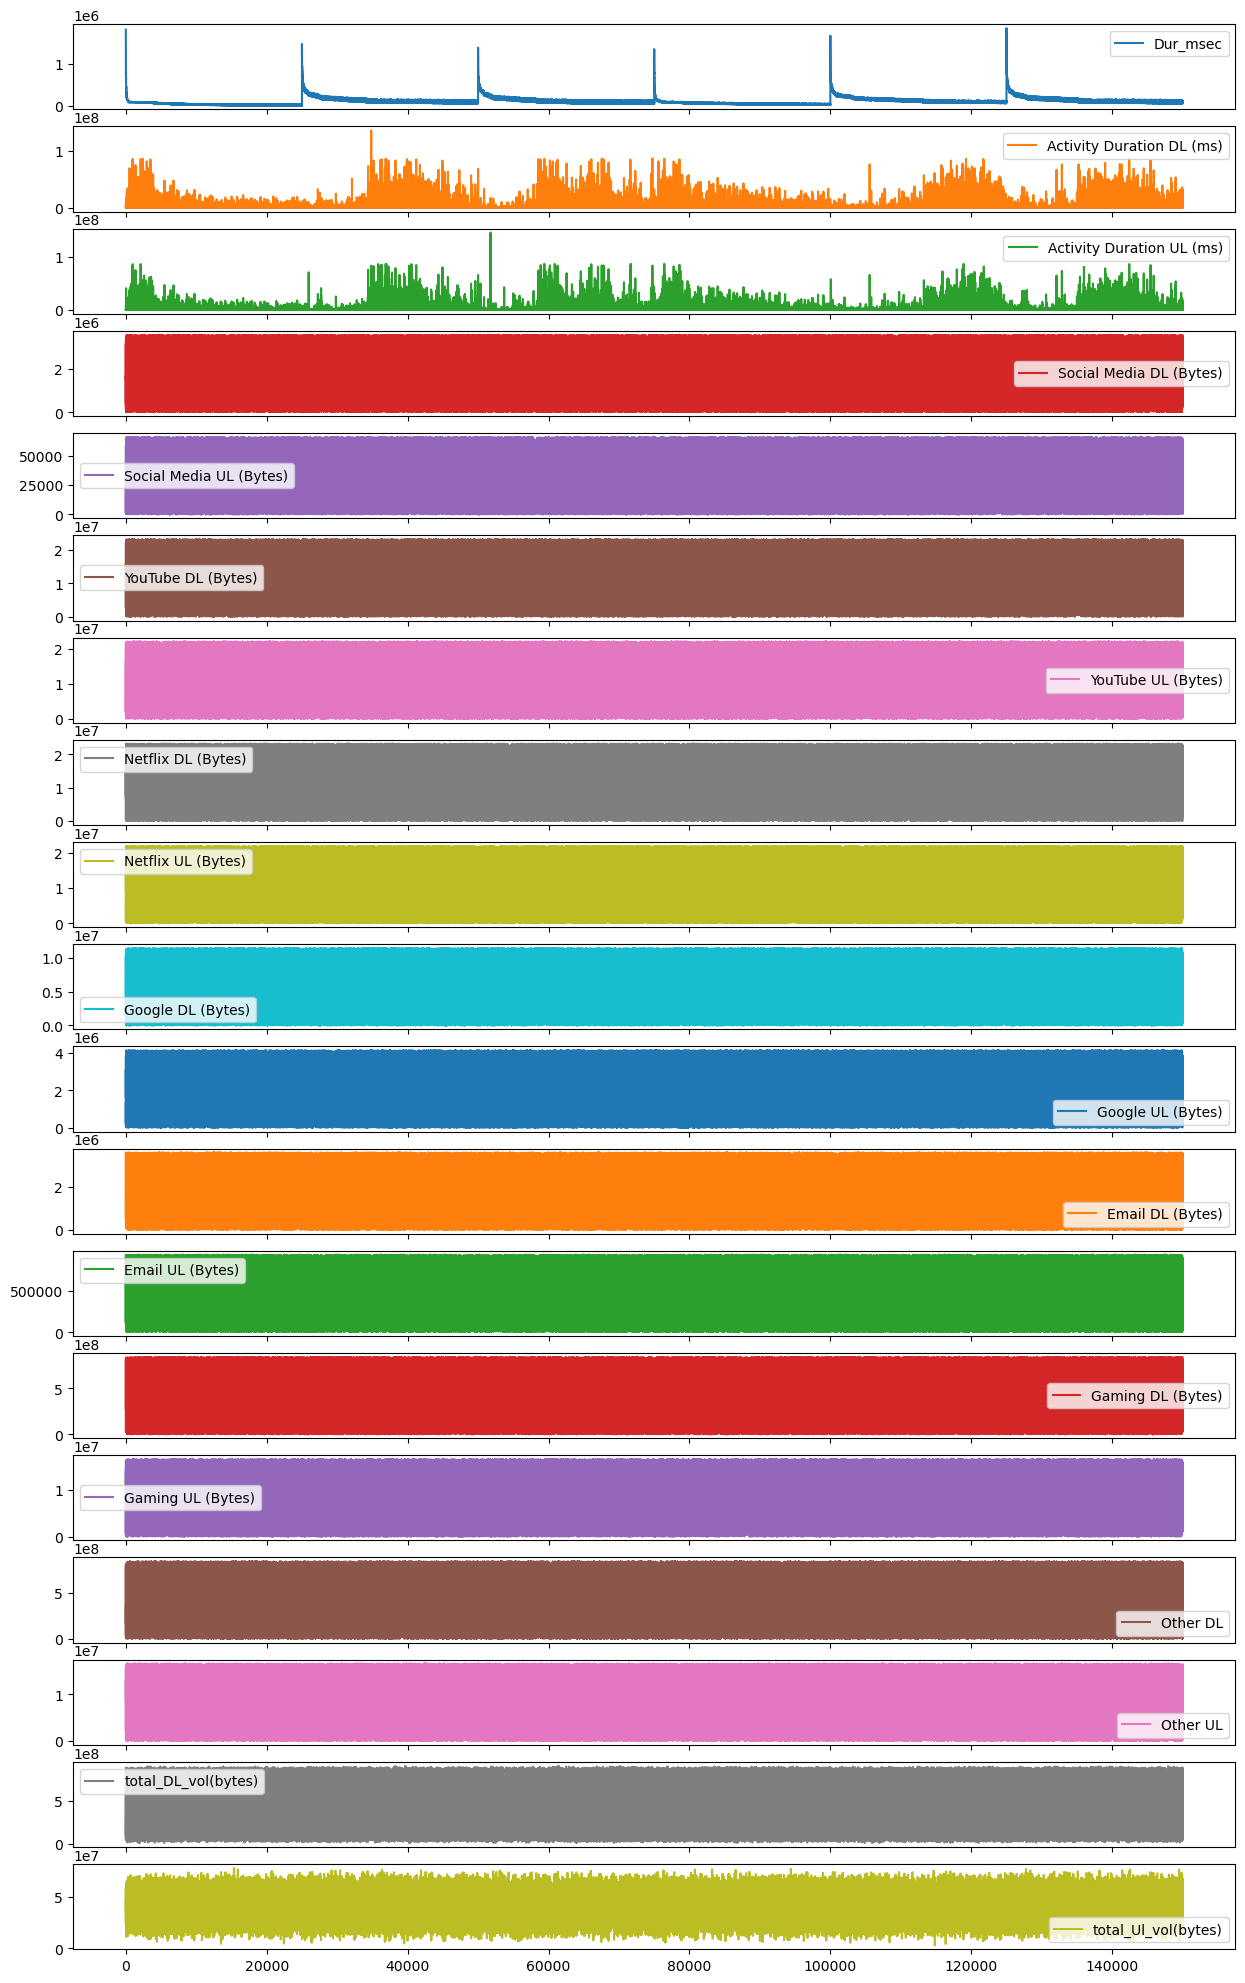

In [64]:
df.plot(subplots=True,figsize=(15,25))
plt.show()

# Bivariate Analysis

## exploring the relationship between each application & the total DL+UL data using appropriate methods and interpret your findings.

In [65]:
db1['Total_DL_UL'] = db1['Total UL (Bytes)'] + db1['Total DL (Bytes)']
correlation_matrix = db1.corr()
correlation_matrix

Start ms    End ms  Dur. (ms)  \
Start ms                                  1.000000  0.120945   0.001287   
End ms                                    0.120945  1.000000  -0.001302   
Dur. (ms)                                 0.001287 -0.001302   1.000000   
IMSI                                     -0.000054  0.000328  -0.019765   
MSISDN/Number                            -0.001017 -0.001883   0.024536   
IMEI                                     -0.001130 -0.000032  -0.057946   
Avg RTT DL (ms)                           0.003740 -0.004769  -0.042846   
Avg RTT UL (ms)                          -0.002006 -0.002352  -0.002434   
Avg Bearer TP DL (kbps)                  -0.000690  0.000694  -0.165355   
Avg Bearer TP UL (kbps)                  -0.001268  0.000687  -0.113996   
TCP DL Retrans. Vol (Bytes)               0.000211  0.003182   0.008559   
TCP UL Retrans. Vol (Bytes)              -0.002142 -0.002017   0.002654   
DL TP < 50 Kbps (%)                       0.000718 -0.003674   0.196605   
50 Kbps < DL TP < 250 Kbps (%)           -0.003099  0.004031  -0.193157   
250 Kbps < DL TP < 1 Mbps (%)            -0.000160  0.002341  -0.145363   
DL TP > 1 Mbps (%)                        0.002651  0.002754  -0.102606   
UL TP < 10 Kbps (%)                       0.000253 -0.001987   0.106930   
10 Kbps < UL TP < 50 Kbps (%)            -0.000157  0.002110  -0.082470   
50 Kbps < UL TP < 300 Kbps (%)            0.000388  0.002517  -0.030547   
UL TP > 300 Kbps (%)                      0.000124 -0.001943  -0.017874   
HTTP DL (Bytes)                           0.002324  0.002180   0.012419   
HTTP UL (Bytes)                           0.001240 -0.001171   0.019138   
Activity Duration DL (ms)                -0.000043  0.000404  -0.072672   
Activity Duration UL (ms)                -0.000338 -0.000790  -0.065697   
Dur. (ms).1                               0.001287 -0.001302   1.000000   
Nb of sec with 125000B < Vol DL           0.004284  0.001326   0.027867   
Nb of sec with 1250B < Vol UL < 6250B    -0.000556  0.000493   0.018745   
Nb of sec with 31250B < Vol DL < 125000B  0.000488  0.001669   0.031761   
Nb of sec with 37500B < Vol UL           -0.000648 -0.003065   0.002695   
Nb of sec with 6250B < Vol DL < 31250B   -0.000902  0.004002   0.034277   
Nb of sec with 6250B < Vol UL < 37500B   -0.001799 -0.000323   0.004830   
Nb of sec with Vol DL < 6250B             0.000195 -0.004356  -0.059436   
Nb of sec with Vol UL < 1250B             0.002214 -0.002281  -0.065436   
Social Media DL (Bytes)                   0.001262  0.003102  -0.002716   
Social Media UL (Bytes)                   0.000385 -0.004010  -0.001286   
Google DL (Bytes)                         0.002274 -0.001284   0.001228   
Google UL (Bytes)                         0.000722  0.004191  -0.003466   
Email DL (Bytes)                          0.001144 -0.002262   0.003956   
Email UL (Bytes)                         -0.001176 -0.000538  -0.001271   
Youtube DL (Bytes)                       -0.001582 -0.003741   0.003853   
Youtube UL (Bytes)                        0.001238 -0.003450   0.002211   
Netflix DL (Bytes)                       -0.002593  0.004132  -0.001834   
Netflix UL (Bytes)                       -0.002334 -0.001156  -0.005517   
Gaming DL (Bytes)                        -0.004229 -0.004687   0.000691   
Gaming UL (Bytes)                        -0.002512  0.000988   0.001841   
Other DL (Bytes)                         -0.003687  0.002758  -0.000404   
Other UL (Bytes)                          0.003803  0.002786   0.001101   
Total UL (Bytes)                         -0.000028 -0.000574  -0.001019   
Total DL (Bytes)                         -0.004299 -0.004687   0.000768   
Total_DL_UL                              -0.004297 -0.004709   0.000720   

                                              IMSI  MSISDN/Number      IMEI  \
Start ms                                 -0.000054  -1.017395e-03 -0.001130   
End ms                                    0.000328  -1.883

In [66]:
correlation_with_total_data = correlation_matrix['Total_DL_UL']

In [67]:
object_columns_df = db1.select_dtypes(include=['object'])
numerical_columns_df =db1.select_dtypes(exclude=['object'])

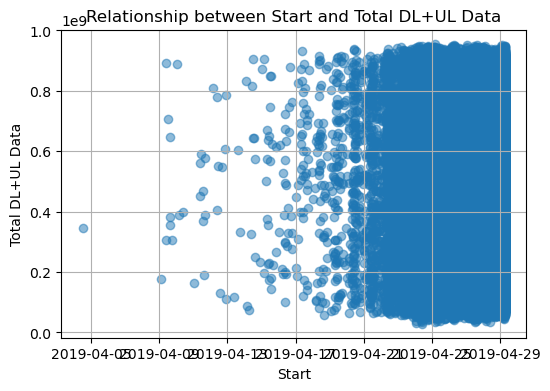

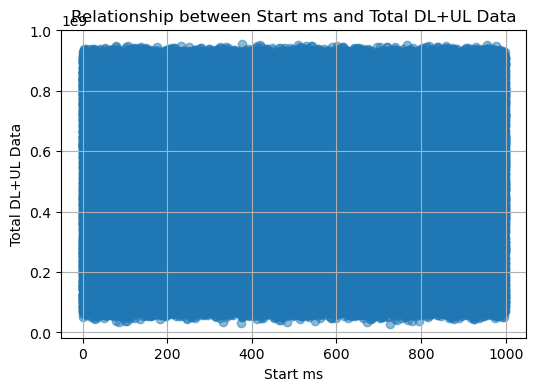

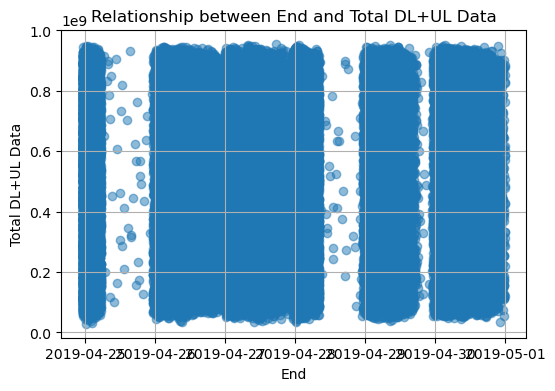

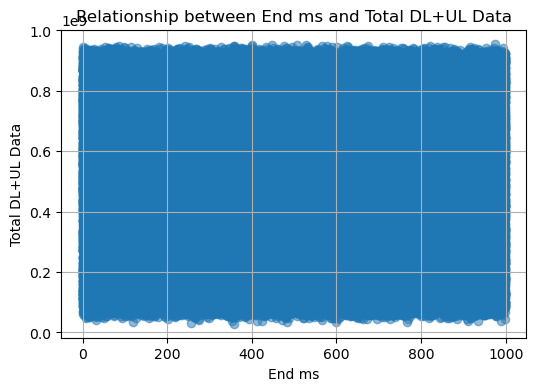

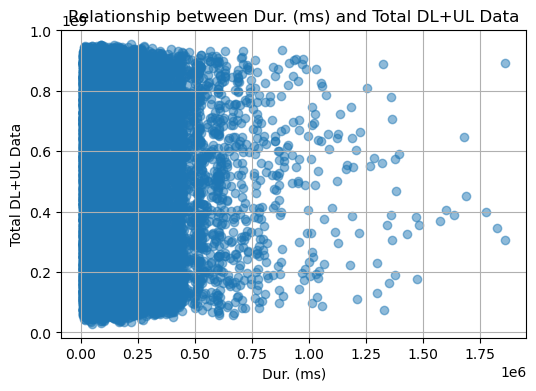

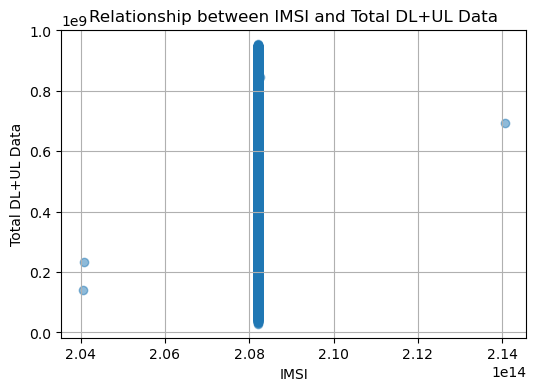

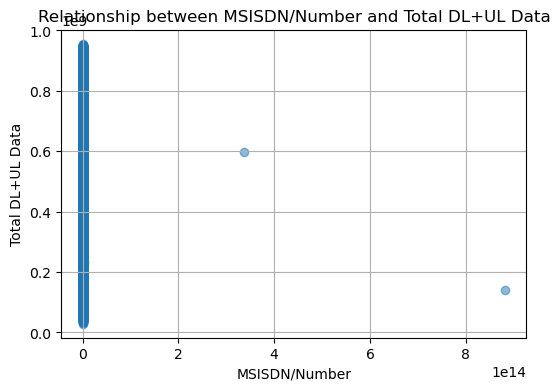

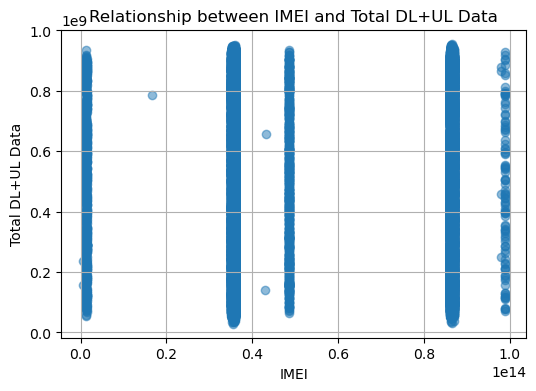

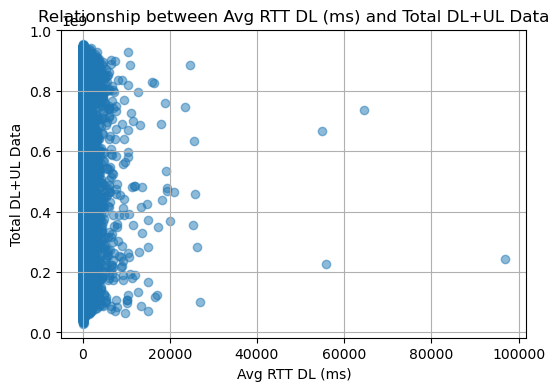

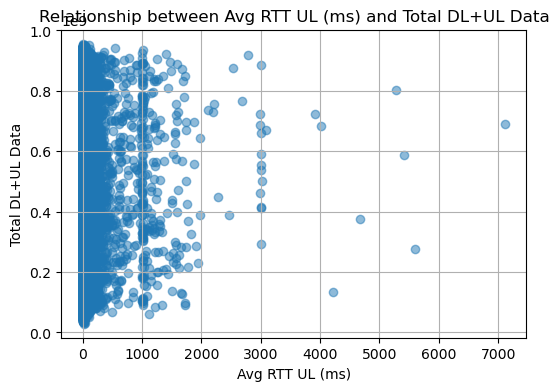

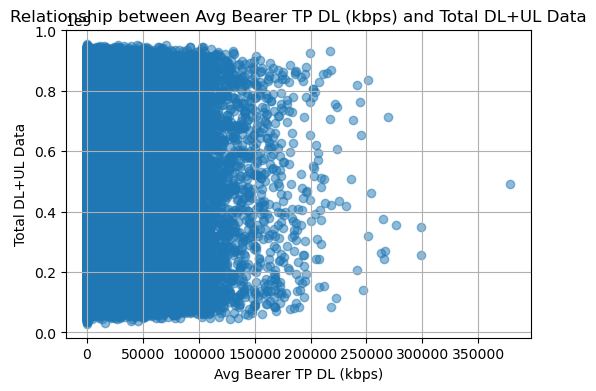

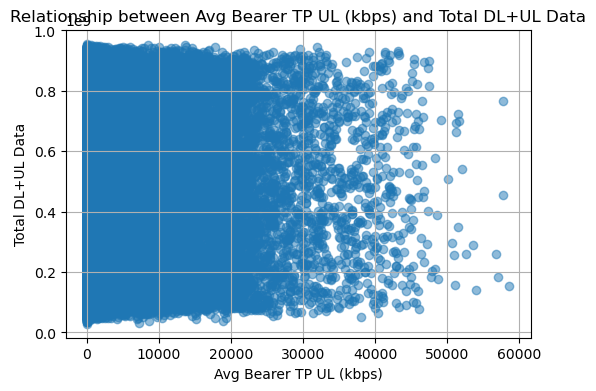

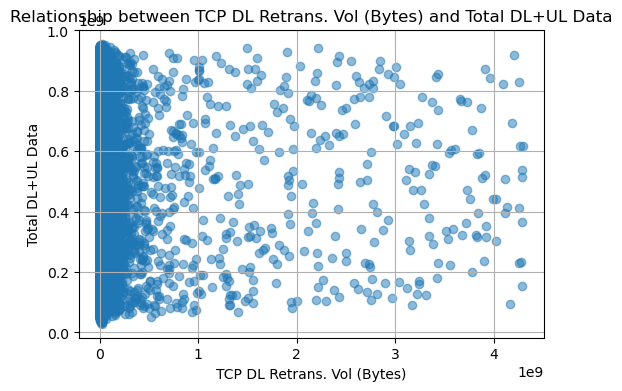

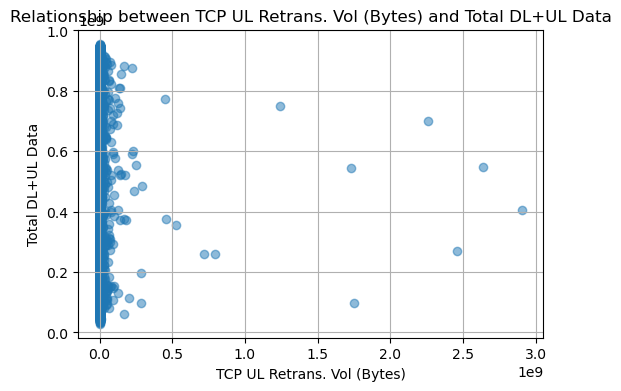

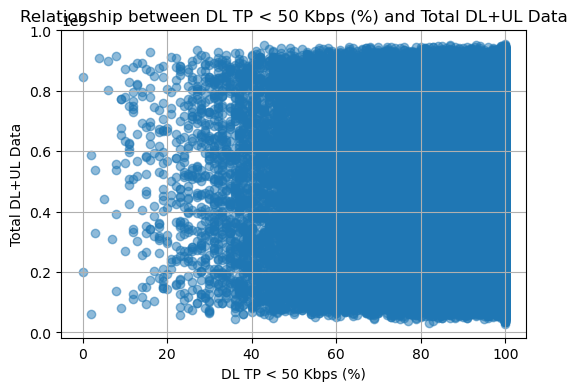

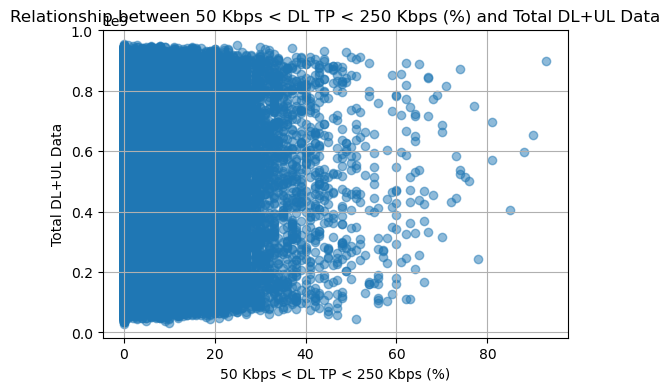

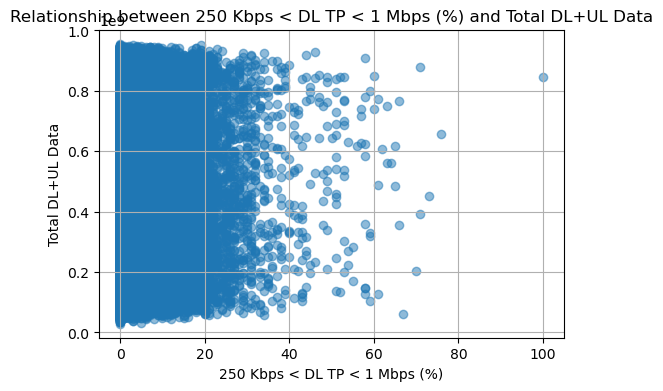

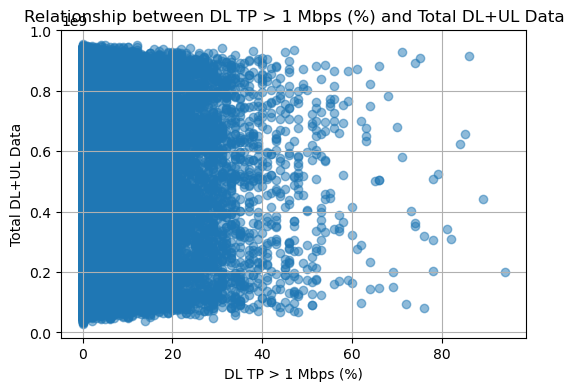

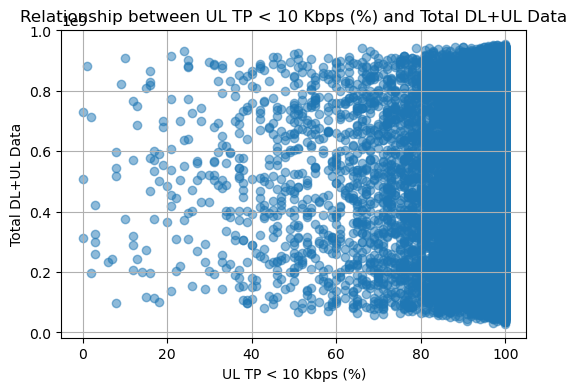

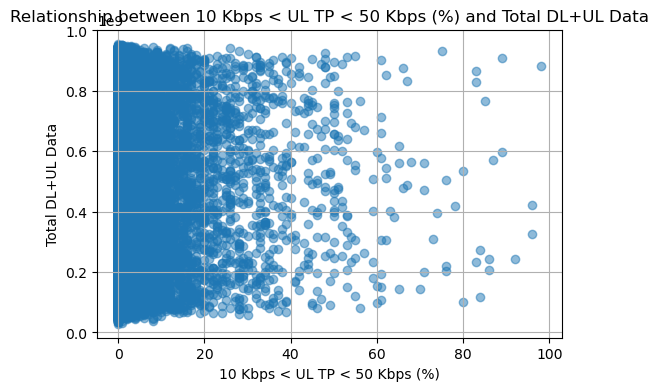

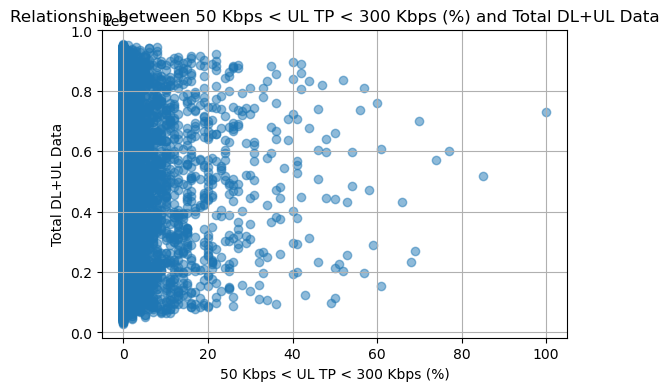

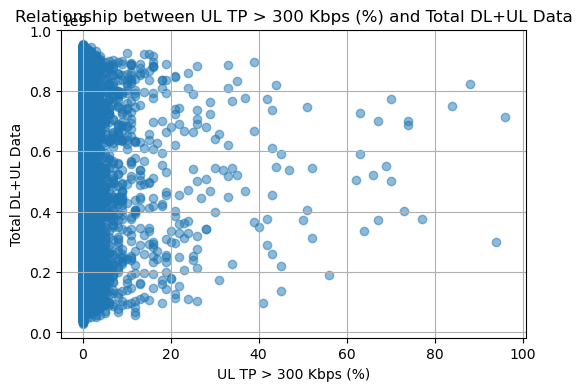

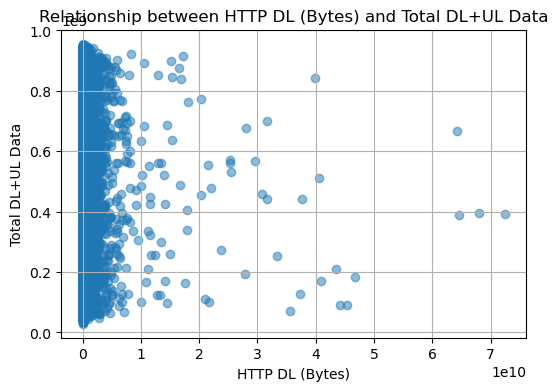

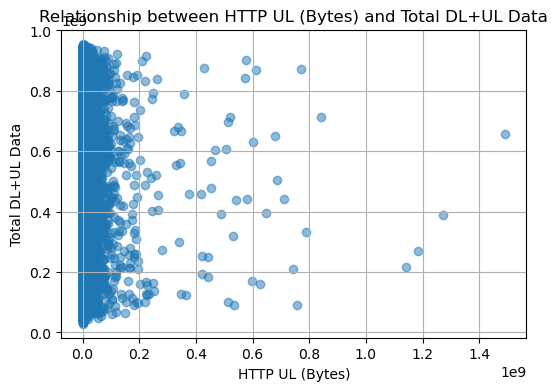

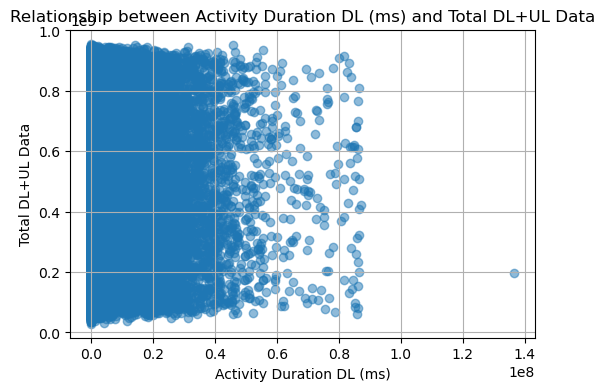

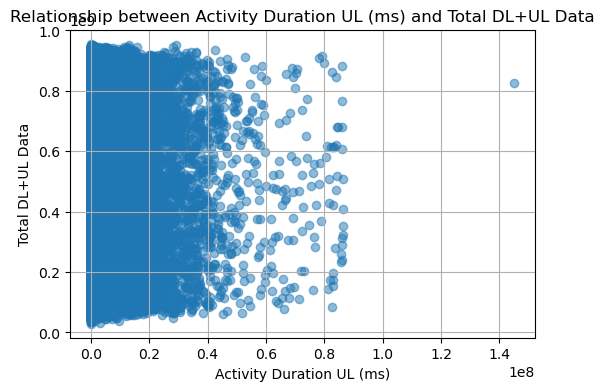

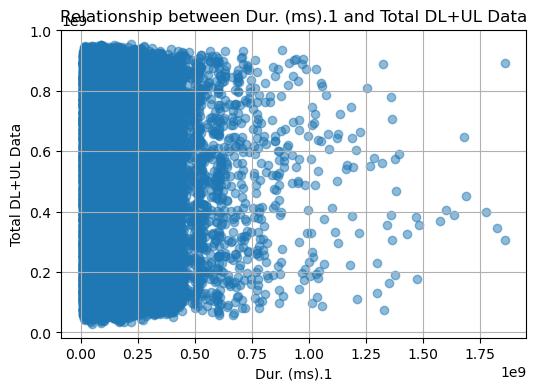

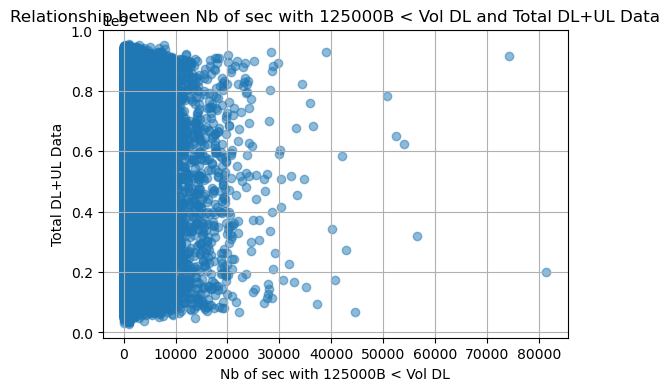

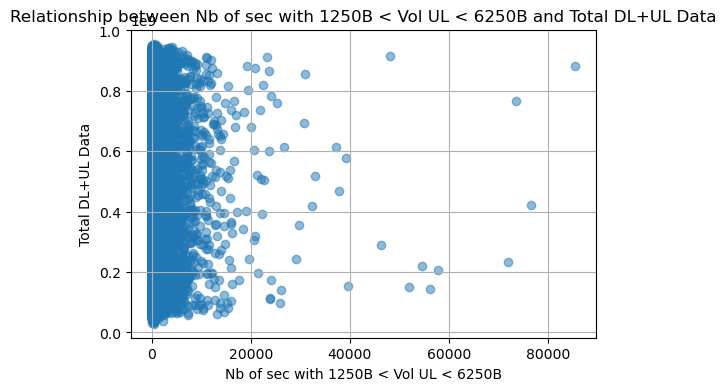

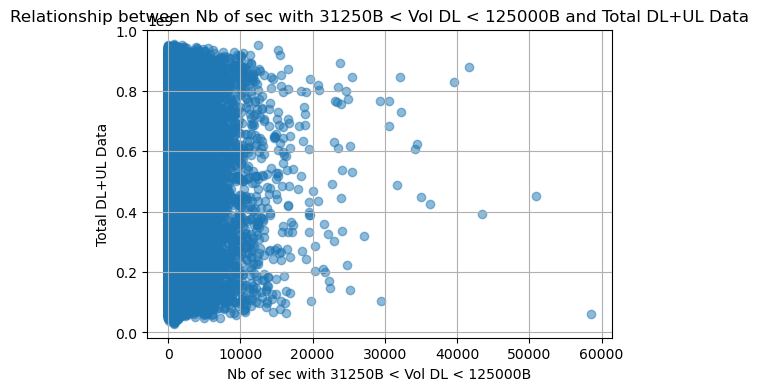

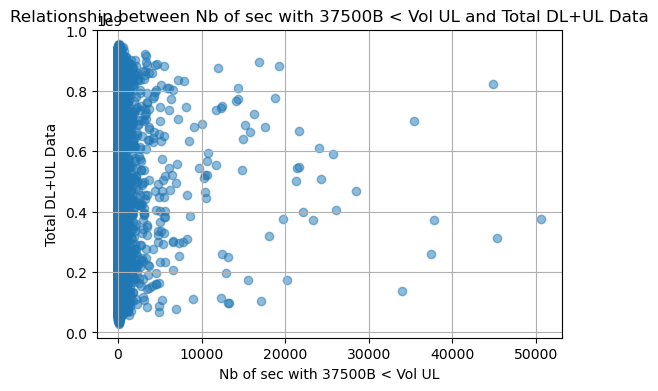

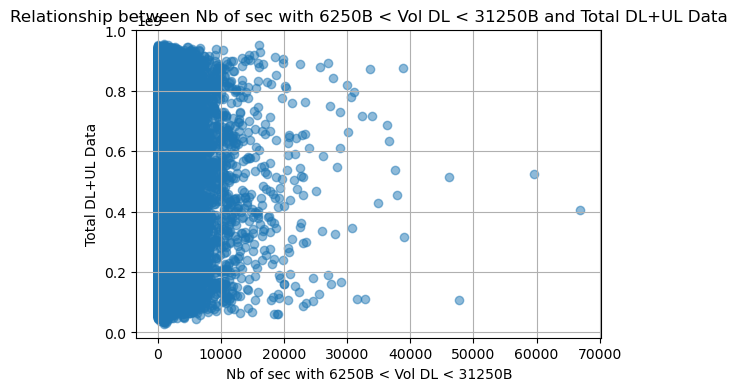

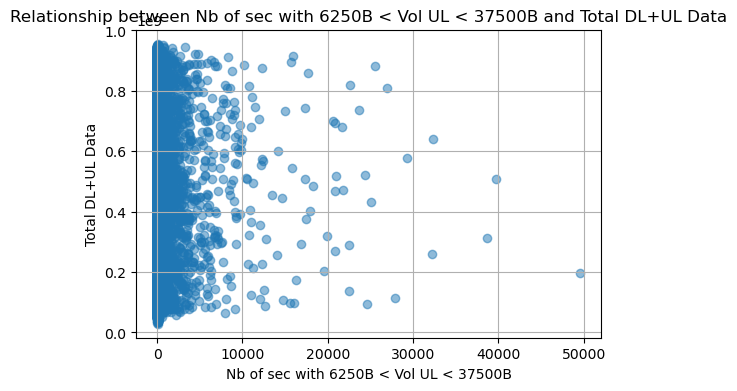

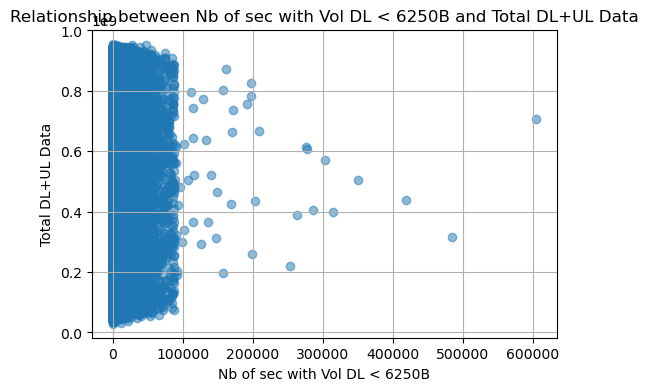

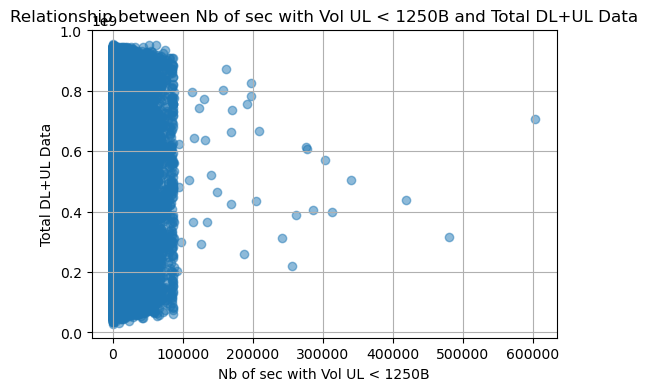

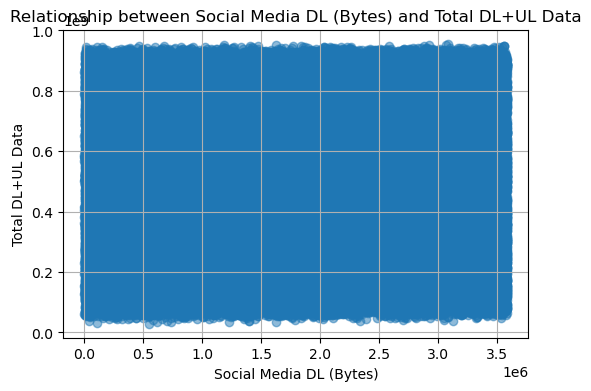

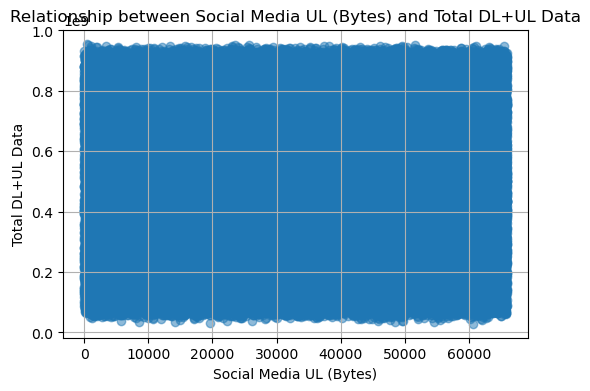

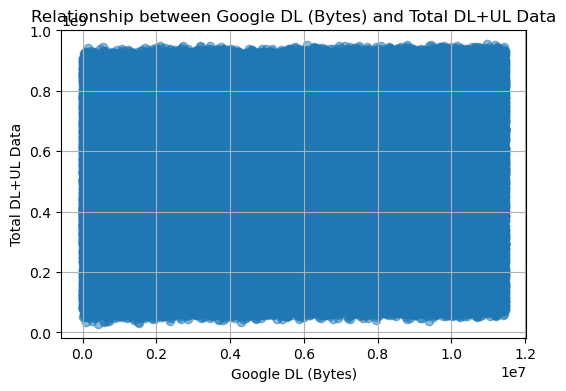

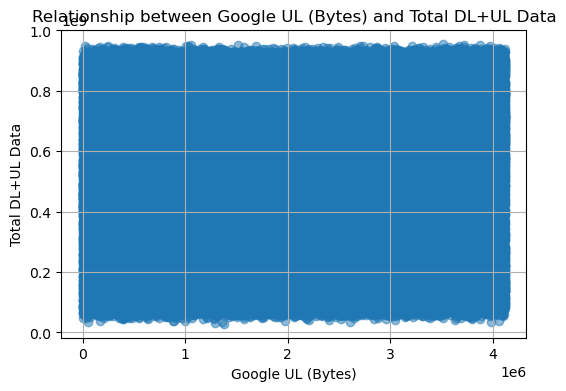

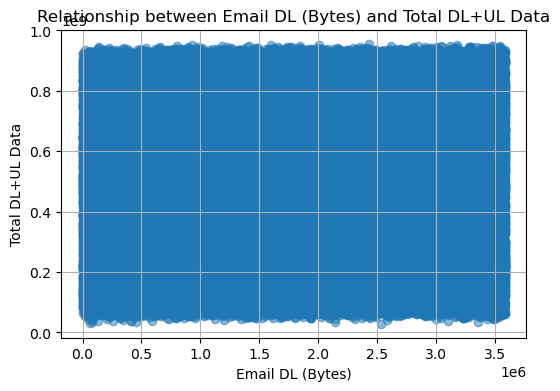

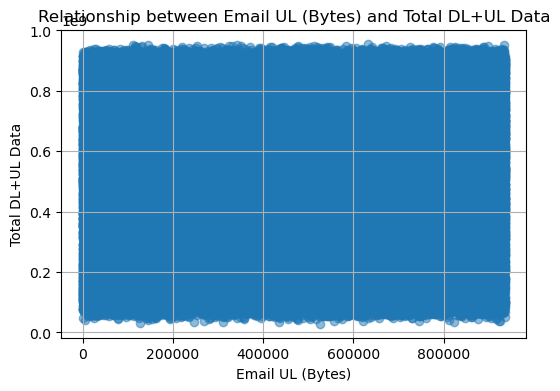

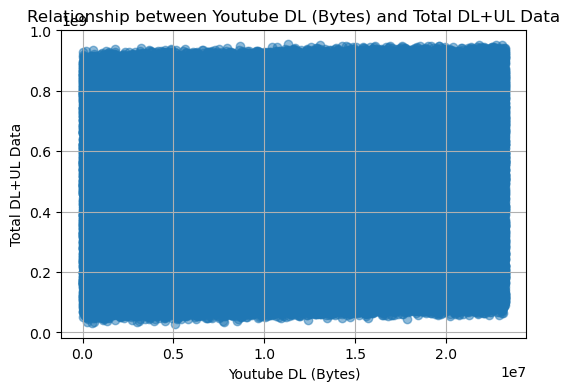

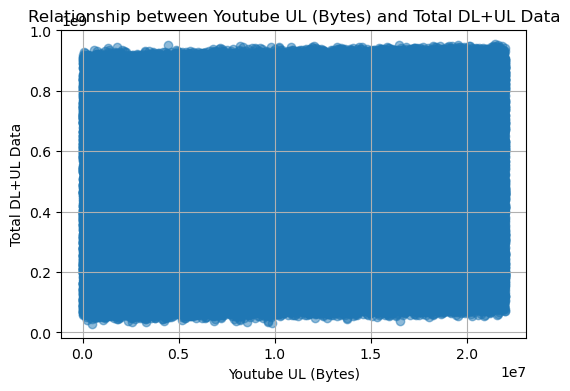

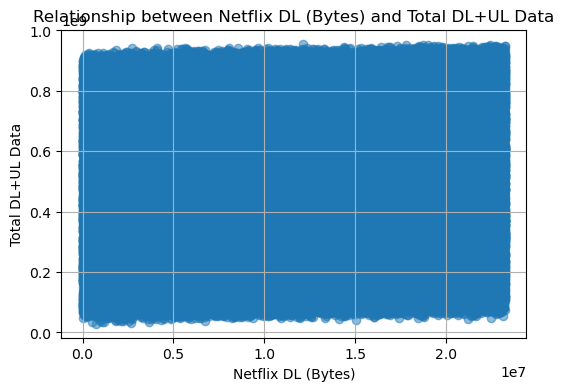

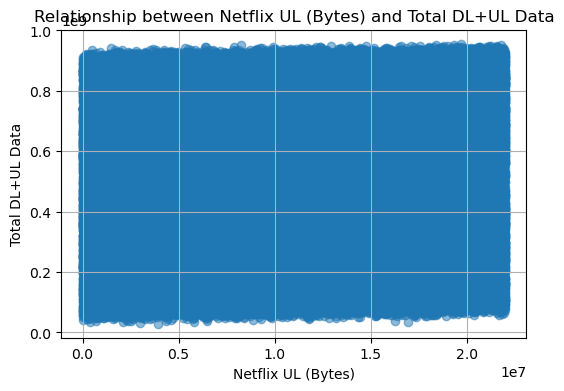

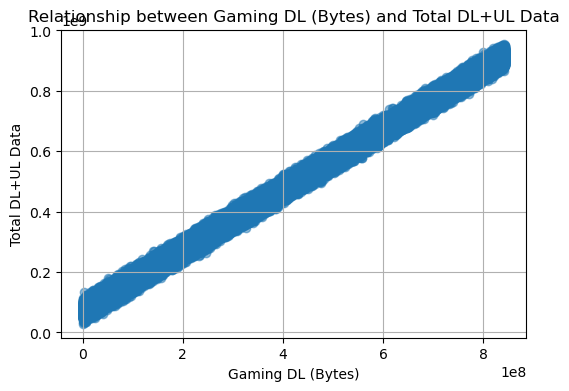

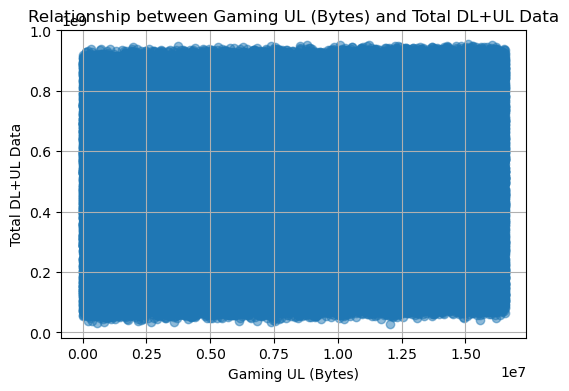

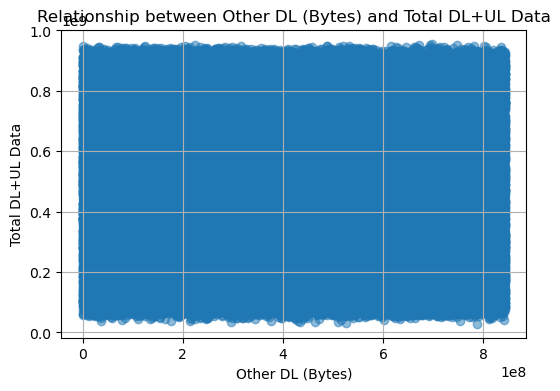

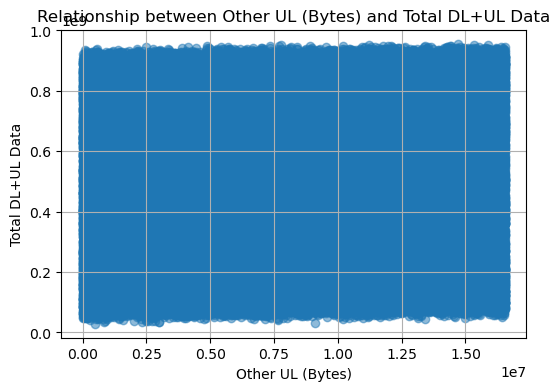

In [68]:
for app in numerical_columns_df.columns[:-3]:  # Exclude columns for total DL, total UL, and the newly added total DL+UL
        plt.figure(figsize=(6, 4))
        plt.scatter(db1[app], db1['Total_DL_UL'], alpha=0.5)
        plt.title(f"Relationship between {app} and Total DL+UL Data")
        plt.xlabel(app)
        plt.ylabel("Total DL+UL Data")
        plt.grid(True)
        plt.show()

### Correlation Analysis – compute a correlation matrix for the following variables and interpret your findings: Social Media data, Google data, Email data, Youtube data, Netflix data, Gaming data, and Other data

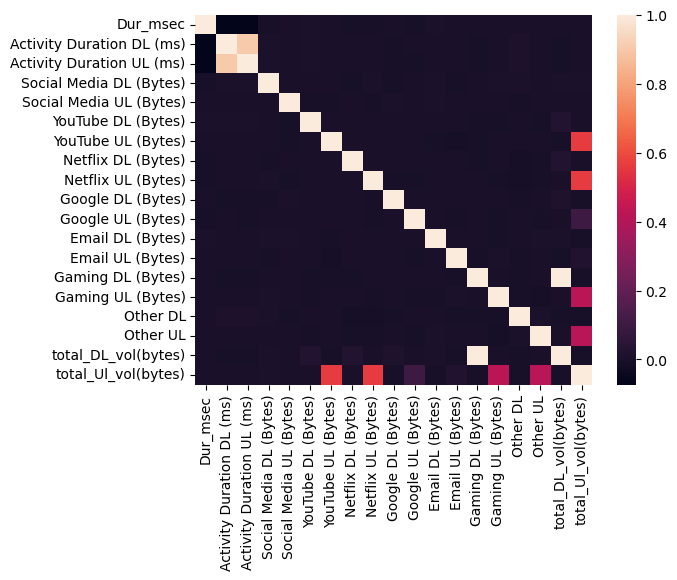

In [69]:
# To visualize the correlation between the features
sns.heatmap(df.corr())

plt.savefig('heatplot1.png')
plt.show()

In [71]:
df1={"Social Media DL (Bytes)":db1["Social Media DL (Bytes)"],
   "YouTube DL (Bytes)":db1["Youtube DL (Bytes)"],
   "Netflix DL (Bytes)":db1["Netflix DL (Bytes)"],
   "Google DL (Bytes)":db1["Google DL (Bytes)"],
   "Email DL (Bytes)":db1["Email DL (Bytes)"],
   "Gaming DL (Bytes)":db1["Gaming DL (Bytes)"],
   "Other DL":db1["Other DL (Bytes)"],
  "total_DL_vol(bytes)":db1['Total DL (Bytes)']}

In [73]:
dfa=pd.DataFrame(df1)
dfa.head(20)

Social Media DL (Bytes)  YouTube DL (Bytes)  Netflix DL (Bytes)  \
0                 1545765.0          15854611.0           8198936.0   
1                 1926113.0          20247395.0          18338413.0   
2                 1684053.0          19725661.0          17587794.0   
3                  644121.0          21388122.0          13994646.0   
4                  862600.0          15259380.0          17124581.0   
5                 3148833.0          21332918.0           7345361.0   
6                 1623509.0           7234465.0          13231006.0   
7                 3103940.0          12189786.0           6858496.0   
8                  342043.0          18436641.0          10587264.0   
9                 1541259.0          16338345.0          12211149.0   
10                2653333.0           2595678.0          16973815.0   
11                 829305.0           2805710.0          18094847.0   
12                1699911.0          15567567.0          12189103.0   
13                 145231.0          16536357.0          18084649.0   
14                2443034.0          22283256.0          14599101.0   
15                2015388.0           8715993.0            322630.0   
16                1198389.0          19888068.0          13265349.0   
17                2329184.0           9542771.0          14453337.0   
18                3321014.0          20927687.0          19119219.0   
19                3394396.0          19686572.0            430452.0   

    Google DL (Bytes)  Email DL (Bytes)  Gaming DL (Bytes)     Other DL  \
0           1634479.0         3563542.0        278082303.0  171744450.0   
1           3493924.0          629046.0        608750074.0  526904238.0   
2           8535055.0         2690151.0        229584621.0  410692588.0   
3           9023734.0         1439754.0        799538153.0  749039933.0   
4           6248284.0         1936496.0        527707248.0  550709500.0   
5          10351530.0         1980032.0        710293538.0  654978277.0   
6           1837897.0         1838947.0         44796223.0  803653557.0   
7           1304524.0         2987408.0        748906189.0  537601820.0   
8           7560820.0         3014208.0        821671285.0  172920486.0   
9           8601949.0          522457.0        811355188.0   64856042.0   
10          4366381.0         3095404.0        565283082.0   95716749.0   
11          7241855.0         1541381.0        504604946.0  526987098.0   
12         10110182.0         3285424.0        766292761.0   34550147.0   
13          9783438.0         2205447.0        530192847.0  235638196.0   
14          4595395.0         3274778.0        251467133.0   40078751.0   
15          2995945.0         2564330.0         26045464.0  137148601.0   
16           811318.0          619051.0        117552472.0  358603691.0   
17          4213354.0         2162149.0        216408770.0  304617298.0   
18          5719421.0         2422325.0        320764479.0   41855882.0   
19          9031532.0         3043498.0        692302869.0   11865116.0   

    total_DL_vol(bytes)  
0           308879636.0  
1           653384965.0  
2           279807335.0  
3           846028530.0  
4           569138589.0  
5           754452212.0  
6            70562047.0  
7           775350343.0  
8           861612261.0  
9           850570347.0  
10          594967693.0  
11          535118044.0  
12          809144948.0  
13          576947969.0  
14          298662697.0  
15           42659750.0  
16          153334647.0  
17          249109565.0  
18          372274145.0  
19          727889319.0

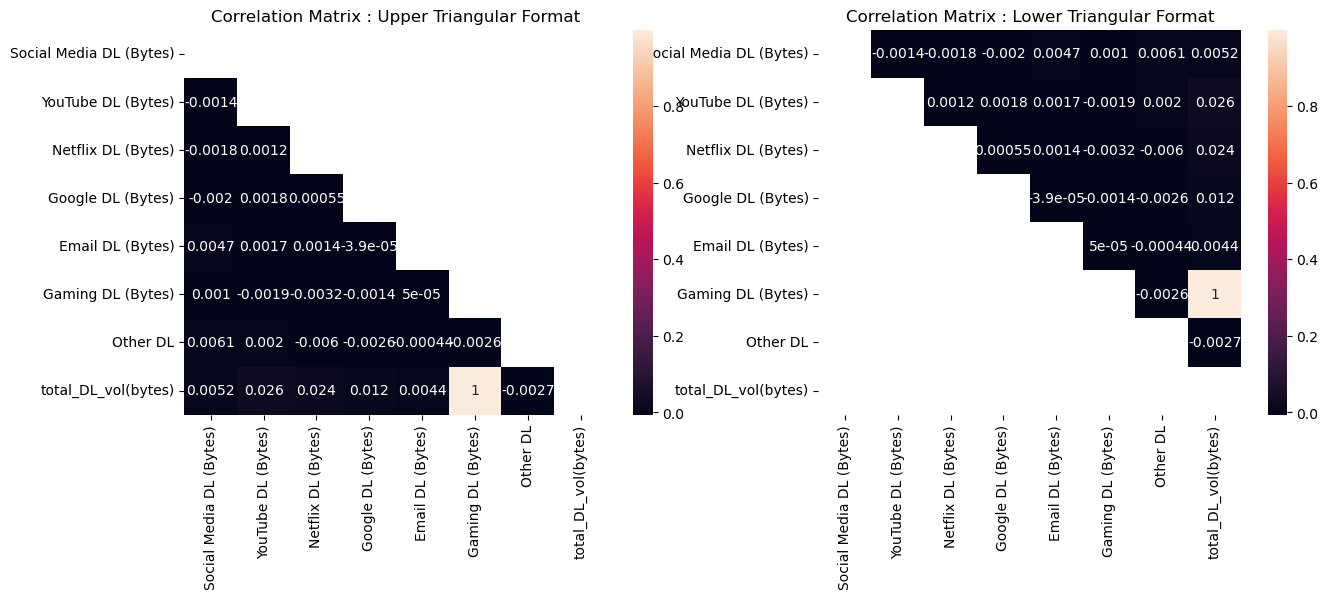

In [74]:
ut = np.triu(dfa.corr())
lt = np.tril(dfa.corr())

fig,ax = plt.subplots(nrows = 1, ncols = 2,figsize = (15,5))
plt.subplot(1,2,1)
sns.heatmap(dfa.corr(),annot = True,cbar = 'True',mask = ut);
plt.title('Correlation Matrix : Upper Triangular Format');

plt.subplot(1,2,2)
sns.heatmap(dfa.corr(),annot = True,cbar = 'True',mask = lt);
plt.title('Correlation Matrix : Lower Triangular Format');

plt.savefig("Correlation Matrix")

## Variable transformations – segment the users into the top five decile classes based on the total duration for all sessions and compute the total data (DL+UL) per decile class.

In [77]:
# Group by user and calculate total session duration
total_duration_per_user = db1.groupby('MSISDN/Number')['Dur. (ms).1'].sum().reset_index()

### Segment Users into Decile Classes:

In [78]:
# Calculate deciles based on session duration
total_duration_per_user['DecileClass'] = pd.qcut(total_duration_per_user['Dur. (ms).1'], q=10, labels=False)

In [79]:
# Merge data_usage with total_duration_per_user based on MSISDN/Number
merged_data = pd.merge(total_duration_per_user, db1, on='MSISDN/Number')

# Calculate total data (DL+UL) per decile class
total_data_per_decile = merged_data.groupby('DecileClass')['Total_DL_UL'].sum()

In [80]:
db1.head(5)

Bearer Id               Start  Start ms                 End  \
0  13114483460844900352 2019-04-04 12:01:18     770.0 2019-04-25 14:35:31   
1  13114483482878900224 2019-04-09 13:04:04     235.0 2019-04-25 08:15:48   
2  13114483484080500736 2019-04-09 17:42:11       1.0 2019-04-25 11:58:13   
3  13114483485442799616 2019-04-10 00:31:25     486.0 2019-04-25 07:36:35   
4  13114483499480700928 2019-04-12 20:10:23     565.0 2019-04-25 10:40:32   

   End ms  Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0   662.0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1   606.0  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2   652.0  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3   171.0  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4   954.0  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

  Last Location Name  Avg RTT DL (ms)  Avg RTT UL (ms)  \
0   9164566995485190        42.000000         5.000000   
1            L77566A        65.000000         5.000000   
2            D42335A       109.795706        17.662883   
3            T21824A       109.795706        17.662883   
4            D88865A       109.795706        17.662883   

   Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  \
0                     23.0                     44.0   
1                     16.0                     26.0   
2                      6.0                      9.0   
3                     44.0                     44.0   
4                      6.0                      9.0   

   TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)  \
0                 2.080991e+07                759658.664811   
1                 2.080991e+07                759658.664811   
2                 2.080991e+07                759658.664811   
3                 2.080991e+07                759658.664811   
4                 2.080991e+07                759658.664811   

   DL TP < 50 Kbps (%)  50 Kbps < DL TP < 250 Kbps (%)  \
0                100.0                             0.0   
1                100.0                             0.0   
2                100.0                             0.0   
3                100.0                             0.0   
4                100.0                             0.0   

   250 Kbps < DL TP < 1 Mbps (%)  DL TP > 1 Mbps (%)  UL TP < 10 Kbps (%)  \
0                            0.0                 0.0                100.0   
1                            0.0                 0.0                100.0   
2                            0.0                 0.0                100.0   
3                            0.0                 0.0                100.0   
4                            0.0                 0.0                100.0   

   10 Kbps < UL TP < 50 Kbps (%)  50 Kbps < UL TP < 300 Kbps (%)  \
0                            0.0                             0.0   
1                            0.0                             0.0   
2                            0.0                             0.0   
3                            0.0                             0.0   
4                            0.0                             0.0   

   UL TP > 300 Kbps (%)  HTTP DL (Bytes)  HTTP UL (Bytes)  \
0                   0.0     1.144710e+08     3.242301e+06   
1                   0.0     1.144710e+08     3.242301e+06   
2                   0.0     1.144710e+08     3.242301e+06   
3                   0.0     1.144710e+08     3.242301e+06   
4                   0.0     1.144710e+08     3.242301e+06   

   Activity Duration DL (ms)  ...  Handset Manufacturer  \
0                    37624.0  ...               Samsung   
1                      168.0  ...               Samsung   
2                        0.0  ...               Samsung   
3                     3330.0  ...             undefined   
4                        0.0  ...               Samsung   

                  Handset Type Nb of sec with 125000B < Vol DL  \
0   Samsung Galaxy A5 Sm-A520F                      989.699998   
1  Samsung Gal

### Standardizing the dataset

In [81]:
from sklearn.preprocessing import StandardScaler

# Selecting only numeric columns for standardization
numeric_columns = db1.select_dtypes(include=['float64', 'int64']).columns

# Standardize only the numeric columns
scaler = StandardScaler()
standardized_data = scaler.fit_transform(db1[numeric_columns])

# 'standardized_data' contains the standardized version of numeric columns in 'db1'

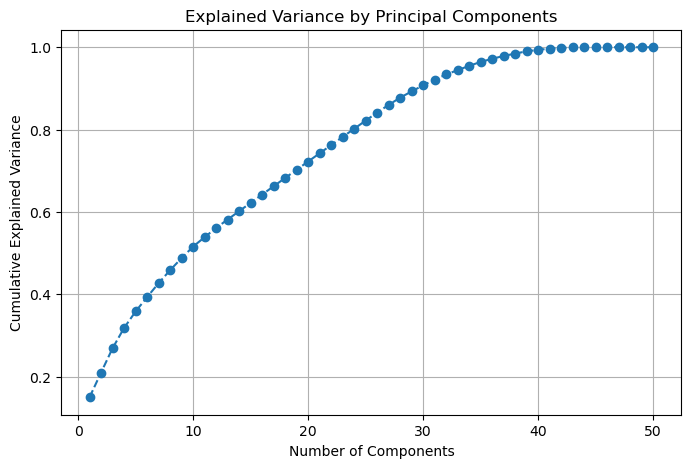

In [82]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(standardized_data)

# Explained Variance Ratio

explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance.cumsum()

# Visualize Explained Variance

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()